# Titanic : Machine Learning Tutorial

* **Outline**
<br>

    * 이 코드는 Data Analysis 분야에서 가장 유명한 Tutorial Dataset인 **Titanic Dataset**을 활용하여 
    기초적인 Classification ML process를 정리하기 위해 만들어졌다. 
    * 활용한 Dataset, 참고한 Code & Link는 아래의 Reference에서 확인할 수 있다.     

<br>

---

* **Contents**
    <br>

    1. Global Setup & Load Library
    2. Dataset 살펴보기
    3. Exploratory Data Analysis
    4. Data Preprocessing
    5. Feature Engineering
    6. Modeling 

<br>

---

* **DataSet**
    * [Kaggle, Titanic Dataset](https://www.kaggle.com/c/titanic/data)

<br>

---

* **Reference**
    * [Kaggle, 타이타닉 ML 튜토리얼](https://www.kaggle.com/daehungwak/guide-kor-dg/notebook)
    * [colab, 전태균님의 타이타닉 분석](https://colab.research.google.com/drive/1cqv5yD9uLHHrVFL-TGM9NPSD1ZyF4AC1#scrollTo=jwBNmHcw3w91)
    * [블로그, 이유한님의 타이타닉 분석 튜토리얼](http://kaggle-kr.tistory.com/17?category=821486)
    * [공개 커널, Keras를 이용한 간단한 모델 구현!](https://www.kaggle.com/everystep/keras)
    * [블로그, 초심자를 위한 데이터 시각화 EDA 가이드라인 실습](https://medium.com/bondata/%EC%B4%88%EC%8B%AC%EC%9E%90%EB%A5%BC-%EC%9C%84%ED%95%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-eda-%EA%B0%80%EC%9D%B4%EB%93%9C%EB%9D%BC%EC%9D%B8-%EC%8B%A4%EC%8A%B5-62d11f93e17e)
    * https://www.kaggle.com/munmun2004/titanic-for-begginers/comments

## Global Setup & Load Libarary

* 필요한 라이브러리를 불러온다

In [1]:
# general
import os
from copy import deepcopy
import warnings
import pandas as pd
import numpy as np

import missingno as msno
from IPython.core.display import display, HTML
from IPython.display import Image

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import plotnine as ggplot

# statistics
from scipy import stats
import statsmodels as modeling
import pingouin as pg

# ML & DL
import sklearn
import keras
# from sklearn import preprocessing, feature_selection, linear_model, svm, metrics, model_selection
import tensorflow as tp

* 주피터 노트북의 기초 옵션과 분석 경로를 설정한다.

In [2]:
#plot setting
plt.style.use('seaborn')  # plt.style.use('ggplot')
sns.set(font_scale=1.5)

plt.rc('font', family='AppleGothic') # For Windows
plt.rcParams['figure.figsize'] = [10, 5]
mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline

#ignore warnings
warnings.filterwarnings('ignore') # 워닝 메세지를 생략해 줍니다. 차후 버전관리를 위해 필요한 정보라고 생각하시면 주석처리 하시면 됩니다.

In [3]:
# path setting
proj_dir = os.getcwd()
data_dir = (os.getcwd() +  '/titanic')
os.chdir(proj_dir)

## Dataset - Titanic

* 타이타닉 데이터셋은 1912년 4월 15일 빙산과 충돌하여 침몰한 영국의 북대서양 횡단 여객선 Titanic의 승객 정보를 담고 있다. 
* Kaggle의 대표적인 데이터셋으로 승객 정보를 활용하여 생존여부(0 또는 1)를 예측하는 Binary Classification 문제를 연습하는 데 가장 많이 사용되어왔다. 

---

* 기본적인 데이터셋은 train.csv, test.csv, gender_submission.csv 파일로 구성된다. 추가로 Test Set의 정답을 담고 있는 label.csv가 준비되어있다.
* train과 test 셋은 총 1309(train 891, test 418)명의 승객들 정보를 포함하고 있다. 두 셋 모두 PassengerID (승객ID), Pclass (티켓 클래스), Name (이름), Sex (성별), Age (연령), SibSp (형제&배우자수), Parch (부모&아이수), Ticket (티켓번호), Fare (탑승료), Cabin (객실 번호), Embarked (탑승항구) 변수를 포함하며, train set에는 Surveived (생존 여부)가 추가로 포함된다. 각 변수들에 대한 설명은 아래를 참고한다.
* gender_submission.csv는 성별 만으로 생존 여부를 예측한 샘플이다.
* label.csv는 test set의 실제 생존 여부이다. 



| 변수(feature, variable) | 정의                           | 설명                                                          | 타입    |
|-------------------------|--------------------------------|---------------------------------------------------------------|---------|
| PassengerID                | 승객 번호                       | Training Set 1-891, Test Set 892-1309                   | integer |          
| Pclass                  | 티켓의 클래스                  | 1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature | integer |
| Sex                     | 성별                           | male, female 로 구분되며 binary                               | string  |
| Age                     | 나이                           | continuous                                                    | integer |
| SibSp                   | 함께 탑승한 형제와 배우자의 수 | quantitative                                                  | integer |
| Parch                   | 함께 탑승한 부모, 아이의 수    | quantitative                                                  | integer |
| Ticket                  | 티켓 번호                      | alphabat + integer                                            | string  |
| Fare                    | 탑승료                         | continuous                                                    | float   |
| Cabin                   | 객실 번호                      | alphabat + integer                                            | string  |
| Embarked                 | 탑승 항구                      | C = Cherbourg, Q = Queenstown, S = Southampton                | string  |
| **Survived**                | 생존여부                       | target label 임. 1, 0 으로 표현됨                             | integer |

---



* 여기에서 다루고자 하는 문제는 생존 여부를 분류하는 Classification 문제로, training set을 활용하여 modeling을 하고, test set의 생존여부를 분류해야한다. 


### DataSet Check

* 데이터 경로에서 어떤 파일이 있는지 확인하고, 필요한 csv 데이터 파일을 pandas dataframe으로 불러온다

In [4]:
os.listdir(data_dir)

['test_fnl.csv',
 '.DS_Store',
 'test.csv',
 'asdad.csv',
 'label.csv',
 'train.csv',
 'gender_submission.csv']

In [5]:
df_train_raw = pd.read_csv(('%s/train.csv' % (data_dir)), encoding='euc-kr')
df_test_raw = pd.read_csv(('%s/test.csv' % (data_dir)), encoding='euc-kr')
df_submit_raw = pd.read_csv(('%s/gender_submission.csv' % (data_dir)), encoding='euc-kr')
df_label_raw = pd.read_csv(('%s/label.csv' % (data_dir)), encoding='euc-kr')

* 각 df가 어떻게 구성되어있는지 살펴보자

In [6]:
print('-'*10 + ' df_train ' + '-'*10 + '\n')
print(df_train_raw.head(2))
print('\nData Shape: %s, %s' % (df_train_raw.shape))
print('\n' + '-'*30 + '\n')

print('-'*10 + ' df_test ' + '-'*10 + '\n')
print(df_test_raw.head(2))
print('\nData Shape: %s, %s' % (df_test_raw.shape))
print('\n' + '-'*30 + '\n')

print('-'*10 + ' df_submit ' + '-'*10 + '\n')
print(df_submit_raw.head(2))
print('\nData Shape: %s, %s' % (df_submit_raw.shape))
print('\n' + '-'*30 + '\n')

print('-'*10 + ' df_label ' + '-'*10 + '\n')
print(df_label_raw.head(2))
print('\nData Shape: %s, %s' % (df_label_raw.shape))
print('\n' + '-'*30 + '\n')

---------- df_train ----------

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  

Data Shape: 891, 12

------------------------------

---------- df_test ----------

   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  

Data Shape: 418, 11

------------

* Train set 과 Test set 둘다 기본적으로 11개의 변수를 가지고 있으며, Train set에는 문제의 정답에 해당하는 *Survived* 가 함께 포함되어 있다. 

In [7]:
df_train_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df_test_raw.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* 각 변수들의 의미는 아래와 같다.
    * PassengerID - 승객 번호
    * pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
    * sex - 성별
    * Age - 나이(세)
    * sibsp - 함께 탑승한 형제자매, 배우자 수 총합
    * parch - 함께 탑승한 부모, 자녀 수 총합
    * ticket - 티켓 넘버
    * fare - 탑승 요금
    * cabin - 객실 넘버
    * bembarked - 탑승 항구
    * survival - 생존유무, target 값. (0 = 사망, 1 = 생존)

* 해당 변수 중 생존 여부에 직접적인 영향을 줄 수 있는 변수는 탑승자의 신분과 관련된 pclass, fare, 탑승자의 sex, age가 있다. 이 외에 배의 객실 위치와 관련될 수 있는 cabin, 가족 포함 여부와 관련된 sibsp, parch 가 될 수 있다. 하지만, 실제로 생존 여부에는 다른 정보 또한 관련될 수 있다. 
* 따라서 최소한의 불필요한 정보만 제외해야한다. PassengerID(train 1-891, test 892-1309)와 Ticket의 경우 탑승객의 정체성을 구분하는 역할만 하므로 생존 여부와 관련이 없다. 따라서 PassengerID와 Name을 제외한다. 
* 나머지 변수들은 EDA와 간단한 통계 분석을 통해 중요도를 평가한다.

## Exploratory Data Analysis

* EDA 는 본격적인 분석에 앞서 수집된 데이터를 전반적으로 흝어보면서 데이터의 특성과 데이터가 표현하는 현상을 이해하기 위한 단계이다.
* dimension 확인 ,변수별 타입 확인, 결측치 확인, 시각화를 통한 데이터 분포 확인 등 데이터에 대한 정보를 얻는다.
* 사전에 설정된 분석 목적 또는 정의된 문제에 비추어, 데이터의 속성을 요약, 시각화하여 살펴봄으로써 어떤 속성에 집중할 것인지, 이를 위해 어떤 분석 절차를 따를 것인지를 결정할 수 있다. 또는 데이터의 속성으로부터 새로운 가설, 분석 목적을 정의할 수도 있다.

<br>

* EDA는 일반적으로 아래의 단계를 따른다
    1. 분석 목적, 문제 확인
    2. 어떤 변수가 있고, 변수의 유형이 무엇인지 확인
    3. 데이터를 전체적으로 살펴보며 패턴을 확인
    4. 데이터의 개별 변수 값 확인 - 결측치, 이상치, 중심경향치와 산포도, 데이터의 분포 등
    5. 개별 변수 간의 관계 확인

* 이 단계에서는 Feature 변수들의 특성, 변수들 간의 관계, 변수들이 생존 여부와 어떤 관련이 있는지 살펴본다.
* Modeling은 <br>
1) 현재 데이터 셋과 풀고자 하는 문제 간의 타당한 관계를 파악하는 것, <br>
2) 파악한 관계를 활용하여 새로운 데이터셋으로부터 예측을 하기 위한 두 가지 목적을 가진다. 
* 현실 세계에서 새로운 데이터셋은 실시간으로 수집될 수 있으므로, 새로운 데이터셋을 포함해서 EDA와 통계분석을 하는 것은 부적절하다.
* 따라서 생존 여부 정보가 이미 포함되어 있는 Train Set만 분석한다.

* 아래의 절차로 수행한다. 
    1. 흝어보기
    2. 결측치 확인
    3. Feature의 유형, 유형별 통계치 확인
    4. Feature 간 관계 시각화
    5. Feature 간 관계 분석

### 흝어보기

In [9]:
df_train_raw.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [10]:
df_train_raw.tail(3)

PassengerId  Survived  Pclass                                      Name  \
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

* 먼저 불필요한 변수를 제외하고, describe method를 활용하여 각 변수들의 기초적인 통계치를 확인한다.

In [11]:
df_train = (df_train_raw
            .filter(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']))
df_train.describe(include='all')

Survived      Pclass   Sex         Age       SibSp       Parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              Fare    Cabin Embarked  
count   891.000000      204      889  
unique         NaN      147        3  
top            NaN  B96 B98        S  
freq           NaN        4      644  
mean     32.204208      NaN      NaN  
std      49.693429      NaN      NaN  
min       0.000000      NaN      NaN  
25%       7.910400      NaN      NaN  
50%      14.454200      NaN      NaN  
75%      31.000000      NaN      NaN  
max     512.329200      NaN      NaN

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


* 데이터 개수
    * train set은 891명의 정보를 포함한다. 따라서 각 feature의 데이터 개수는 891개여야 한다.
    * 하지만 데이터 개수를 보면 Age의 개수는 714개, Cabin의 개수는 204, Embarked의 개수는 889인 것을 확인할 수 있다.
    * 이는 결측치가 존재한다는 것을 나타낸다. 
    
<br>

* 데이터의 유형
    * 현재 데이터에는 categorical feature와 numerical feature가 포함되어 있다. 
    * Categorical - Pclass, Sex, Cabin, Embarked; 이 중 Sex와 Cabin, Embarked는 Nominal scale, Pclass는 Ordinal  scale
    * Numerical - Age, Fare, SibSp, Parch; 모두 ratio scale.
    * 데이터의 유형에 따라 통계치의 유효성이 달라지며, 분석을 위해 적절한 변환(수치화, One-hot encoding, dummy 등)이 필요할 수 있다.

### 결측치 확인

* 각 변수들에서 결측치가 있는지, 어느 정도 있는지를 살펴본다.

In [13]:
print(df_train.isnull().sum())
print('-'*30)
print(df_train.isnull().sum() / df_train.shape[0] * 100)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64
------------------------------
Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64


In [14]:
print(df_test_raw.isnull().sum())
print('-'*30)
print(df_test_raw.isnull().sum() / df_test_raw.shape[0] * 100)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
------------------------------
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


* Age와 Cabin, Embarked에서 높은 비율의 결측치가 확인된다. 
* 혹시나해서 Test Set도 살펴보니 Test Set에서는 Age, Fare, Cabin에서 결측치가 보인다. 
* 그래프를 통해 살펴본다. missingno의 MANO 라이브러리는로 null data을 쉽게 시각화할 수 있다.

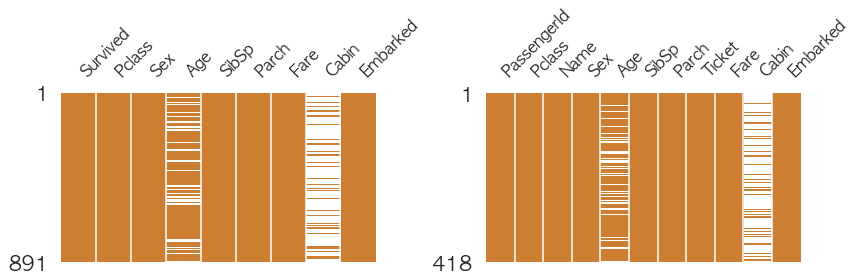

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2), ax=axes[0])
msno.matrix(df=df_test_raw.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2), ax=axes[1])
plt.tight_layout()
plt.show()

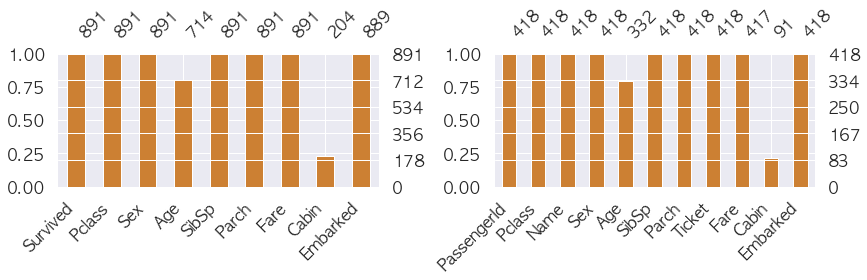

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2), ax=axes[0])
msno.bar(df=df_test_raw.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2), ax=axes[1])
plt.tight_layout()
plt.show()

* 이 Feature들의 결측치는 추후 Feature Engineering 단계에서 적절한 방법으로 처리할 필요가 있다. 

### 변수 유형과 유형별 통계치 확인

* 각 변수 별로 중심경향치, 산포도, 분포, 빈도 등의 통계치를 살펴본다.
    * Categorical - Survived, Pclass, Sex, Cabin, Embarked; 이 중 Sex와 Cabin, Embarked는 Nominal scale, Pclass는 Ordinal  scale
        => **빈도, 분포**
    * Numerical - Age, Fare, SibSp, Parch; 모두 ratio scale.
        => **중심경향치 (mean, median, mode), 산포도 (Standard Deviation), 분포**


#### Categorical - Survived

* Survived 에서 1은 생존, 2는 사망을 나타낸다. 추후 모델링 단계에서 종속 변수 또는 정답 Label로 활용될 것이다.


In [17]:
(df_train
 .filter(['Survived'])
 .value_counts())

Survived
0           549
1           342
dtype: int64

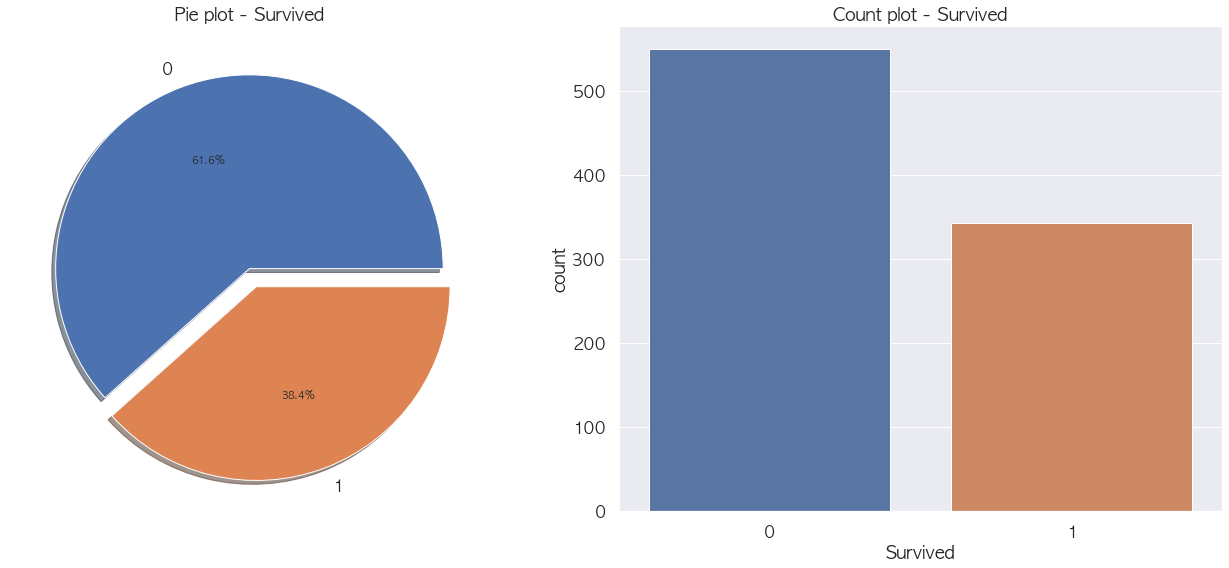

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=axes[0], shadow=True)
axes[0].set_title('Pie plot - Survived')
axes[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=axes[1])
axes[1].set_title('Count plot - Survived')
plt.tight_layout()
plt.show()

* train set 891명 중 549명(61.6%) 생존, 342명(38.4%) 사망하였다.

<br>

* 두 label의 비율이 동일하지 않다. Survived 변수는 종속변수(y)로 model의 training에 활용된다.
* 이 경우 비율이 불균형하면 모델링이 잘 되지 않을 수 있다. 추후 모델링 단계에서 처리할 필요가 있는지 재검토한다.

#### Categorical - Pclass

* Pclass는 탑승자의 티켓 클래스로 1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉜다. 모델의 Feature로 활용된다.
* 1에 가까울수록 부유하거나 부자인 경우를 나타낸다.
* 이미 수치로 바뀌어져 있으므로 수치화하지 않는다

In [19]:
(df_train
 .filter(['Pclass'])
 .value_counts())

Pclass
3         491
1         216
2         184
dtype: int64

* Pclass와 Survived 간의 관계를 살펴본다. 

In [20]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True)

Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891

In [21]:
tmp1 = (df_train[['Pclass', 'Survived']]
 .groupby(['Pclass'], as_index=True)
 .agg('mean')*100)
tmp1

Survived
Pclass           
1       62.962963
2       47.282609
3       24.236253

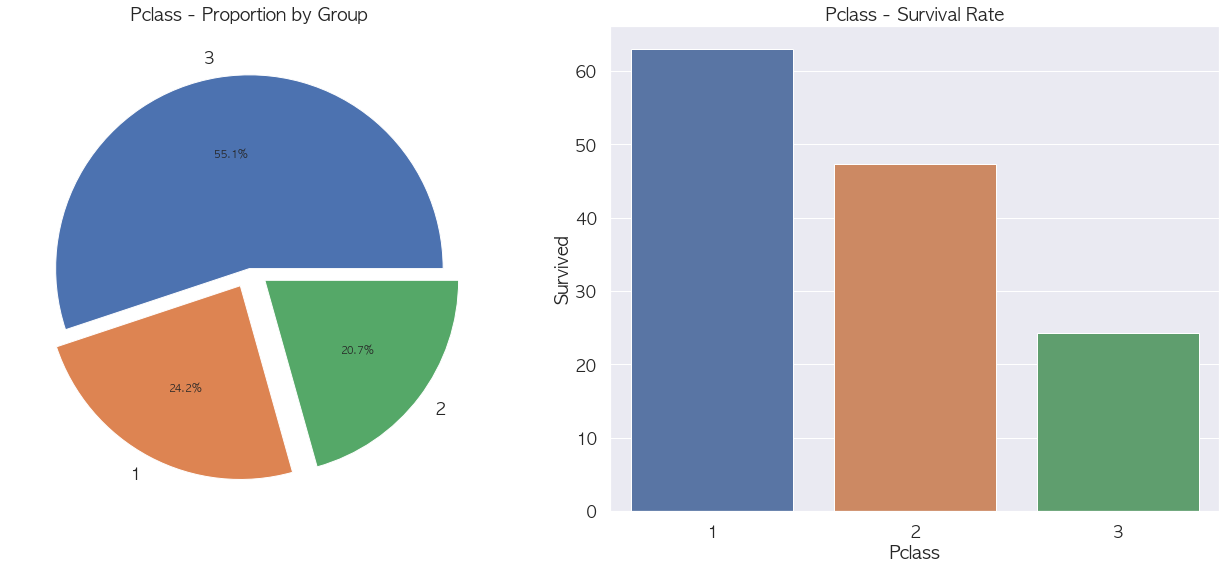

In [22]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.pie(explode=[0, 0.1, 0.1], autopct='%1.1f%%', ax=axes[0], shadow=False)
axes[0].set_title('Pclass - Proportion by Group')
axes[0].set_ylabel('')
sns.barplot(x="Pclass", y="Survived",
                    data=tmp1.reset_index(), ax=axes[1])
axes[1].set_title('Pclass - Survival Rate')
plt.tight_layout()
plt.show()

* train set 891명 중 491명(55.1%)이 3등석, 184명(20.7%)이 2등석, 216(24.2%)이 1등석이었다.

* 1등석 승객일수록 생존률이 높았다. Pclass 변수는 생존 여부를 예측하는데 중요한 역할을 할 것이라는 점을 확인할 수 있다. 

#### Categorical - Sex

* Sex는 성별 변수이며 string형으로 설정되어 있다.
* 분석을 위해 1 = male, 2 = female로 수치화한다. 변환 시 Test Set도 미리 변환한다.

In [23]:
df_train['nSex'] = 0
df_train['nSex'] = df_train_raw['Sex'].replace(['male','female'], [1,2])
df_test_raw['nSex'] = 0
df_test_raw['nSex'] = df_test_raw['Sex'].replace(['male','female'], [1,2])

In [24]:
(df_train
 .filter(['nSex'])
 .value_counts())

nSex
1       577
2       314
dtype: int64

* Sex와 Survived 간의 관계를 살펴본다. 

In [25]:
pd.crosstab(df_train['nSex'], df_train['Survived'], margins = True)

Survived    0    1  All
nSex                   
1         468  109  577
2          81  233  314
All       549  342  891

In [26]:
tmp1 = (df_train[['nSex', 'Survived']]
 .groupby(['nSex'], as_index=True)
 .agg('mean')*100)
tmp1

Survived
nSex           
1     18.890815
2     74.203822

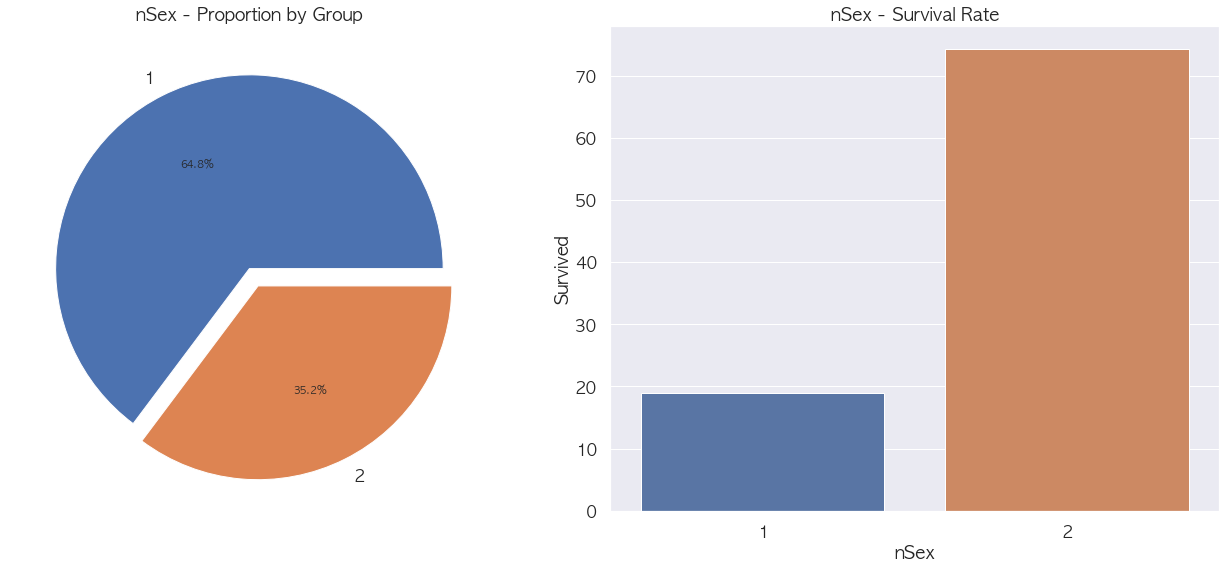

In [27]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 8))
df_train['nSex'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=axes[0], shadow=False)
axes[0].set_title('nSex - Proportion by Group')
axes[0].set_ylabel('')
sns.barplot(x="nSex", y="Survived",
                    data=tmp1.reset_index(), ax=axes[1])
axes[1].set_title('nSex - Survival Rate')
plt.tight_layout()
plt.show()

* train set 891명 중 577명(64.8%)이 남성, 314명(35.2%)이 여성이었다.

* 여성 승객일수록 생존률이 높았다. Sex 변수 또한 생존 여부를 예측하는 주요 변수임을 알 수 있다. 

* 그렇다면 승객의 Sex과 Pclass 간의 관계가 있을까?

In [28]:
tmp_tb = pd.crosstab(df_train['nSex'], df_train['Pclass'], margins = False)
tmp_tb

Pclass    1    2    3
nSex                 
1       122  108  347
2        94   76  144

In [29]:
tmp_tb_p = pd.crosstab(df_train['nSex'], df_train['Pclass'], margins = False, normalize='index')
tmp_tb_p 

Pclass         1         2         3
nSex                                
1       0.211438  0.187175  0.601386
2       0.299363  0.242038  0.458599

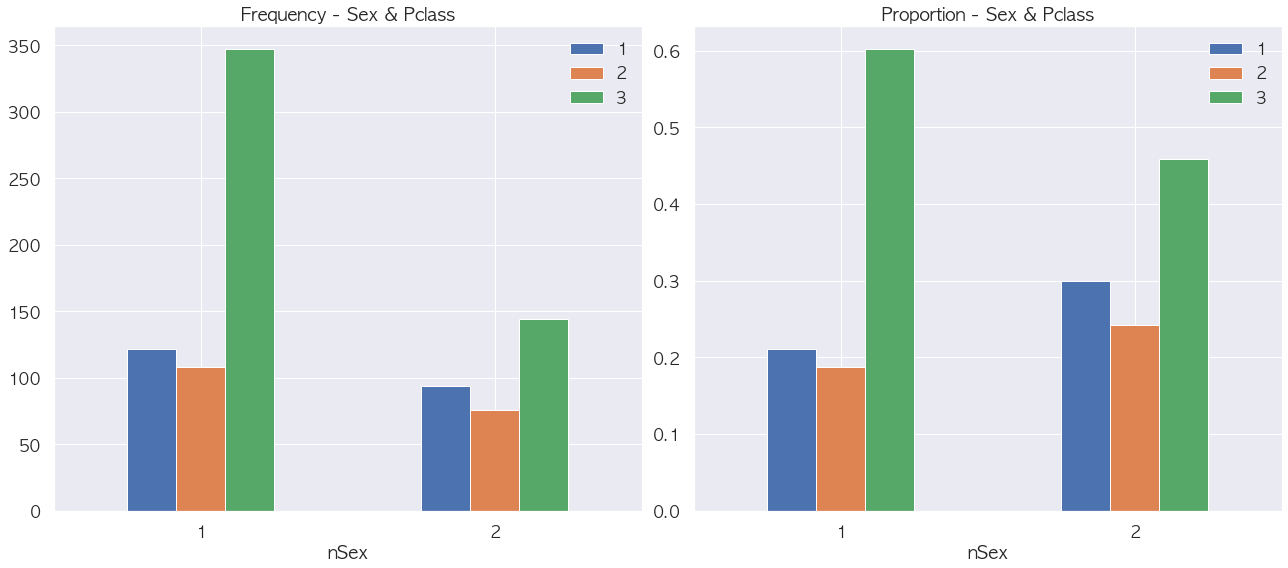

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
g1 = tmp_tb.plot.bar(rot=0, ax=axes[0])
g1.legend(bbox_to_anchor=(1.0, 1.0))
axes[0].set_title('Frequency - Sex & Pclass')

g2 = tmp_tb_p.plot.bar(rot=0, ax=axes[1])
g2.legend(bbox_to_anchor=(1.0, 1.0))
axes[1].set_title('Proportion - Sex & Pclass')
plt.tight_layout()
plt.show()

* 남성 승객 중에 삼등석 승객이 많았던 것으로 나타난다. 반면 여성 승객은 1등석 또는 2등석 탑승자가 남성에 비해 많았다.

* Sex와 Pclass의 상호작용이 있는지 살펴보자

In [31]:
tmp1 = (df_train[['Pclass', 'nSex', 'Survived']]
 .groupby(['Pclass', 'nSex'], as_index=True)
 .agg('mean')*100)
tmp1

Survived
Pclass nSex           
1      1     36.885246
       2     96.808511
2      1     15.740741
       2     92.105263
3      1     13.544669
       2     50.000000

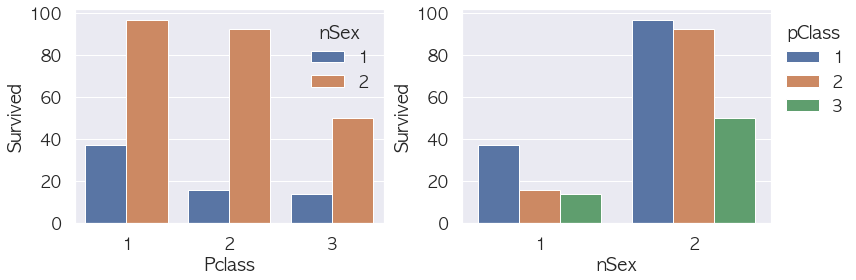

In [32]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
g1=sns.barplot(x="Pclass", y="Survived", hue='nSex',
                    data=tmp1.reset_index(), ax=axes[0])
g1.legend(title='nSex', bbox_to_anchor=(1.0, 1.0))
g2=sns.barplot(x="nSex", y="Survived", hue='Pclass',
                    data=tmp1.reset_index(), ax=axes[1])
g2.legend(title='pClass', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

* 전반적으로 여성 승객의 생존률이 높게 나타나지만, Pclass에 의한 상호작용도 관찰된다. 구체적으로, 여성의 경우 전 티켓클래스에서 생존률이 높았지만, 3번째 티켓클래스에서 생존률이 급락한 데에 비해 남성은 첫번째 티켓 클래스를 제외하고 두번째, 세번째 모두 낮은 생존률을 보였다. 상호작용의 통계적 유의성은 여기서 확인하지 않도록 한다.

#### Categorical - Cabin

* Cabin은 객실 넘버를 나타내며 결측치가 891개 중 687개에 달한다.
* 타이타닉에서 객실 넘버가 어떤 의미를 가지고 있는지 알 수 없으며, 이 결측치가 유실에 의해 생긴 것인지, 번호가 없는 공간에 있었던 것인지 불명확하다. 어쩌면 Pclass 나 Sex, Survived 와 어떤 관계가 있을지 모른다. 
* 현재 Cabin에서 고유한 값이 얼마나 있는지부터 확인해보자

In [33]:
print('** Train Set')
print('고유값의 수 : %d' % df_train['Cabin'].nunique())
print('고유값 :', df_train['Cabin'].unique())
print('-'*50)
print('** Test Set')
print('고유값의 수 : %d' % df_test_raw['Cabin'].nunique())
print('고유값 :', df_test_raw['Cabin'].unique())

** Train Set
고유값의 수 : 147
고유값 : [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
-----------

In [34]:
df_train['Cabin'].value_counts(ascending=False)

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

* 결측치(687)가 아닌 204개의 값 중 고유값의 종류가 147개에 달하며, 고유값의 중복 정도가 최대 4이다.
* 따라서 각 고유값들을 개별 변수로 처리하기보다는 객실 번호가 있는 경우(204)를 1, 없는 경우(결측치, 687)를 2로 변환하여 살펴본다. Test Set로 미리 변환해두자

In [35]:
df_train['nCabin'] = 0
df_train['nCabin'].loc[-df_train['Cabin'].isnull(),] = 1
df_train['nCabin'].loc[df_train['Cabin'].isnull(),] = 2

df_test_raw['nCabin'] = 0
df_test_raw['nCabin'].loc[-df_test_raw['Cabin'].isnull(),] = 1
df_test_raw['nCabin'].loc[df_test_raw['Cabin'].isnull(),] = 2

In [36]:
(df_train
 .filter(['nCabin'])
 .value_counts())

nCabin
2         687
1         204
dtype: int64

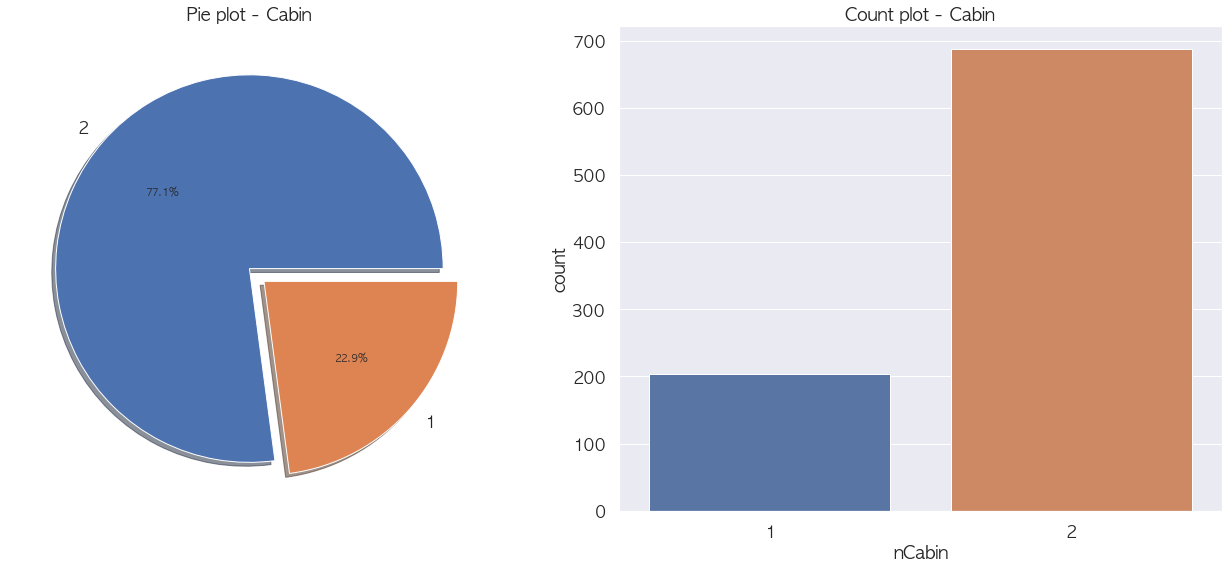

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

df_train['nCabin'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=axes[0], shadow=True)
axes[0].set_title('Pie plot - Cabin')
axes[0].set_ylabel('')
sns.countplot('nCabin', data=df_train, ax=axes[1])
axes[1].set_title('Count plot - Cabin')
plt.tight_layout()
plt.show()

* train set 891명 중 204명(22.9%)이 객실 번호가 있었고, 687명(77.1%)이 객실 번호가 없었다.

* Cabin 여부와 PClass 간의 관계를 살펴보자.

In [38]:
tmp_tb = pd.crosstab(df_train['nCabin'], df_train['Pclass'], margins = False)
tmp_tb

Pclass    1    2    3
nCabin               
1       176   16   12
2        40  168  479

In [39]:
tmp_tb_p = pd.crosstab(df_train['nCabin'], df_train['Pclass'], margins = False, normalize='index')
tmp_tb_p 

Pclass         1         2         3
nCabin                              
1       0.862745  0.078431  0.058824
2       0.058224  0.244541  0.697234

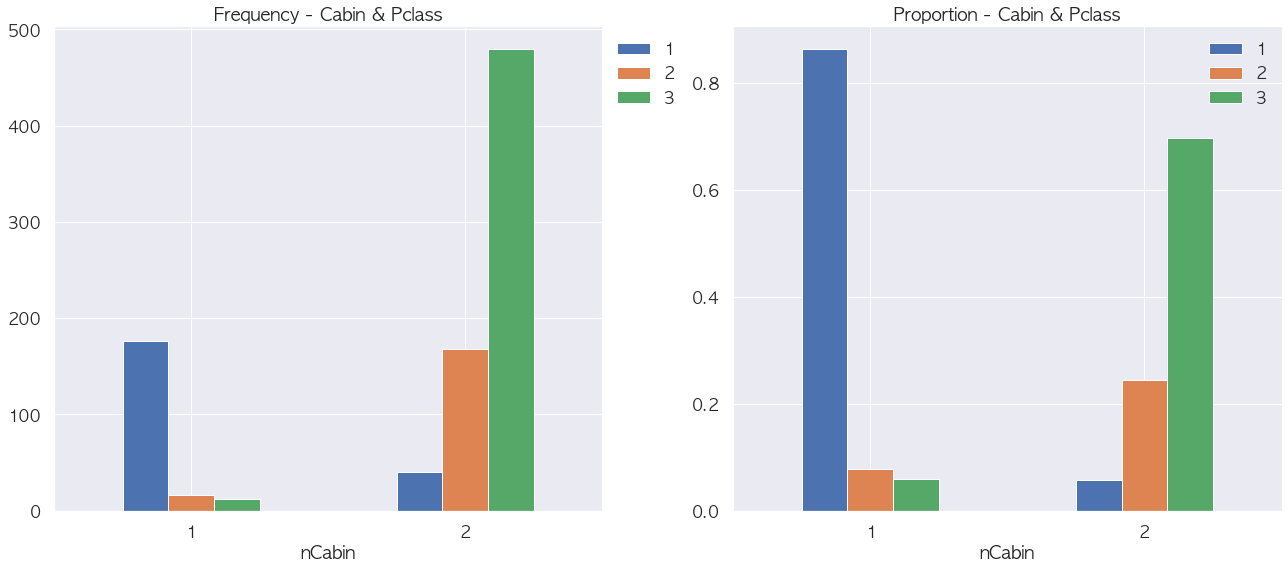

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
g1 = tmp_tb.plot.bar(rot=0, ax=axes[0])
g1.legend(bbox_to_anchor=(1.0, 1.0))
axes[0].set_title('Frequency - Cabin & Pclass')

g2 = tmp_tb_p.plot.bar(rot=0, ax=axes[1])
g2.legend(bbox_to_anchor=(1.0, 1.0))
axes[1].set_title('Proportion - Cabin & Pclass')
plt.tight_layout()
plt.show()

* 1등석 승객일수록 Cabin이 남아있는 것을 볼 수 있다.

* Cabin과 Survived 간의 관계를 보자.

In [41]:
tmp_tb = pd.crosstab(df_train['nCabin'], df_train['Survived'], margins = True)
tmp_tb

Survived    0    1  All
nCabin                 
1          68  136  204
2         481  206  687
All       549  342  891

In [42]:
tmp_tb_p = pd.crosstab(df_train['nCabin'], df_train['Survived'], margins = False, normalize='index')
tmp_tb_p

Survived         0         1
nCabin                      
1         0.333333  0.666667
2         0.700146  0.299854

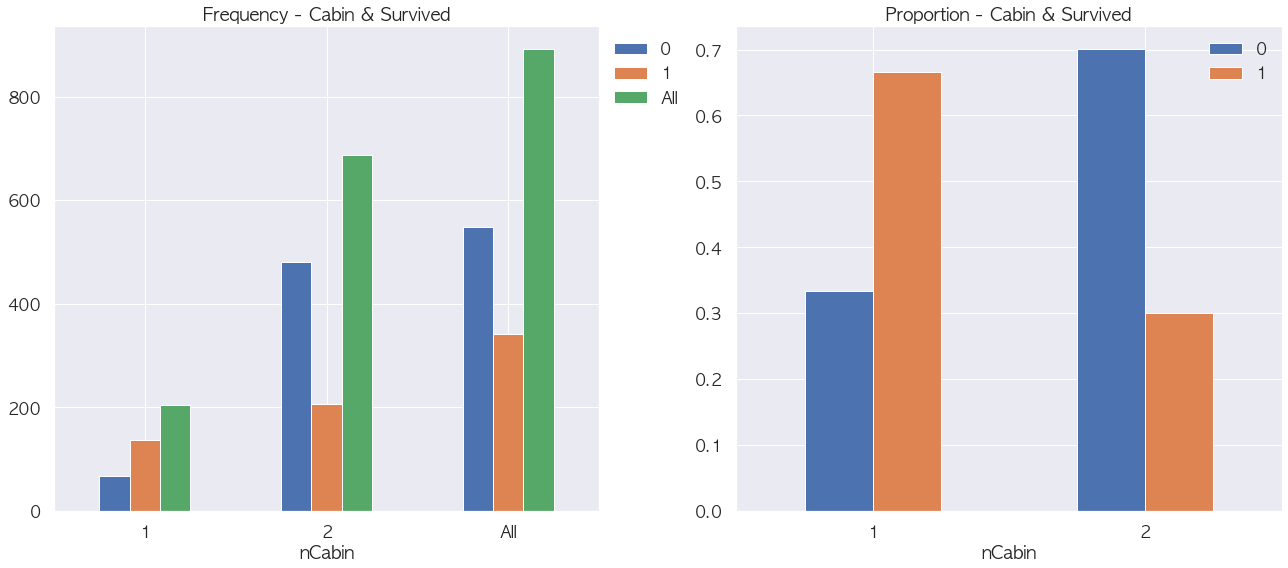

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
g1 = tmp_tb.plot.bar(rot=0, ax=axes[0])
g1.legend(bbox_to_anchor=(1.0, 1.0))
axes[0].set_title('Frequency - Cabin & Survived')

g2 = tmp_tb_p.plot.bar(rot=0, ax=axes[1])
g2.legend(bbox_to_anchor=(1.0, 1.0))
axes[1].set_title('Proportion - Cabin & Survived')
plt.tight_layout()
plt.show()

* 생존자 342명 중 67%에 달하는 136명에서 Cabin이 남아있었다.  

In [44]:
tmp1 = (df_train[['Pclass', 'nCabin', 'Survived']]
 .groupby(['Pclass', 'nCabin'], as_index=True)
 .agg('mean')*100)
tmp1

Survived
Pclass nCabin           
1      1       66.477273
       2       47.500000
2      1       81.250000
       2       44.047619
3      1       50.000000
       2       23.590814

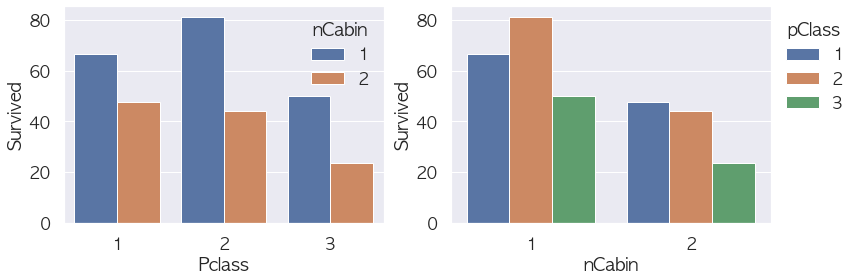

In [45]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
g1=sns.barplot(x="Pclass", y="Survived", hue='nCabin',
                    data=tmp1.reset_index(), ax=axes[0])
g1.legend(title='nCabin', bbox_to_anchor=(1.0, 1.0))
g2=sns.barplot(x="nCabin", y="Survived", hue='Pclass',
                    data=tmp1.reset_index(), ax=axes[1])
g2.legend(title='pClass', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

* Cabin과 Pclass의 상호작용이 관찰된다. 전 Pclass 중에서도 Cabin이 있는 경우가 생존률이 높았다. 
* 앞선 Pclass와 함께 고려할 때, 객실 번호 Cabin 정보가 남아있는 경우는 탑승객의 생존으로 객실 번호 정보가 확인 가능한 경우거나, 부유할수록 객실 번호가 있는 제대로된 객실에서 묵었기 때문일 수 있다. 어떤 것이 더 타당한지는 확인할 수 없지만, 생존 여부를 예측하는데 Cabin의 정보가가 있는 것으로 보인다. 

#### Categorical - Embarked

* Embarked는 승객의 탑승 항구로 C = Cherbourg, Q = Queenstown, S = Southampton로 나뉜다.
* 탑승 항구에 따른 경제 수준의 차이(즉, Pclass에 영향)가 있거나, 여객선에 얼마나 오래 탑승해있었는지 등에 영향을 미칠 가능성이 있다. 이러한 특성이 생존률에 어떤 영향을 미쳤을지는 확실하지 않으나 분석을 통해 관계를 살펴보자.
* String 형이므로 C = 1, Q = 2, S = 3으로 변환한다.

In [46]:
print('Train set :' , df_train['Embarked'].isnull().sum())
print('Test set :', df_test_raw['Embarked'].isnull().sum())

Train set : 2
Test set : 0


* Train Set에 결측치가 2개 있다. 이는 추후 처리한다.

In [47]:
print('** Train Set')
print('고유값의 수 : %d' % df_train['Embarked'].nunique())
print('고유값 :', df_train['Embarked'].unique())
print('-'*50)
print('** Test Set')
print('고유값의 수 : %d' % df_test_raw['Embarked'].nunique())
print('고유값 :', df_test_raw['Embarked'].unique())

** Train Set
고유값의 수 : 3
고유값 : ['S' 'C' 'Q' nan]
--------------------------------------------------
** Test Set
고유값의 수 : 3
고유값 : ['Q' 'S' 'C']


In [48]:
df_train['nEmb'] = 0
df_train['nEmb'] = df_train_raw['Embarked'].replace(['C','Q','S'], [1,2,3])
df_test_raw['nEmb'] = 0
df_test_raw['nEmb'] = df_test_raw['Embarked'].replace(['C','Q','S'], [1,2,3])

* Embarked의 빈도와 Embarked와 Survived 간의 관계를 보자

In [49]:
(df_train
 .filter(['nEmb'])
 .value_counts())

nEmb
3.0     644
1.0     168
2.0      77
dtype: int64

* Southampton, Cherbourg, Queenstown 순으로 탑승객의 수가 많았다. 

In [50]:
pd.crosstab(df_train['nEmb'], df_train['Survived'], margins = True)

Survived    0    1  All
nEmb                   
1.0        75   93  168
2.0        47   30   77
3.0       427  217  644
All       549  340  889

In [51]:
tmp1 = (df_train[['nEmb', 'Survived']]
 .groupby(['nEmb'], as_index=True)
 .agg('mean')*100)
tmp1

Survived
nEmb           
1.0   55.357143
2.0   38.961039
3.0   33.695652

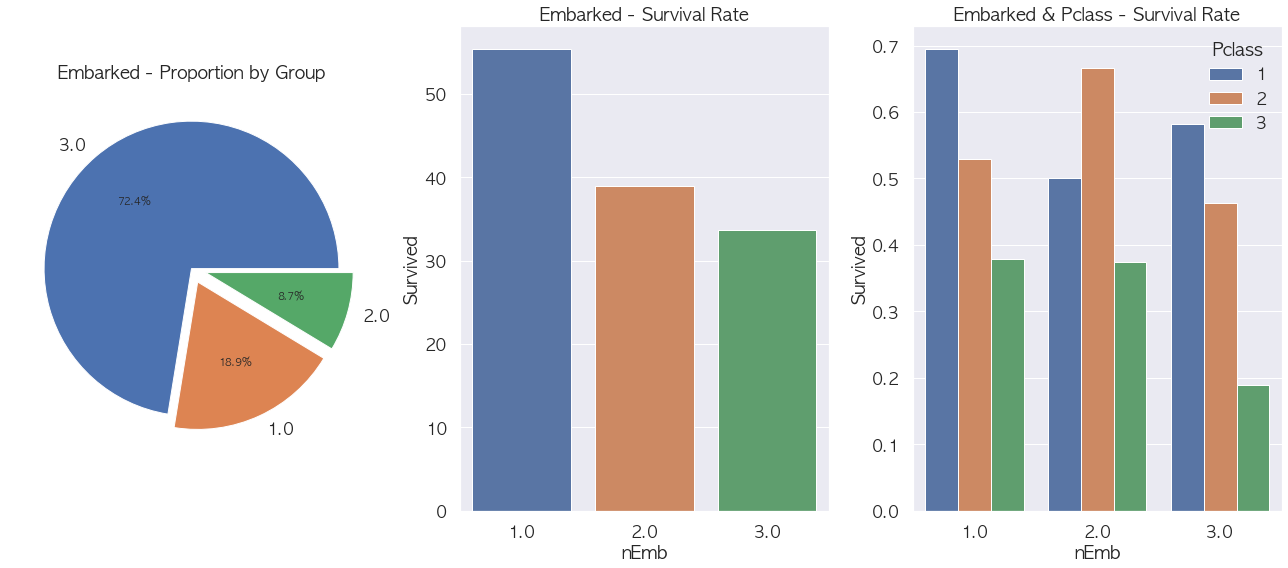

In [52]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 8))
df_train['nEmb'].value_counts().plot.pie(explode=[0, 0.1, 0.1], autopct='%1.1f%%', ax=axes[0], shadow=False)
axes[0].set_title('Embarked - Proportion by Group')
axes[0].set_ylabel('')
sns.barplot(x="nEmb", y="Survived",
                    data=tmp1.reset_index(), ax=axes[1])
axes[1].set_title('Embarked - Survival Rate')
sns.barplot(x="nEmb", y="Survived", hue="Pclass", estimator=np.mean,
                    data=df_train, ax=axes[2], ci = None)
axes[2].set_title('Embarked & Pclass - Survival Rate')

plt.tight_layout()
plt.show()

* 탑승 항구에 따른 생존률 차이가 관찰되었다. Cherbourg(1)이 Queenstown(2), Southampton(3) 보다 높은 생존률을 보였다.
* 탑승 항구 또한 생존률을 예측하는데 유용할 것으로 보인다.

#### Continuous - Age

* Age는 연령 변수이다. 통계치와 분포를 살펴보고 생존률과 관계가 있는지 확인한다. 

In [53]:
tmp_ds = deepcopy(df_train['Age'])
pd.DataFrame({'Count_val':tmp_ds.count(),
              'Count_Nan':tmp_ds.isnull().sum(),
              'Mean':tmp_ds.mean(),
              'Median':tmp_ds.median(),
              'Mode':tmp_ds.mode(),
              'Std':tmp_ds.std(),
              'Var':tmp_ds.var(),
              'Min':tmp_ds.min(),
              '25% Q':tmp_ds.quantile(q=0.25, interpolation='linear'),
              '50% Q':tmp_ds.quantile(q=0.5, interpolation='linear'),
              '75% Q':tmp_ds.quantile(q=0.75, interpolation='linear'),
              'Max':tmp_ds.max(),
              'Skewness':tmp_ds.skew(),
              'Kurtosis':tmp_ds.kurt(),
             }).T

0
Count_val  714.000000
Count_Nan  177.000000
Mean        29.699118
Median      28.000000
Mode        24.000000
Std         14.526497
Var        211.019125
Min          0.420000
25% Q       20.125000
50% Q       28.000000
75% Q       38.000000
Max         80.000000
Skewness     0.389108
Kurtosis     0.178274

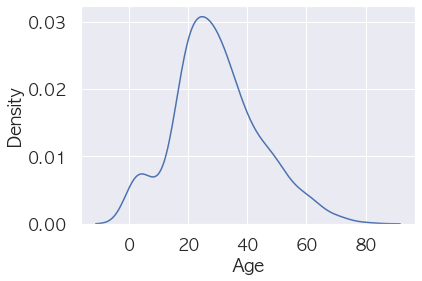

In [54]:
sns.kdeplot(df_train['Age'])
plt.show()

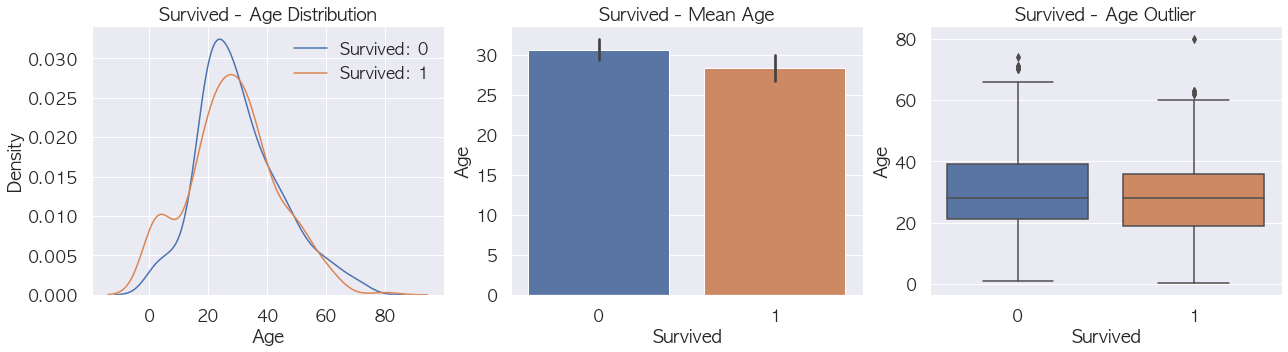

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
g1=sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax[0])
g1=sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax[0])
g1.legend(['Survived: 0', 'Survived: 1'], bbox_to_anchor=(1.0, 1.0))
ax[0].set_title('Survived - Age Distribution')
g2=sns.barplot(x="Survived", y="Age", estimator=np.mean,
                    data=df_train, ax=ax[1])
ax[1].set_title('Survived - Mean Age')
g3=sns.boxplot(x="Survived", y="Age",
                    data=df_train, ax=ax[2])
ax[2].set_title('Survived - Age Outlier')
plt.tight_layout()
plt.show()

* 전반적으로 정규 분포의 형태를 보인다. 생존 여부에 따라 구분해봤을 때, 나이가 어린 구간에서 생존률이 높게 나타났다. 

#### Continuous - Fare

* Fare는	탑승료로 continuous 변수이다. 티켓 클라스와 관련이 있을 것으로 보인다.

In [56]:
tmp_ds = deepcopy(df_train['Fare'])
pd.DataFrame({'Count_val':tmp_ds.count(),
              'Count_Nan':tmp_ds.isnull().sum(),
              'Mean':tmp_ds.mean(),
              'Median':tmp_ds.median(),
              'Mode':tmp_ds.mode(),
              'Std':tmp_ds.std(),
              'Var':tmp_ds.var(),
              'Min':tmp_ds.min(),
              '25% Q':tmp_ds.quantile(q=0.25, interpolation='linear'),
              '50% Q':tmp_ds.quantile(q=0.5, interpolation='linear'),
              '75% Q':tmp_ds.quantile(q=0.75, interpolation='linear'),
              'Max':tmp_ds.max(),
              'Skewness':tmp_ds.skew(),
              'Kurtosis':tmp_ds.kurt(),
             }).T

0
Count_val   891.000000
Count_Nan     0.000000
Mean         32.204208
Median       14.454200
Mode          8.050000
Std          49.693429
Var        2469.436846
Min           0.000000
25% Q         7.910400
50% Q        14.454200
75% Q        31.000000
Max         512.329200
Skewness      4.787317
Kurtosis     33.398141

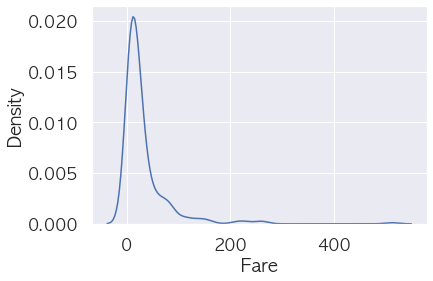

In [57]:
sns.kdeplot(df_train['Fare'])
plt.show()

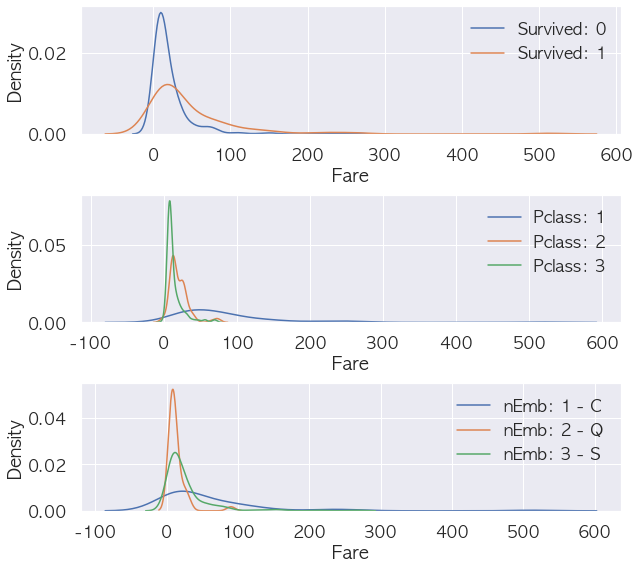

In [58]:
fig, ax = plt.subplots(3, 1, figsize=(9, 8))
g1=sns.kdeplot(df_train[df_train['Survived'] == 0]['Fare'], ax=ax[0])
g1=sns.kdeplot(df_train[df_train['Survived'] == 1]['Fare'], ax=ax[0])
g1.legend(['Survived: 0', 'Survived: 1'], bbox_to_anchor=(1.0, 1.0))

g2=sns.kdeplot(df_train[df_train['Pclass'] == 1]['Fare'], ax=ax[1])
g2=sns.kdeplot(df_train[df_train['Pclass'] == 2]['Fare'], ax=ax[1])
g2=sns.kdeplot(df_train[df_train['Pclass'] == 3]['Fare'], ax=ax[1])
g2.legend(['Pclass: 1', 'Pclass: 2', 'Pclass: 3'], bbox_to_anchor=(1.0, 1.0))

g3=sns.kdeplot(df_train[df_train['nEmb'] == 1]['Fare'], ax=ax[2])
g3=sns.kdeplot(df_train[df_train['nEmb'] == 2]['Fare'], ax=ax[2])
g3=sns.kdeplot(df_train[df_train['nEmb'] == 3]['Fare'], ax=ax[2])
g3.legend(['nEmb: 1 - C ', 'nEmb: 2 - Q', 'nEmb: 3 - S'], bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.show()

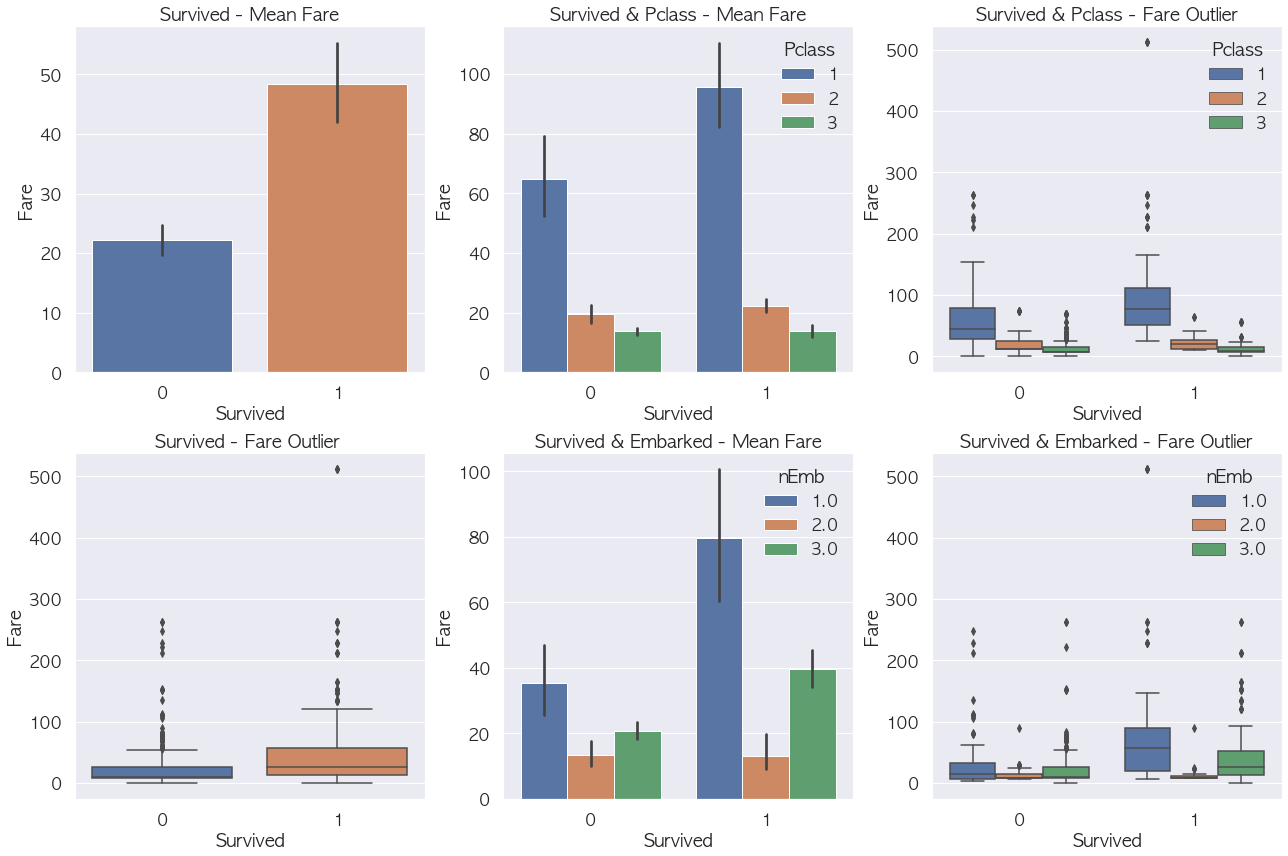

In [59]:
fig, ax = plt.subplots(2, 3, figsize=(18, 12))
g1=sns.barplot(x="Survived", y="Fare", estimator=np.mean,
                    data=df_train, ax=ax[0,0])
ax[0,0].set_title('Survived - Mean Fare')
g2=sns.barplot(x="Survived", y="Fare", hue = "Pclass", estimator=np.mean,
                    data=df_train, ax=ax[0,1])
ax[0,1].set_title('Survived & Pclass - Mean Fare')
g3=sns.boxplot(x="Survived", y="Fare", hue = "Pclass",
                    data=df_train, ax=ax[0,2])
ax[0,2].set_title('Survived & Pclass - Fare Outlier')
g4=sns.boxplot(x="Survived", y="Fare",
                    data=df_train, ax=ax[1,0])
ax[1,0].set_title('Survived - Fare Outlier ')
g5=sns.barplot(x="Survived", y="Fare", hue = "nEmb", estimator=np.mean,
                    data=df_train, ax=ax[1,1])
ax[1,1].set_title('Survived & Embarked - Mean Fare')

g6=sns.boxplot(x="Survived", y="Fare", hue = "nEmb",
                    data=df_train, ax=ax[1,2])
ax[1,2].set_title('Survived & Embarked - Fare Outlier')


plt.tight_layout()
plt.show()


* Fare가 높은 경우에 생존률이 더 높게 나타났다. 
* Pclass, Embarked도 생존률, Fare와 관계가 있는 것으로 보인다. 구체적으로 Pclass가 높을수록 Fare가 높았고, 생존률도 높았다. 또 Embarked 1에서 탑승한 사람들의 생존률이 높고, Fare도 높게 나타났다.

#### Continuous - Family

* sibsp는 함께 탑승한 형제자매, 배우자 수의 총합, parch는 함께 탑승한 부모, 자녀 수의 총합이다. 
* 이 두 변수는 개별적으로 생존률과 관계가 있을 수 있지만, 여기에서는 자신을 포함한 가족 구성원수로 변환하여 살펴본다.

In [60]:
df_train['family'] = 0
df_train['family'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test_raw['family'] = 0
df_test_raw['family'] = df_test_raw['SibSp'] + df_test_raw['Parch'] + 1

In [61]:
tmp_ds = deepcopy(df_train['family'])
pd.DataFrame({'Count_val':tmp_ds.count(),
              'Count_Nan':tmp_ds.isnull().sum(),
              'Mean':tmp_ds.mean(),
              'Median':tmp_ds.median(),
              'Mode':tmp_ds.mode(),
              'Std':tmp_ds.std(),
              'Var':tmp_ds.var(),
              'Min':tmp_ds.min(),
              '25% Q':tmp_ds.quantile(q=0.25, interpolation='linear'),
              '50% Q':tmp_ds.quantile(q=0.5, interpolation='linear'),
              '75% Q':tmp_ds.quantile(q=0.75, interpolation='linear'),
              'Max':tmp_ds.max(),
              'Skewness':tmp_ds.skew(),
              'Kurtosis':tmp_ds.kurt(),
             }).T

0
Count_val  891.000000
Count_Nan    0.000000
Mean         1.904602
Median       1.000000
Mode         1.000000
Std          1.613459
Var          2.603248
Min          1.000000
25% Q        1.000000
50% Q        1.000000
75% Q        2.000000
Max         11.000000
Skewness     2.727441
Kurtosis     9.159666

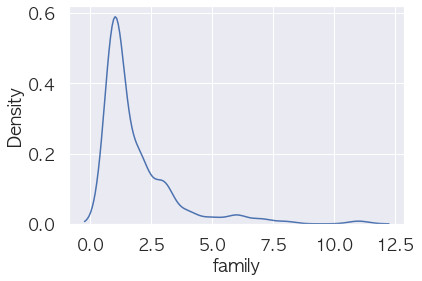

In [62]:
sns.kdeplot(df_train['family'])
plt.show()

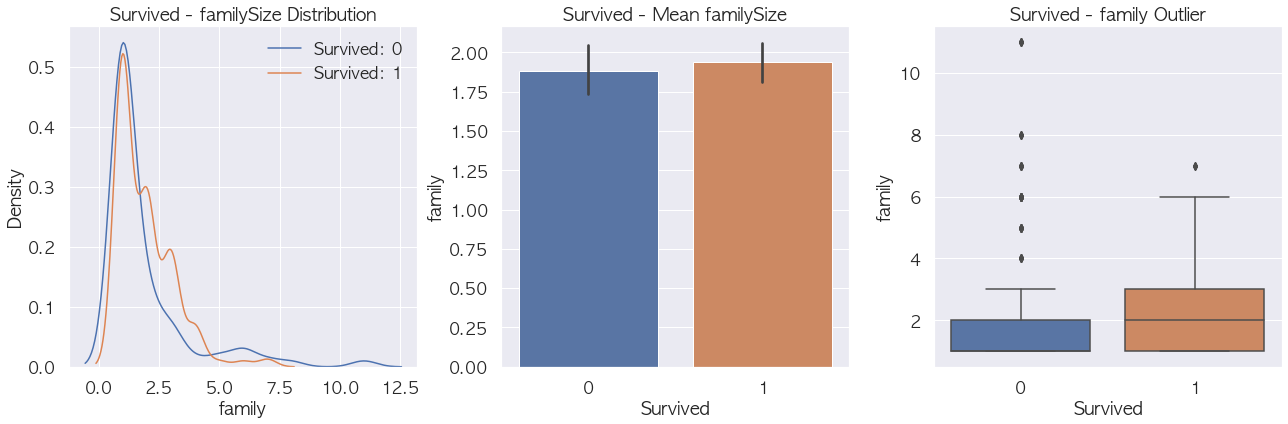

In [63]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
g1=sns.kdeplot(df_train[df_train['Survived'] == 0]['family'], ax=ax[0])
g1=sns.kdeplot(df_train[df_train['Survived'] == 1]['family'], ax=ax[0])
g1.legend(['Survived: 0', 'Survived: 1'], bbox_to_anchor=(1.0, 1.0))

ax[0].set_title('Survived - familySize Distribution')
g2=sns.barplot(x="Survived", y="family", estimator=np.mean,
                    data=df_train, ax=ax[1])
ax[1].set_title('Survived - Mean familySize')
g3=sns.boxplot(x="Survived", y="family",
                    data=df_train, ax=ax[2])
ax[2].set_title('Survived - family Outlier')

plt.tight_layout()
plt.show()

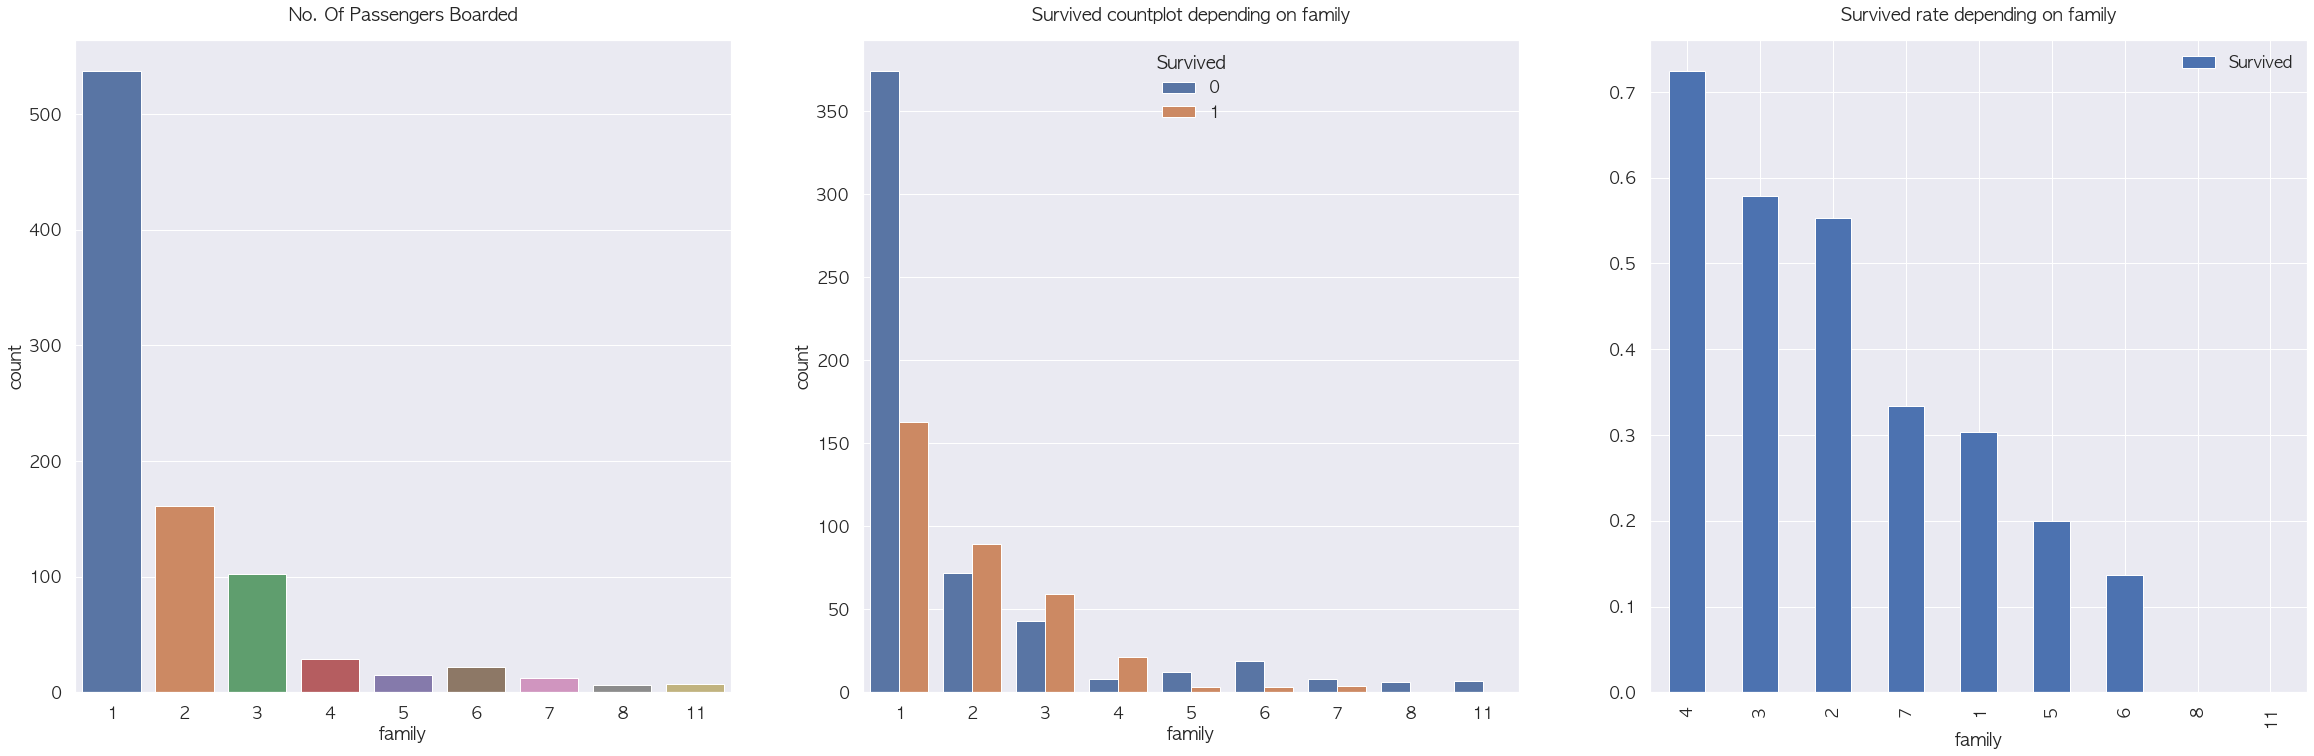

In [64]:
f,ax=plt.subplots(1, 3, figsize=(40,12))
sns.countplot('family', data=df_train, ax=ax[0])
ax[0].set_title('No. Of Passengers Boarded', y=1.02)

sns.countplot('family', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Survived countplot depending on family',  y=1.02)

(df_train[['family', 'Survived']]
.groupby(['family'], as_index=True)
.mean()
.sort_values(by='Survived', ascending=False)
.plot.bar(ax=ax[2]))
ax[2].set_title('Survived rate depending on family',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* 가족 구성원이 많은 경우에 생존률이 높았던 것으로 보인다. 4명, 3명, 2명, 7명, 1명 순으로 생존률이 높게 나타났다.

### 변수 간 관계 시각화

* 개별 변수에 대한 EDA 결과, Categorical로는 Pclass, Sex, Cabin, Embarked, Continuous로는 Age, Fare, Family가 모두 생존률과 일정한 관계를 가지고 있는 것으로 보인다. 여기서는 각 변수 간의 관계를 간단히 살펴보자

#### Pclass, Sex, Age, Fare, Family - Survived

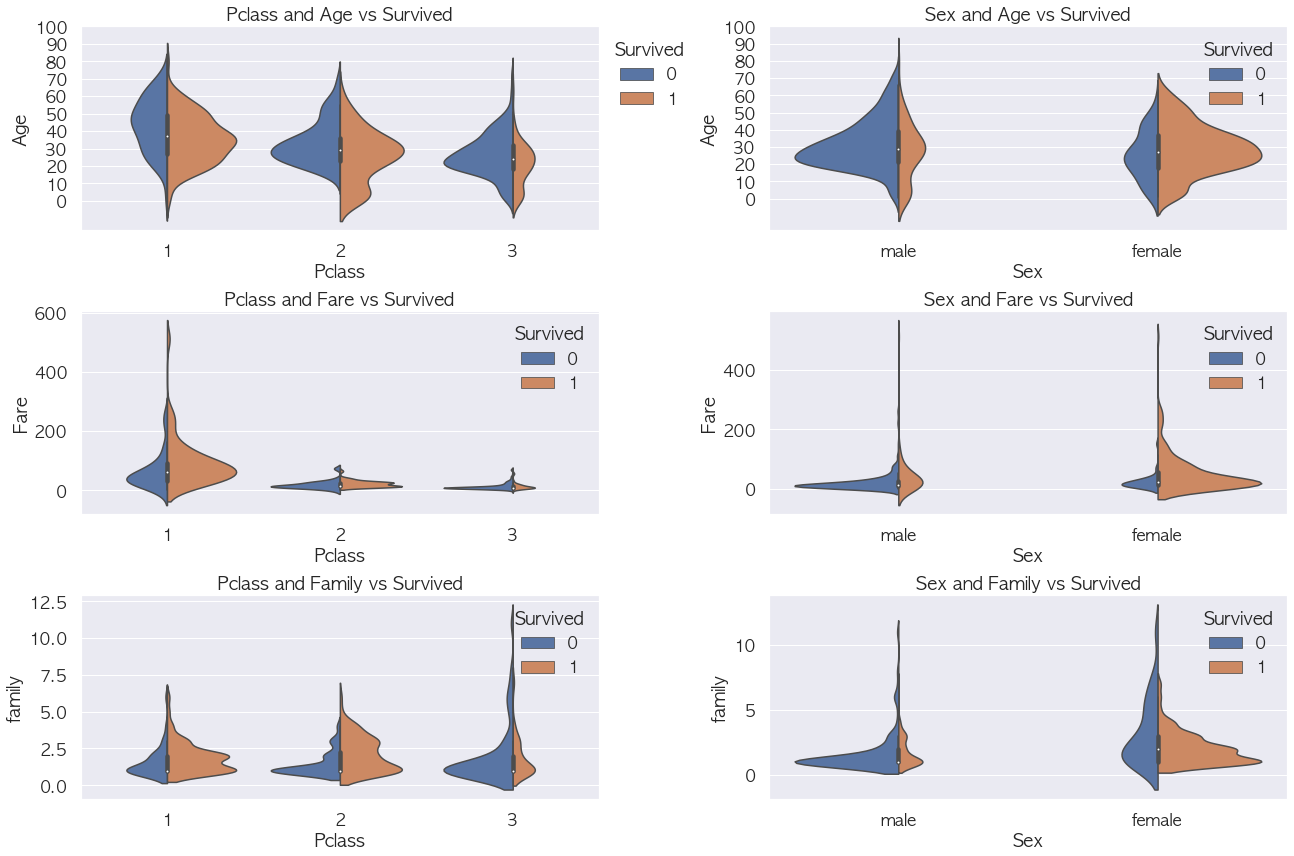

In [65]:
f,ax=plt.subplots(3,2,figsize=(18,12))
sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0,0])
ax[0,0].set_title('Pclass and Age vs Survived')
ax[0,0].set_yticks(range(0,110,10))
ax[0,0].legend(title='Survived', bbox_to_anchor=(1.0, 1.0))
sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0,1])
ax[0,1].set_title('Sex and Age vs Survived')
ax[0,1].set_yticks(range(0,110,10))
ax[0,1].legend(title='Survived',bbox_to_anchor=(1.0, 1.0))
sns.violinplot("Pclass","Fare", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1,0])
ax[1,0].set_title('Pclass and Fare vs Survived')
#ax[1,0].set_yticks(range(0,110,10))
ax[1,0].legend(title='Survived',bbox_to_anchor=(1.0, 1.0))
sns.violinplot("Sex","Fare", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1,1])
ax[1,1].set_title('Sex and Fare vs Survived')
#ax[1,1].set_yticks(range(0,110,10))
ax[1,1].legend(title='Survived',bbox_to_anchor=(1.0, 1.0))
sns.violinplot("Pclass","family", hue="Survived", data=df_train, scale='count', split=True,ax=ax[2,0])
ax[2,0].set_title('Pclass and Family vs Survived')
#ax[2,0].set_yticks(range(0,110,10))
ax[2,0].legend(title='Survived',bbox_to_anchor=(1.0, 1.0))
sns.violinplot("Sex","family", hue="Survived", data=df_train, scale='count', split=True,ax=ax[2,1])
ax[2,1].set_title('Sex and Family vs Survived')
#ax[2,1].set_yticks(range(0,110,10))
ax[2,1].legend(title='Survived',bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()

plt.show()

#### Age, Fare, Family

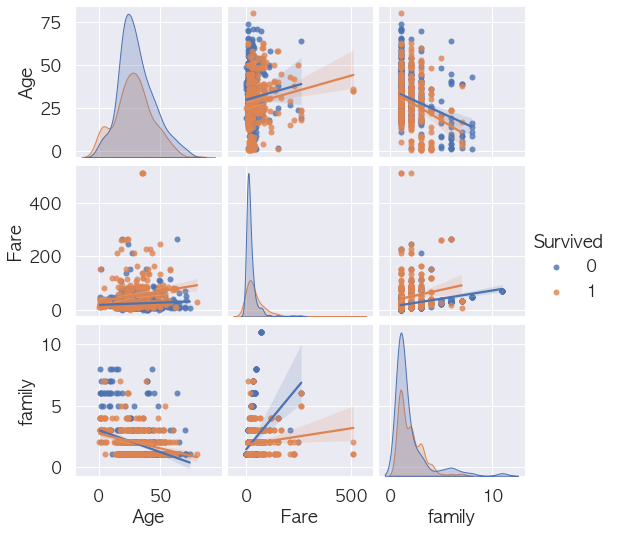

In [66]:
g1 = sns.pairplot(data=df_train[['Age','Fare','family','Survived']], 
             kind = 'reg',
             hue = 'Survived')
plt.show()

### 변수 간 관계 분석

* 지금까지 Pclass, Sex, Cabin, Embarked, Age, Fare, Family 변수 각각의 유형과 통계치, Survived 와의 관계, 서로 간의 관계를 간단히 살펴보았다. 본격적으로 Feature Engineering에 들어가기 앞서 각 변수들 간의 관계를 간단히 살펴보겠다. 
* Categorical 변수로는 Pclass, Sex, Cabin, Embarked, Continuous 변수로는 Age, Fare, Family가 있다. 변수의 특성에 따라 변수 간 관계를 확인하는 방식이 달라진다. 

* 범주,이산형 변수 간 상관 분석은 Cramér's V를 활용하여 수행할 수 있다.
* Cramér's V는 두 범주,이산형 변수 간의 연관성의 크기 정도를 나타낸다. V coefficienct는 항상 양수이며, 두 변수가 최대의 연관성을 가질때는 1, 아무런 연관성이 없을 때는 0 으로 계산된다.

In [67]:
# https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix/notebook
def cramers_V(var1,var2):
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    chi2  = stats.chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    n = np.sum(crosstab) # Number of observations
    phi2 = chi2 / n 
    r, k = crosstab.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))    

In [68]:
targ_data = deepcopy(df_train[['Pclass', 'nSex', 'nCabin', 'nEmb']])

rows= []
for var1 in targ_data:
    col = []
    for var2 in targ_data:
        cramers =cramers_V(targ_data[var1], targ_data[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
cramers_results = np.array(rows)
results_matrix = pd.DataFrame(cramers_results, columns = targ_data.columns, index = targ_data.columns)
results_matrix

Pclass  nSex  nCabin  nEmb
Pclass    1.00  0.13    0.79  0.26
nSex      0.13  1.00    0.13  0.11
nCabin    0.79  0.13    1.00  0.23
nEmb      0.26  0.11    0.23  1.00

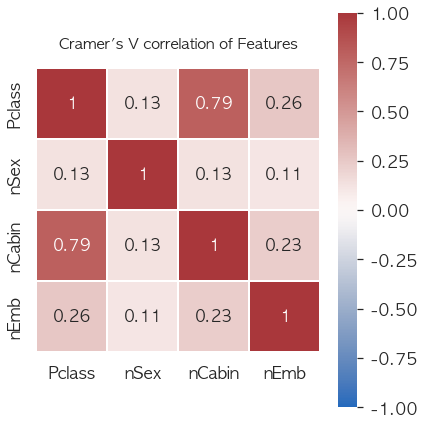

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

plt.title("Cramer's V correlation of Features", y=1.05, size=15)
g1= sns.heatmap(results_matrix, linewidths=0.1, vmax=1.0, vmin=-1.0,
           square=True, cmap= "vlag", linecolor='white', annot=True, annot_kws={"size": 16},
               ax = ax)
plt.tight_layout()
plt.show()

* Pclass와 nCabin 간의 연관성이 높게 나타났다.

* 연속형 변수 간의 상관 분석은 Pearson, Spearman, Kendall 등을 사용할 수 있다. 여기서는 간단히 Pearson Correlation을 활용한다. 
* Pclass의 경우 값이 낮을수록 사회경제적 수준도 낮다는 것을 의미하는 순위형의 특성을 반영하므로 함께 넣어보았다. 단, 정확한 분석을 위해서는 순위형 자료 간의 상관을 측정하는 Spearman 또는 Kendall을 사용하는 것이 적절하다. 

In [70]:
targ_data = deepcopy(df_train[['Pclass', 'Age','Fare','family']])
targ_data.corr(method ='pearson') # pearson, kendall, spearman
# df_train[['Pclass', 'Age','Fare','family']].corr(method ='spearman') # pearson, kendall, spearman


Pclass       Age      Fare    family
Pclass  1.000000 -0.369226 -0.549500  0.065997
Age    -0.369226  1.000000  0.096067 -0.301914
Fare   -0.549500  0.096067  1.000000  0.217138
family  0.065997 -0.301914  0.217138  1.000000

In [71]:
corr_val = targ_data.corr(method ='pearson')
p_val = targ_data.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(*corr_val.shape)
# stats.spearmanr
p = p_val.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
corr_val.round(2).astype(str) + p

Pclass       Age      Fare   family
Pclass    1.0***  -0.37***  -0.55***   0.07**
Age     -0.37***    1.0***     0.1**  -0.3***
Fare    -0.55***     0.1**    1.0***  0.22***
family    0.07**   -0.3***   0.22***   1.0***

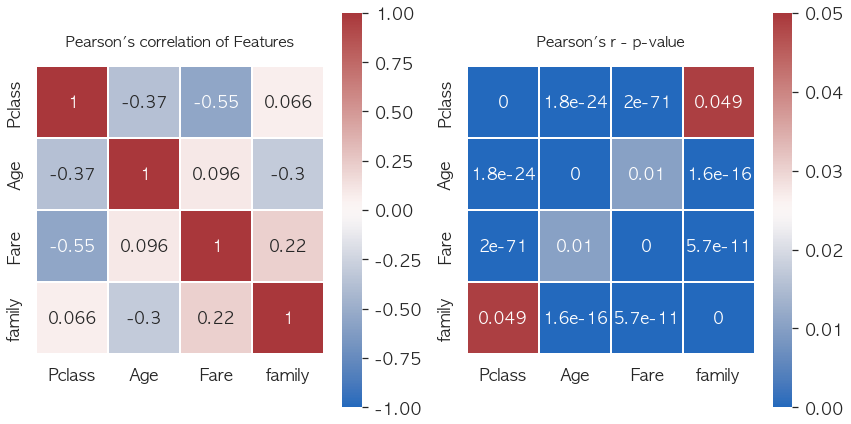

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
g1= sns.heatmap(targ_data.corr(method ='pearson'),
                linewidths=0.1, vmax=1.0, vmin=-1.0,
           square=True, cmap= "vlag", linecolor='white', annot=True, annot_kws={"size": 16},
               ax = ax[0])
ax[0].set_title("Pearson's correlation of Features", y=1.05, size=15)
g2= sns.heatmap(p_val,
                linewidths=0.1, vmax=0.05, vmin=0,
           square=True, cmap= "vlag", linecolor='white', annot=True, annot_kws={"size": 16},
               ax = ax[1])
ax[1].set_title("Pearson's r - p-value", y=1.05, size=15)

plt.tight_layout()
plt.show()

* Pclass와 Fare, Pclass와 Age 간의 관계가 두드러진다.

In [73]:
df_train[['Survived','Pclass','nSex','nCabin','nEmb','Age','Fare','family']].corr(method="spearman")

Survived    Pclass      nSex    nCabin      nEmb       Age  \
Survived  1.000000 -0.339668  0.543351 -0.316912 -0.162313 -0.052565   
Pclass   -0.339668  1.000000 -0.135775  0.683291  0.094100 -0.361666   
nSex      0.543351 -0.135775  1.000000 -0.140391 -0.117551 -0.083330   
nCabin   -0.316912  0.683291 -0.140391  1.000000  0.133980 -0.247209   
nEmb     -0.162313  0.094100 -0.117551  0.133980  1.000000 -0.014326   
Age      -0.052565 -0.361666 -0.083330 -0.247209 -0.014326  1.000000   
Fare      0.323736 -0.688032  0.259593 -0.539300 -0.076794  0.135051   
family    0.165463 -0.075698  0.292035 -0.109296 -0.005835 -0.228168   

              Fare    family  
Survived  0.323736  0.165463  
Pclass   -0.688032 -0.075698  
nSex      0.259593  0.292035  
nCabin   -0.539300 -0.109296  
nEmb     -0.076794 -0.005835  
Age       0.135051 -0.228168  
Fare      1.000000  0.528907  
family    0.528907  1.000000

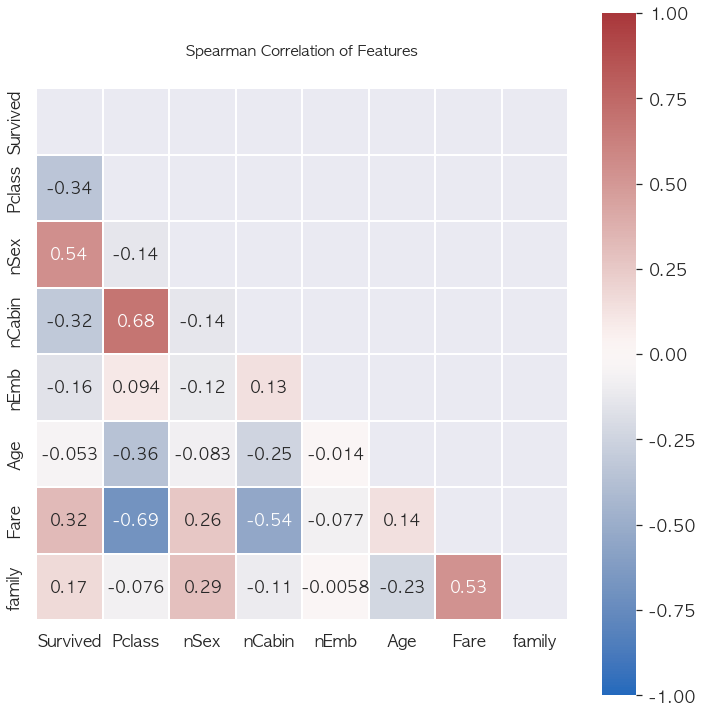

In [74]:
mask = np.zeros_like(df_train[['Survived','Pclass','nSex','nCabin','nEmb','Age','Fare','family']].corr(method="spearman"))
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.title("Spearman Correlation of Features", y=1.05, size=15)
g1= sns.heatmap(df_train[['Survived','Pclass','nSex','nCabin','nEmb','Age','Fare','family']].corr(method="spearman"),
                linewidths=0.1, vmax=1.0, vmin=-1.0, mask=mask,
                square=True, cmap= "vlag", linecolor='white', 
                annot=True, annot_kws={"size": 16},
               ax = ax)
plt.tight_layout()
plt.show()

## Data Preprocessing

* 본격적인 Feature Engineering, Modeling에 앞서 데이터를 분석하기에 적합한 형태로 전처리해야한다.

<br>

* 아래의 과정을 거친다.
    1. 결측치(NaN) 확인 -> 제거하거나 대치
    2. 이상치(Outlier) 확인 -> 제거하거나 대치

<br>

* Reference
    * https://brunch.co.kr/@hansungdev/10
    * https://homeproject.tistory.com/3


### 결측치 처리

* 앞선 분석에서 Age, Cabin, Embarked, Fare Feature에 결측치가 있는 것을 확인하였다. 이 중 Cabin은 객실 번호가 남아있는 경우와 남아있지 않는 경우로 분류하여 대체하였다.
* 나머지 Feature 들은 각 Feature의 속성을 고려하여 적절한 값으로 결측치를 대체한다. 

In [75]:
print(df_train_raw.isnull().sum())
print('-'*30)
print(df_test_raw.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
nSex             0
nCabin           0
nEmb             0
family           0
dtype: int64


#### Age

* Age 에는 177개의 결측치가 있다. 이를 채우기 위해 단순 중심 경향치를 활용할 수 있지만 여기서는 승객들의 이름 정보를 활용하여 Age를 추정하기로 한다.
* 탑승객의 이름에는 Mrs, Mr, Miss 등의 Title이 포함된다. 이 정보를 활용하기 위해 정규표현식을 이용한다. 정규표현식에 대해서는 아래 링크를 참조한다.
    * https://moondol-ai.tistory.com/251
    * https://wikidocs.net/4308

In [76]:
df_train_raw.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

* "Braund, Mr. Owen Harris" 과 같은 형태에서 M(대문자)r(소문자).(dot)으로 구성된 부분을 표현하기 위해 "([A-Za-z]+)\." 라는 정규표현식을 사용한다.

In [77]:
df_train_raw['Initial']= df_train_raw.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test_raw['Initial']= df_test_raw.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [78]:
df_train_raw['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Initial, dtype: int64

* Title은 성별 정보 또한 가지고 있다. 보다 정확한 Age 추정을 위해 Title에 따른 성별을 확인한다.

In [79]:
pd.crosstab(df_train_raw['Initial'], df_train_raw['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

In [80]:
pd.crosstab(df_test_raw['Initial'], df_test_raw['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

* Capt, Col, Don, Dr, Jokheer, Major, Master, Rev, Sir, Countess, Lady, Mlle, Mme, Ms, Dona과 같이 빈도수가 적은 Title은 Title에 따른 성별정보를 활용하여 Master, Mr, Mrs, Miss, Other와 같이 바꾸어준다. 

In [81]:
df_train_raw['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test_raw['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [82]:
df_train_raw['Initial'].value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

* 각 Initial 별로 median 연령을 확인해보자

In [83]:
df_train['Initial'] = deepcopy(df_train_raw['Initial'])

In [269]:
df_train.groupby('Initial').Age.median()

Initial
Master     4.0
Miss      22.0
Mr        33.0
Mrs       36.0
Other     51.0
Name: Age, dtype: float64

* Initial 별 연령 정보의 median를 활용하여 Age의 결측치를 대치해준다. 이때 Train Set에서 획득된 정보만 활용하는 것에 유의한다. 

In [85]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 4
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 51

df_test_raw.loc[(df_test_raw.Age.isnull())&(df_test_raw.Initial=='Mr'),'Age'] = 33
df_test_raw.loc[(df_test_raw.Age.isnull())&(df_test_raw.Initial=='Mrs'),'Age'] = 36
df_test_raw.loc[(df_test_raw.Age.isnull())&(df_test_raw.Initial=='Master'),'Age'] = 4
df_test_raw.loc[(df_test_raw.Age.isnull())&(df_test_raw.Initial=='Miss'),'Age'] = 22
df_test_raw.loc[(df_test_raw.Age.isnull())&(df_test_raw.Initial=='Other'),'Age'] = 51

In [86]:
tmp_ds = deepcopy(df_train['Age'])
pd.DataFrame({'Count_val':tmp_ds.count(),
              'Count_Nan':tmp_ds.isnull().sum(),
              'Mean':tmp_ds.mean(),
              'Median':tmp_ds.median(),
              'Mode':tmp_ds.mode(),
              'Std':tmp_ds.std(),
              'Var':tmp_ds.var(),
              'Min':tmp_ds.min(),
              '25% Q':tmp_ds.quantile(q=0.25, interpolation='linear'),
              '50% Q':tmp_ds.quantile(q=0.5, interpolation='linear'),
              '75% Q':tmp_ds.quantile(q=0.75, interpolation='linear'),
              'Max':tmp_ds.max(),
              'Skewness':tmp_ds.skew(),
              'Kurtosis':tmp_ds.kurt(),
             })

Count_val  Count_Nan       Mean  Median  Mode        Std         Var   Min  \
0        891          0  29.841942    30.0  33.0  13.281525  176.398893  0.42   

   25% Q  50% Q  75% Q   Max  Skewness  Kurtosis  
0   22.0   30.0   36.0  80.0  0.342547  0.686672

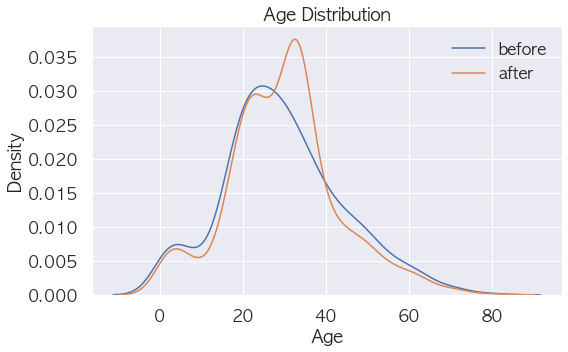

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
g1=sns.kdeplot(df_train_raw['Age'], ax=ax)
g1=sns.kdeplot(df_train['Age'], ax=ax)
g1.legend(['before', 'after'], bbox_to_anchor=(1.0, 1.0))
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

* Age 결측치 처리를 위해 생성한 Inital 정보도 모델링에 유용할 수 있다. 차후 사용하기 위해 수치로 변환한다.

In [88]:
df_train['nInit'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test_raw['nInit'] = df_test_raw['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

#### Embarked, Fare

* Train, Test Set에서 Embarked와 Fare의 결측치는 아래와 같다.

In [89]:
print(df_train_raw[['Embarked','Fare']].isnull().sum())
print('-'*50)
print(df_test_raw[['Embarked','Fare']].isnull().sum())

Embarked    2
Fare        0
dtype: int64
--------------------------------------------------
Embarked    0
Fare        1
dtype: int64


* Embarked는 범주형 변수로 탑승 항구를 의미한다. Embarked 결측치는 해당 Feature에서 통계요약치(최빈치)를 활용하거나 해당 Feature과 관련성이 깊었던 다른 요인을 찾아서 그 요인에서의 빈도를 활용할 수 있다

In [90]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

* 통계 요약치 상으로는 S를 넣을 수 있다.

In [91]:
pd.crosstab(df_train['Embarked'], df_train['Pclass'], normalize=True)

Pclass           1         2         3
Embarked                              
C         0.095613  0.019123  0.074241
Q         0.002250  0.003375  0.080990
S         0.142857  0.184477  0.397075

In [92]:
df_train.loc[df_train.Embarked.isnull(),'Pclass']

61     1
829    1
Name: Pclass, dtype: int64

* Embarked와 Pclass의 관계를 보면, Pclass가 1인 경우에는 S가 가장 많았다. 두 방법이 동일한 결과로 수렴하므로 Embarked 결측치에는 S를 넣는다. 

In [93]:
df_train.loc[df_train.Embarked.isnull(),'Embarked'] = 'S'
# df_train['Embarked'].fillna('S', inplace=True)
df_train['nEmb'] = df_train['Embarked'].replace(['C','Q','S'], [1,2,3])


* Fare는 연속형 변수이다. 중심 경향치를 활용하되, 다른 범주형 변수와의 관계를 고려하여 중심 경향치를 넣는 것이 적절해보인다

In [94]:
df_test_raw.loc[df_test_raw.Fare.isnull(),['Pclass','nSex','nEmb','nCabin']]

Pclass  nSex  nEmb  nCabin
152       3     1     3       2

* Pclass가 3, Sex는 1, nEmb는 3, nCabin은 2인 범주에서의 Fare 요약치를 활용한다. 이때, Train Set을 활용하는 것에 유의한다. 

In [95]:
(df_train
 .filter(['Pclass','nSex','nEmb','nCabin','Fare'])
 .query('Pclass == 3 & nSex == 1 & nEmb == 3 & nCabin == 2')
 .Fare.mean())

13.39584423076923

* Train Set 상에서 Pclass가 3, Sex는 1, nEmb는 3, nCabin은 2인 범주에서의 Fare 요약치는 13.3958이다.
* Test Set Fare의 결측치에 해당 값을 넣는다. 

In [96]:
df_test_raw.loc[df_test_raw.Fare.isnull(),'Fare'] = 13

### 이상치 처리

 * 연속형 변수 Age, Fare, Family 에서 이상치를 재확인하고 분석 맥락과 데이터 특성을 고려하여 제거해야하는 이상치는 제거한다.
 * 먼저 Box Plot과 Histogram으로 이상치를 재확인한다.

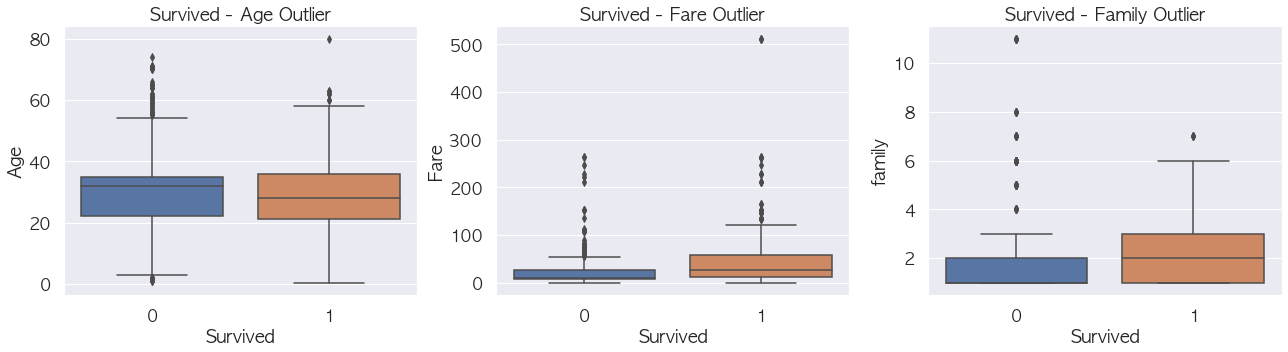

In [97]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
g1=sns.boxplot(x="Survived", y="Age",
                    data=df_train, ax=ax[0])
ax[0].set_title('Survived - Age Outlier')
g2=sns.boxplot(x="Survived", y="Fare",
                    data=df_train, ax=ax[1])
ax[1].set_title('Survived - Fare Outlier')
g3=sns.boxplot(x="Survived", y="family",
                    data=df_train, ax=ax[2])
ax[2].set_title('Survived - Family Outlier')
plt.tight_layout()
plt.show()

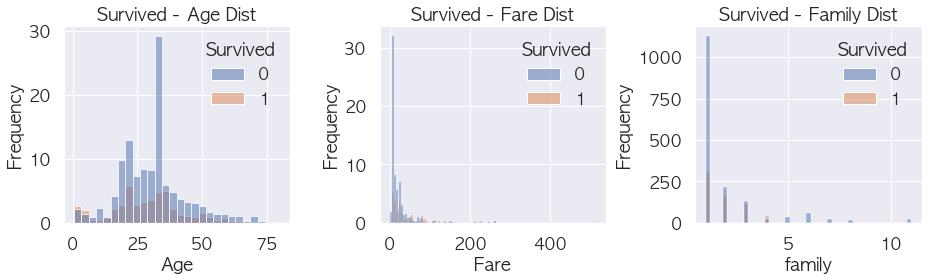

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
sns.histplot(df_train, x="Age", hue="Survived", stat="frequency", ax=axes[0])
axes[0].set_title('Survived - Age Dist')
sns.histplot(df_train, x="Fare", hue="Survived", stat="frequency", ax=axes[1])
axes[1].set_title('Survived - Fare Dist')
sns.histplot(df_train, x="family", hue="Survived", stat="frequency", ax=axes[2])
axes[2].set_title('Survived - Family Dist')
plt.tight_layout()
plt.show()

In [99]:
tmp_ds = deepcopy(df_train['Age'])
tmp_df1 = pd.DataFrame({'Count_val':tmp_ds.count(),
              'Count_Nan':tmp_ds.isnull().sum(),
              'Mean':tmp_ds.mean(),
              'Median':tmp_ds.median(),
              'Mode':tmp_ds.mode(),
              'Std':tmp_ds.std(),
              'Var':tmp_ds.var(),
              'Min':tmp_ds.min(),
              '25% Q':tmp_ds.quantile(q=0.25, interpolation='linear'),
              '50% Q':tmp_ds.quantile(q=0.5, interpolation='linear'),
              '75% Q':tmp_ds.quantile(q=0.75, interpolation='linear'),
              'Max':tmp_ds.max(),
              'Skewness':tmp_ds.skew(),
              'Kurtosis':tmp_ds.kurt(),
             }).T
tmp_ds = deepcopy(df_train['Fare'])
tmp_df2 = pd.DataFrame({'Count_val':tmp_ds.count(),
              'Count_Nan':tmp_ds.isnull().sum(),
              'Mean':tmp_ds.mean(),
              'Median':tmp_ds.median(),
              'Mode':tmp_ds.mode(),
              'Std':tmp_ds.std(),
              'Var':tmp_ds.var(),
              'Min':tmp_ds.min(),
              '25% Q':tmp_ds.quantile(q=0.25, interpolation='linear'),
              '50% Q':tmp_ds.quantile(q=0.5, interpolation='linear'),
              '75% Q':tmp_ds.quantile(q=0.75, interpolation='linear'),
              'Max':tmp_ds.max(),
              'Skewness':tmp_ds.skew(),
              'Kurtosis':tmp_ds.kurt(),
             }).T

tmp_ds = deepcopy(df_train['family'])
tmp_df3 = pd.DataFrame({'Count_val':tmp_ds.count(),
              'Count_Nan':tmp_ds.isnull().sum(),
              'Mean':tmp_ds.mean(),
              'Median':tmp_ds.median(),
              'Mode':tmp_ds.mode(),
              'Std':tmp_ds.std(),
              'Var':tmp_ds.var(),
              'Min':tmp_ds.min(),
              '25% Q':tmp_ds.quantile(q=0.25, interpolation='linear'),
              '50% Q':tmp_ds.quantile(q=0.5, interpolation='linear'),
              '75% Q':tmp_ds.quantile(q=0.75, interpolation='linear'),
              'Max':tmp_ds.max(),
              'Skewness':tmp_ds.skew(),
              'Kurtosis':tmp_ds.kurt(),
             }).T

tmp_df = pd.concat([tmp_df1, tmp_df2, tmp_df3], axis = 1)
tmp_df.columns = ['Age','Fare','family']
tmp_df

Age         Fare      family
Count_val  891.000000   891.000000  891.000000
Count_Nan    0.000000     0.000000    0.000000
Mean        29.841942    32.204208    1.904602
Median      30.000000    14.454200    1.000000
Mode        33.000000     8.050000    1.000000
Std         13.281525    49.693429    1.613459
Var        176.398893  2469.436846    2.603248
Min          0.420000     0.000000    1.000000
25% Q       22.000000     7.910400    1.000000
50% Q       30.000000    14.454200    1.000000
75% Q       36.000000    31.000000    2.000000
Max         80.000000   512.329200   11.000000
Skewness     0.342547     4.787317    2.727441
Kurtosis     0.686672    33.398141    9.159666

* Skewness(왜도) 는 분포가 치우쳐있는 정도로 0은 중앙, 양수는 좌측으로, 음수는 우측으로 치우쳐저 있는 것을 나타내며, Kurtosis(첨도)는 분포가 뾰족한 정도로, 1은 정규본포, 양수일수록 더 뾰족하고 음수일수록 더 완만한 것을 나타낸다. Kline(2005)은 Skewness가 절대값 3을 초과하지 않고, Kurtosis는 절대값 8또는 10을 초과하지 않으면 정규분포로 볼 수 있다고 제시하였다.

<br>

* Age 변수는 분포의 형태가 비교적 정규분포의 형태를 띄고 있으며, Skewness = 0.34, Kurtosis = 0.69 로 정규성을 띄는 것으로 가정하 수 있다. 
* Fare 변수는 Skewness와 분포를 고려하면 좌측으로 편포되어있는 형태를 가지고 있다. 

<br>

* 이상치를 제거하는 방법은 평균으로부터 -+2~3SD를 제거하는 방법이나, IQR(Q3-Q1)*1.5를 기준으로 자르는 Quantile 방법 등이 있을 수 있다. 또는 Continuous 변수를 범주화하여 ordinal 척도로 바꾸는 방법도 적절할 수 있다. 
* 분포의 형태를 고려할 떄, 단순히 평균에서 +-2~3SD를 자르는 기법이나 Quantile을 기준으로 자르는 기법을 사용하면 과도하게 많은 값이 제거될 위험이 있다. 일단 기존 방법을 활용하면 어떤 결과가 나타나는지 살펴보자.

In [100]:
def outlier_value(df):
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = pd.DataFrame(Q1-(IQR*1.5), columns=['q_lower'])
    Q_upper = pd.DataFrame(Q3+(IQR*1.5), columns=['q_upper'])

    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = pd.DataFrame(Mean-std*3, columns=['n_lower'])
    N_upper = pd.DataFrame(Mean+std*3, columns=['n_upper'])
    
    results = pd.concat([Q_lower,Q_upper,N_lower,N_upper], axis = 1)
    return results


def outlier_counts(df):
    tmp_df = deepcopy(df)
    
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = Q1-(IQR*1.5)
    Q_upper = Q3+(IQR*1.5)
    
    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = Mean-std*3
    N_upper = Mean+std*3
    
    Q_out = ((tmp_df<Q_lower) | (tmp_df>Q_upper)).sum()
    N_out = ((tmp_df<N_lower) | (tmp_df>N_upper)).sum()
    
    results = pd.concat([Q_out, N_out],axis=1)
    results.columns = ['IQR*1.5', '+-2SD']
    return results

def outlier_mask(df):
    tmp_df = deepcopy(df)
    
    # Boxplot Method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Q_lower = Q1-(IQR*1.5)
    Q_upper = Q3+(IQR*1.5)
    
    # Normal Distribution Method
    Mean = df.mean()
    std = df.std()
    N_lower = Mean-std*3
    N_upper = Mean+std*3
    
    Q_out = ((tmp_df<Q_lower) | (tmp_df>Q_upper))
    N_out = ((tmp_df<N_lower) | (tmp_df>N_upper))
    
    return Q_out, N_out

In [101]:
targ_df = deepcopy(df_train[['Age','Fare','family']])

In [102]:
outlier_value(targ_df)

q_lower  q_upper     n_lower     n_upper
Age       1.000  57.0000  -10.002632   69.686515
Fare    -26.724  65.6344 -116.876078  181.284494
family   -0.500   3.5000   -2.935774    6.744977

In [103]:
outlier_counts(targ_df)

IQR*1.5  +-2SD
Age          40      7
Fare        116     20
family       91     25

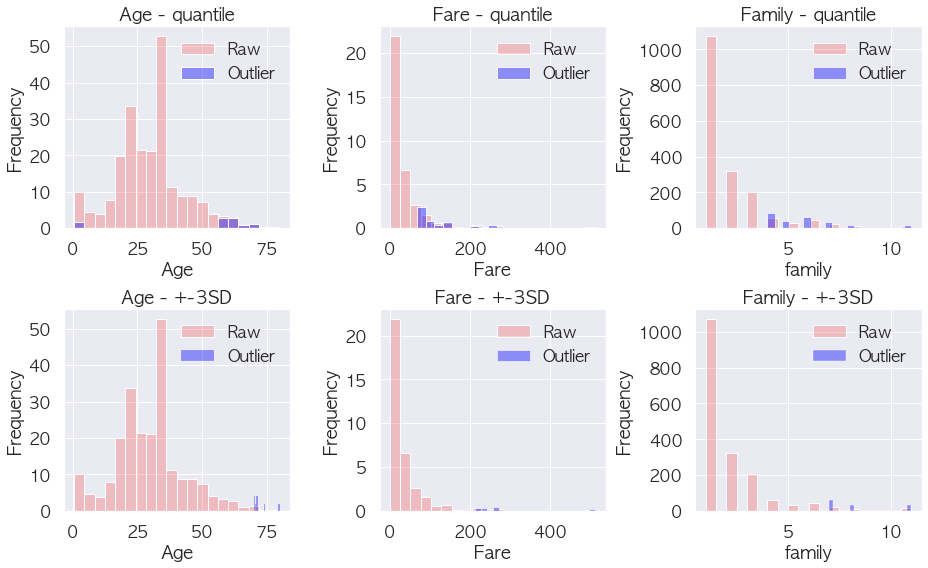

In [104]:
q_mask, n_mask = outlier_mask(targ_df)
fig, axes = plt.subplots(2, 3, figsize=(13, 8))
g1=sns.histplot(df_train, x="Age", stat="frequency", ax=axes[0,0], color='red', alpha=0.2, bins=20)
g1=sns.histplot(targ_df[q_mask], x="Age", stat="frequency", ax=axes[0,0], color='blue', alpha=0.4, bins=20)
g1.legend(['Raw', 'Outlier'])
g1.set_title('Age - quantile')
g2=sns.histplot(df_train, x="Fare", stat="frequency", ax=axes[0,1], color='red', alpha=0.2, bins=20)
g2=sns.histplot(targ_df[q_mask], x="Fare", stat="frequency", ax=axes[0,1], color='blue', alpha=0.4, bins=20)
g2.legend(['Raw', 'Outlier'])
g2.set_title('Fare - quantile')
g3=sns.histplot(df_train, x="family", stat="frequency", ax=axes[0,2], color='red', alpha=0.2, bins=20)
g3=sns.histplot(targ_df[q_mask], x="family", stat="frequency", ax=axes[0,2], color='blue', alpha=0.4, bins=20)
g3.legend(['Raw', 'Outlier'])
g3.set_title('Family - quantile')
g4=sns.histplot(df_train, x="Age", stat="frequency", ax=axes[1,0], color='red', alpha=0.2, bins=20)
g4=sns.histplot(targ_df[n_mask], x="Age", stat="frequency", ax=axes[1,0], color='blue', alpha=0.4, bins=20)
g4.legend(['Raw', 'Outlier'])
g4.set_title('Age - +-3SD')
g5=sns.histplot(df_train, x="Fare", stat="frequency", ax=axes[1,1], color='red', alpha=0.2, bins=20)
g5=sns.histplot(targ_df[n_mask], x="Fare", stat="frequency", ax=axes[1,1], color='blue', alpha=0.4, bins=20)
g5.legend(['Raw', 'Outlier'])
g5.set_title('Fare - +-3SD')
g6=sns.histplot(df_train, x="family", stat="frequency", ax=axes[1,2], color='red', alpha=0.2, bins=20)
g6=sns.histplot(targ_df[n_mask], x="family", stat="frequency", ax=axes[1,2], color='blue', alpha=0.4, bins=20)
g6.legend(['Raw', 'Outlier'])
g6.set_title('Family - +-3SD')
plt.tight_layout()
plt.show()

* Quantile 방법은 과도하게 많은 값을 제거할 위험성이 있다. 이상치를 제거해야한다면 3SD 방법 사용이 적절해보인다. 


#### Age

* 연습을 위해 Age는 Outlier를 제거하지 않고, 범주형 연속변수로 변환한다. 

In [105]:
def change_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7        

In [106]:
df_train['nAge'] = df_train['Age'].apply(change_age)
df_test_raw['nAge'] = df_test_raw['Age'].apply(change_age)

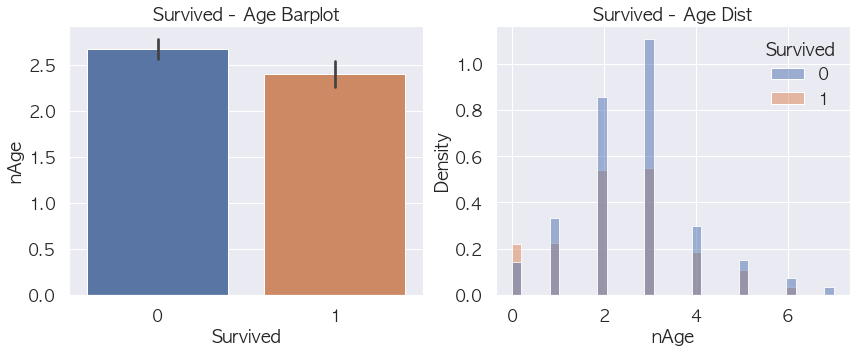

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
g1=sns.barplot(x="Survived", y="nAge",
                    data=df_train, ax=ax[0])
ax[0].set_title('Survived - Age Barplot')

g2=sns.histplot(df_train, x="nAge", hue="Survived", stat="density", ax=ax[1])
ax[1].set_title('Survived - Age Dist')
plt.tight_layout()
plt.show()

#### Fare, Family

* Fare 와 Family에서는 Outlier를 제거한다.

In [108]:
temp_df = deepcopy(df_train)

In [109]:
#df_train = deepcopy(temp_df)

In [110]:
drop_idx = df_train[(n_mask['family']) | (n_mask['Fare'])].index
df_train.drop(drop_idx, inplace=True)

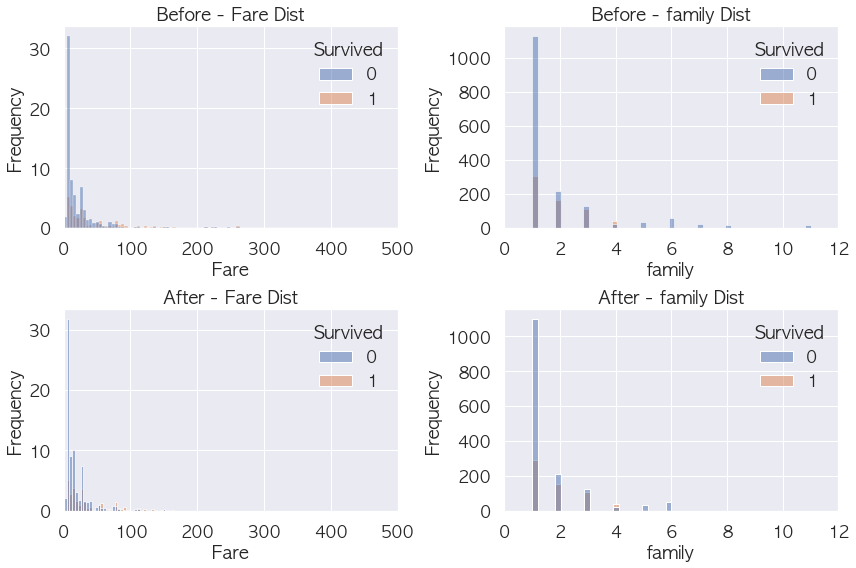

In [111]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

g1=sns.histplot(temp_df, x="Fare", hue="Survived", stat="frequency", ax=ax[0,0])
g1.set(xlim=(0, 500))
g1.set_title('Before - Fare Dist')

g2=sns.histplot(temp_df, x="family", hue="Survived", stat="frequency", ax=ax[0,1])
g2.set(xlim=(0, 12))
g2.set_title('Before - family Dist')

g3=sns.histplot(df_train, x="Fare", hue="Survived", stat="frequency", ax=ax[1,0])
g3.set(xlim=(0, 500))
g3.set_title('After - Fare Dist')

g4=sns.histplot(df_train, x="family", hue="Survived", stat="frequency", ax=ax[1,1])
g4.set(xlim=(0, 12))
g4.set_title('After - family Dist')

plt.tight_layout()
plt.show()

* 이러한 절차를 통해 총 891개 중 45개의 데이터가 제거되어 846개의 데이터가 남았다. 

* 전통적 통계 분석을 위한 데이터를 남겨둔다.

In [112]:
df_stat = deepcopy(df_train)

## Feature Engineering

* Feature Engineering : 도메인 지식을 사용하여 데이터에서 피쳐를 변형/생성

    <br>

    * Feature Scaling (Standardization, Normalization, Transformation, etc...) [[Ref]](https://www.analyticsvidhya.com/blog/2021/05/feature-scaling-techniques-in-python-a-complete-guide/)
    * Encoding (label encoding, one-hot encoding, mean encoding) [[Ref]](https://dailyheumsi.tistory.com/120)
    
    <br>
    
---    
    
<br>
  
* Feature Extraction : 기존 Feature 들에서 dimension reduction 등의 방법으로 새로운 중요 Feature들을 추출 [[Ref]](https://towardsdatascience.com/feature-extraction-techniques-d619b56e31be)

    <br>

    * Principle Components Analysis (PCA)
    * Independent Component Analysis (ICA)
    * Linear Discriminant Analysis (LDA)
    * Locally Linear Embedding (LLE)
    * t-distributed Stochastic Neighbor Embedding (t-SNE)
    * Autoencoders
    
    <br>
    
    ---
    
<br>    
    
* Feature Selection : 기존 Feature 에서 모델링에 유용한 Feature 들을 선택 [[Ref]](https://wooono.tistory.com/249)

    <br>
    
    * Filter Method : Feature 간 관계, Feature와 Target 간 관계를 통계적 기법을 확인하여 중요한 Feature 들만 선정
        - Correlation Coefficient, Regression, Chi square, ANOVA, Variance Threshold 등..
        
        <br>
        
    * Wrapper Method : Modeling을 활용하여 Feature 들의 Subset을 점진적으로 Test, 최종적으로 유용한 Feature 들만 선정
        - Forward Selection(전진 선택): 변수가 없는 상태로 시작하며, 반복할 때마다 가장 중요한 변수를 추가하여 더 이상 성능의 향상이 없을 때까지 변수를 추가한다.
        - Backward Elimination(후방 제거): 모든 변수를 가지고 시작하며, 가장 덜 중요한 변수를 하나씩 제거하면서 모델의 성능을 향상시킨다. 더 이상 성능의 향상이 없을 때까지 반복한다.
        - Stepwise Selection(단계별 선택): Foward Selection 과 Backward Elimination 을 결합하여 사용하는 방식으로, 모든 변수를 가지고 시작하여 가장 도움이 되지 않는 변수를 삭제하거나, 모델에서 빠져있는 변수 중에서 가장 중요한 변수를 추가하는 방법이다. 이와 같이 변수를 추가 또는 삭제를 반복한다.
        
        <br>
        
    * Embedded Method : Filtering과 Wrapper의 장점을 결합, 전체 Feature로 Model Fitting 시작, Training 과정에서 유용한 Feature들을 선택 (즉, 모델의 내장 metric을 사용)
        - Ridge: L1-norm으로 제약을 주는 방법
        - Lasso: L2-norm으로 제약을 주는 방법
        - Elastic Net: Ridge와 Lasso를 결합, 반반무많이
        - SelectFromModel: 모델에서 추출, e.g, RandomForest와 같은 Decision Tree 기반 알고리즘 사용
        
<br>

### Feature Scaling & Encoding

* 현재까지 Survived, Pclass, Age, Fare, nSex, nCabin, nEmb, family, nAge, nInit 의 변수들이 모델링을 위해 준비되었다.
* 이 변수들 중 Continuous인 Age, Fare, family의 경우, 서로 다른 단위(unit), 범위(range)의 척도를 가지고 있다. 이를 그대로 모델에 투여할 경우 변수들의 중요도나 변수들 간의 관계가 왜곡되어 머신러닝 알고리듬이 잘 작동하지 않을 수 있다. 따라서 위 연속형 변수의 척도를 조정한다. 

<br>

---

<br>

* 많이 사용되는 Scaling 방법은 아래와 같다. (방법을 다루는 용어들이 서로 혼용되는 경우가 많은 것 같다. 개념적으로 이해하자)

    1. StandardScaler, z-scoring, Standardization, 표준화
        - 한 Feature, 변수 내 값들을 평균이 0, 표준편차가 1인 표준 점수(z-score, Standard score)로 변환한다. 
        - 개별 Feature에 적용되기 때문에 보통 데이터 프레임의 Column에서 작동한다.
        - 이상치에 민감할 수 있다. 
        - 회귀보다 분류 모델에 유용하다고 한다.
        
        <br>
        
    2. RobustScaler
        - StandardScaler 방법과 유사하나 평균과 표준편차 대신 median과 quantile(0.25와 0.75)을 사용하여 변환한다.
        - 개별 Feature에 적용되기 때문에 보통 데이터 프레임의 Column에서 작동한다.
        - 이상치에 강건(robust)하다.
        
        <br>
        
    3. MinMaxScaler, min-max normalization
        - 한 Feature, 변수 내 값들을 특정 범위(주로 [0,1])의 범위로 변환한다.
        - 가장 작은 값(min)은 0, 가장 큰 값(max)은 1로 변환하므로, 모든 feature들이 0~1 사이의 범위를 가지게 된다.
        - 개별 Feature에 적용되기 때문에 보통 데이터 프레임의 Column에서 작동한다.
        - 이상치에 매우 민감하다.
        - 분류보다 회귀 모델에 유용하다고 한다.
        
        <br>

    4. MaxAbsScaler
        - 한 Feature, 변수 내 값들을 절대값이 0~1 사이가 되도록 변환한다. 모든 값은 -1과 1사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler과 같다. 
        
        <br>
        
    5. Normalizer
        - 각 Sample, Observation, Case 보통 row에 적용되는 방식으로, 한 row의 모든 특성들 사이에 euclidean distance 가 1이 되도록 변환한다.
        - Normalizer를 수행하면 한 sample의 데이터들이 Spherical Contour(구형 윤곽)을 가지게 된다고 한다. 이렇게 하면 좀더 빠르게 학습할 수 있고 과대적합의 확률을 낮출수 있다고 하지만, Feature들 간의 단위가 다른 경우 데이터의 특성이 왜곡될 위험성이 있다.
        
        <br>
        
    6. log, square root (sqrt) 등 변수 변환
        - 대부분 모수 통계 기법이나 머신러닝, 딥러닝 기법은 데이터의 정규성을 가정한다. 
        - 연속형 데이터가 정규분포가 아닌 경우, 정규 분포로 변환을 하기 위해 Standardization 또는 Log, Sqrt 변환을 수행할 수 있다.
        - 데이터의 형태를 정규화할 수 있지만, 원본 데이터에서 의미가 변환되므로 해석이 어려워질 수 있다. 
    
     
<br>

---

<br>

* Scaling시 유의할 점

    1. Scaling은 Test set이 포함된 전체 데이터 말고 Train Set에만 fit이 되어야 한다. 이후 Train, Test 각각에 scaling을 적용하여 값을 변환한다. 현실에서 Test Set은 아직 관측되지 않은 데이터이므로 Test Set을 사용하지 않는다.

    <br>
    
    2. 분류 또는 예측의 대상이되는 Target, y, label, class 값은 Scaling 하지 않는다. 
    
    <br>
    
    3. 대부분의 Scaling 기법들이 이상치에 민감한 특성을 가진다. 이상치가 있는지 여부를 꼼꼼히 확인하고, 적합한 Scaling을 쓰거나 이상치를 제거/대체해주어야 한다. 
    
    <br>
    
    4. 머신 러닝, 딥 러닝 맥락에서는 Scaling 으로 범위를 유사하게 만드는 것이 특히 중요하다. 하지만 그렇다고 반드시 같은 분포로 만들 필요는 없다. (전통적 모수 통계시에는 중요할 수 있다. 
    
    <br>
    
    5. Feature들 마다 다른 Scaling을 사용하는 것이 유리할 때도 있다. 하지만 모델링 시에 Feature 간 값의 범위과 과도하게 다르지 않도록 유의한다.
    

#### Check Categorical Feature

* 정리되어 있는 데이터들의 분포들 살펴보자
* 먼저 Categorical Feature를 보고 변환한다.

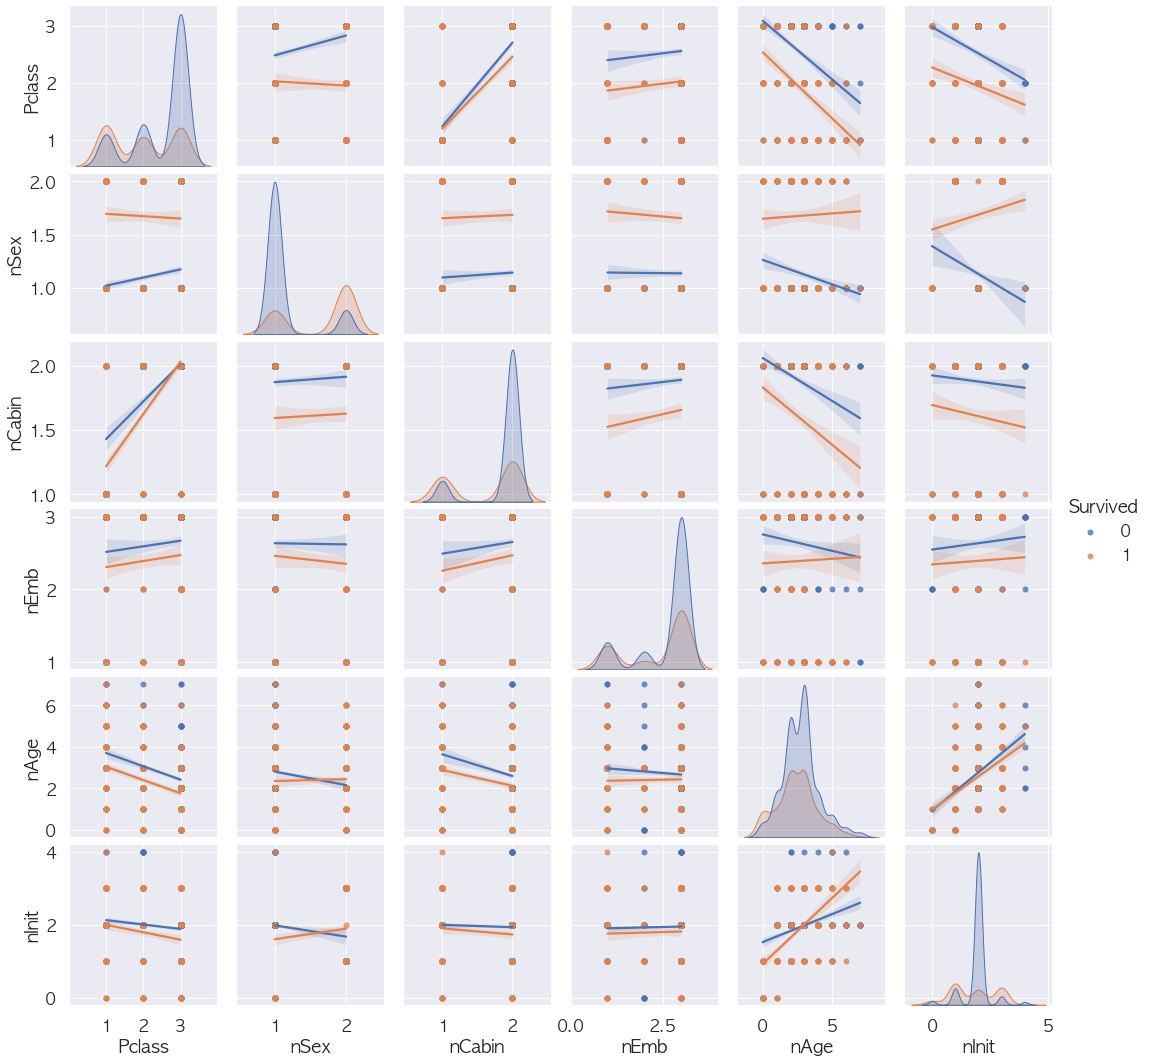

In [113]:
g1 = sns.pairplot(data=df_train[['Survived', 'Pclass',  'nSex', 'nCabin', 'nEmb', 'nAge', 'nInit']], 
             kind = 'reg',
             hue = 'Survived')
plt.show()

* Categorical Feature들은 범위가 0~10사이에 분포되는 모습을 보인다. 
* 이 중 ordinal 특성 feature들(Pclass, nAge)은 값 간의 간격을 유지하면서 범위를 일치시키기 위해서는 min-max scaler를 사용하는 것이 적절할 수 있다. 또는, Scaling 이 이루어질 Continuous feature들의 전반적 범위를 고려하여 Standard Scaler를 사용한다.
* nominal 특성의 feature들(nSex, nCabin, nEbm, nInit)은 Feature Engineering 단계에서 one-hot encoding 으로 변환한다. 

#### Check Continuous Feature

* Continuous Feature들의 분포를 보고 변환한다.

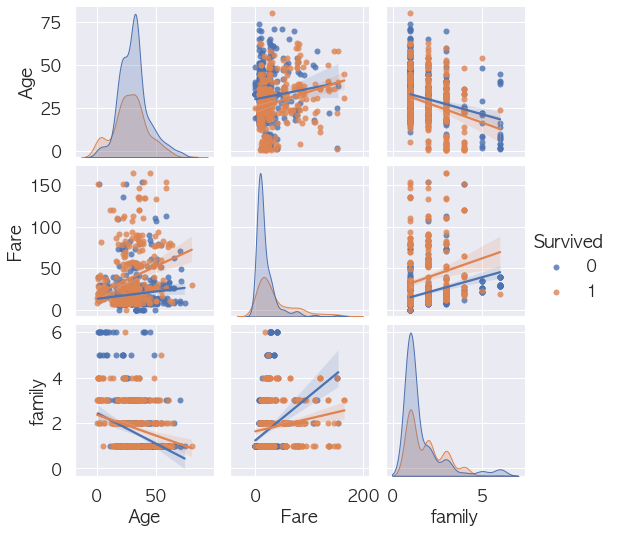

In [114]:
g1 = sns.pairplot(data=df_train[['Survived','Age', 'Fare', 'family']], 
             kind = 'reg',
             hue = 'Survived')
plt.show()

* Continuous Feature들은 범위가 매우 다양하다. 
* Age는 비교적 정규분포의 형태를 가지지만 Fare와 Family는 편포된 형태를 가진다. 
* 이 데이터에 대해서는 standard scaler, log transform을 적용한후 데이터를 살펴본다.

In [115]:
label = deepcopy(df_train[['Survived']])
tmp_df_raw = deepcopy(df_train[['Age', 'Fare', 'family']])
tmp_df = deepcopy(df_train[['Age', 'Fare', 'family']])

In [116]:
# standard scaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
tmp_df_fitted = std_scaler.fit(tmp_df)

tmp_df_z = std_scaler.transform(tmp_df)
tmp_df_z = pd.DataFrame(tmp_df_z, columns=['zAge','zFare','zFamily'], index=list(tmp_df_raw.index.values))

# robust scaler
from sklearn.preprocessing import RobustScaler
rbs_scaler = RobustScaler()
tmp_df_fitted = rbs_scaler.fit(tmp_df)

tmp_df_r = rbs_scaler.transform(tmp_df)
tmp_df_r = pd.DataFrame(tmp_df_r, columns=['rAge','rFare','rFamily'], index=list(tmp_df_raw.index.values))

# log transformation
tmp_df_log = pd.DataFrame(np.array(np.log1p(tmp_df)), 
                          columns=['logAge','logFare','logFamily'], 
                          index=list(tmp_df_raw.index.values))


In [117]:
df_after = pd.concat([label,tmp_df_z,tmp_df_r,tmp_df_log], axis=1)
df_after.describe()
tmp_ds = deepcopy(df_after)

tmp_summary=pd.concat([df_after.mean(), df_after.std(), df_after.median(), df_after.skew(), df_after.kurt()], axis = 1)
tmp_summary.columns=['mean','std','median','skew','kurt']
tmp_summary

mean       std    median      skew      kurt
Survived   3.829787e-01  0.486401  0.000000  0.482313 -1.771568
zAge       3.359540e-17  1.000592  0.044843  0.366566  0.769760
zFare     -8.398850e-17  1.000592 -0.441229  2.320140  5.558887
zFamily   -2.309684e-17  1.000592 -0.615313  1.924907  3.646886
rAge      -4.207447e-02  0.938825  0.000000  0.366566  0.769760
rFare      6.493393e-01  1.472530  0.000000  2.320140  5.558887
rFamily    6.926714e-01  1.126388  0.000000  1.924907  3.646886
logAge     3.307032e+00  0.614756  3.457862 -2.218439  6.512797
logFare    2.877259e+00  0.890391  2.639057  0.157732  0.891714
logFamily  9.251319e-01  0.338404  0.693147  1.254950  0.577315

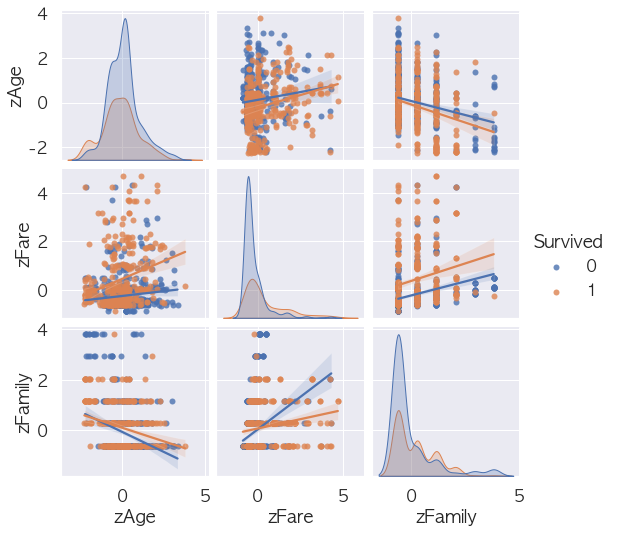

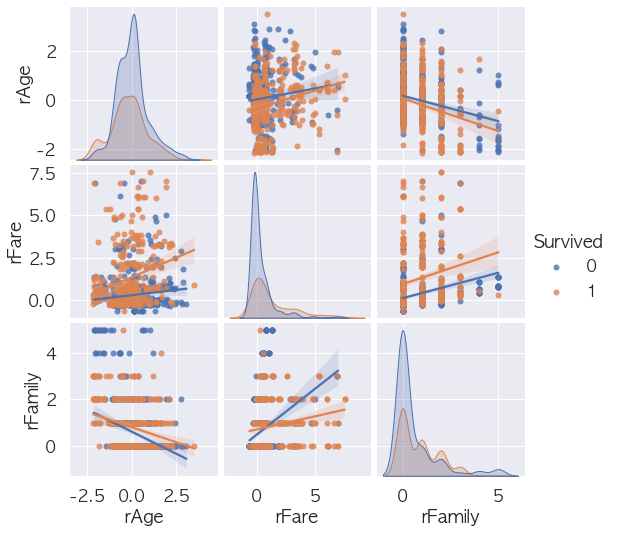

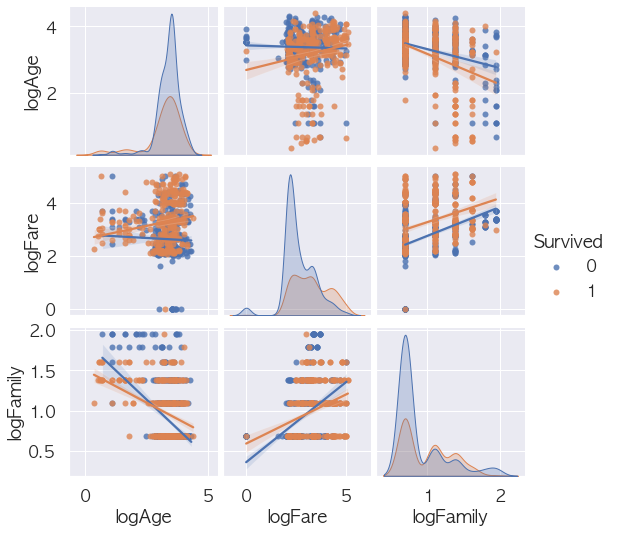

In [118]:
g1 = sns.pairplot(data=pd.concat([label,tmp_df_z], axis=1), 
             kind = 'reg',
             hue = 'Survived')

g2 = sns.pairplot(data=pd.concat([label,tmp_df_r], axis=1),
             kind = 'reg',
             hue = 'Survived')

g3 = sns.pairplot(data=pd.concat([label,tmp_df_log], axis=1),
             kind = 'reg',
             hue = 'Survived')

plt.show()

* Age는 Standard Scaler가, Fare와 Family는 Log Transformation이 가장 적절해보인다. 

#### Scaling

* 최종적으로, nAge, Age 는 Standard scaler, Fare와 Family는 log, 나머지 Categorical, nomial feature는 one-hot encoding으로 변환한다.

In [119]:
df_train_label = df_train['Survived']

df_train_scaling_1 = df_train[['nAge','Age']]
df_test_scaling_1 = df_test_raw[['nAge','Age']]

df_train_scaling_2 = df_train[['Fare','family']]
df_test_scaling_2 = df_test_raw[['Fare','family']]

df_train_scaling_3 = df_train[['Pclass','nSex','nCabin','nEmb','nInit']]
df_test_scaling_3 = df_test_raw[['Pclass','nSex','nCabin','nEmb','nInit']]


In [120]:
# standard scaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler().fit(df_train_scaling_1)

df_train_scaling_1 = std_scaler.transform(df_train_scaling_1)
df_train_scaling_1 = pd.DataFrame(df_train_scaling_1, 
                                  columns=['znAge','zAge'], 
                                  index=list(df_train.index.values))
df_test_scaling_1 = std_scaler.transform(df_test_scaling_1)
df_test_scaling_1 = pd.DataFrame(df_test_scaling_1, 
                                  columns=['znAge','zAge'], 
                                  index=list(df_test_raw.index.values))

# log Transformation
df_train_scaling_2['logFare'] =  np.log1p(df_train_scaling_2['Fare'])
df_train_scaling_2['logFamily'] =  np.log1p(df_train_scaling_2['family'])

df_test_scaling_2['logFare'] =  np.log1p(df_test_scaling_2['Fare'])
df_test_scaling_2['logFamily'] =  np.log1p(df_test_scaling_2['family'])

# one-hot-encoding
df_train_scaling_3 = pd.get_dummies(df_train_scaling_3, 
                                    columns=['Pclass', 'nSex','nCabin','nEmb','nInit'], 
                                    prefix=['Pclass', 'nSex','nCabin','nEmb','nInit'])
df_test_scaling_3 = pd.get_dummies(df_test_scaling_3, 
                                    columns=['Pclass', 'nSex','nCabin','nEmb','nInit'], 
                                   prefix=['Pclass', 'nSex','nCabin','nEmb','nInit'])

In [121]:
df_train_fnl = pd.concat([df_train_scaling_1, df_train_scaling_2[['logFare','logFamily']], df_train_scaling_3, df_train_label], axis=1)
df_test_fnl = pd.concat([df_test_scaling_1, df_test_scaling_2[['logFare','logFamily']], df_test_scaling_3], axis=1)

In [122]:
df_train_fnl.head()

znAge      zAge   logFare  logFamily  Pclass_1  Pclass_2  Pclass_3  \
0 -0.444883 -0.621277  2.110213   1.098612         0         0         1   
1  0.297466  0.596770  4.280593   1.098612         1         0         0   
2 -0.444883 -0.316765  2.188856   0.693147         0         0         1   
3  0.297466  0.368386  3.990834   1.098612         1         0         0   
4  0.297466  0.368386  2.202765   0.693147         0         0         1   

   nSex_1  nSex_2  nCabin_1  nCabin_2  nEmb_1  nEmb_2  nEmb_3  nInit_0  \
0       1       0         0         1       0       0       1        0   
1       0       1         1         0       1       0       0        0   
2       0       1         0         1       0       0       1        0   
3       0       1         1         0       0       0       1        0   
4       1       0         0         1       0       0       1        0   

   nInit_1  nInit_2  nInit_3  nInit_4  Survived  
0        0        1        0        0         0  
1        0        0        1        0         1  
2        1        0        0        0         1  
3        0        0        1        0         1  
4        0        1        0        0         0

In [123]:
df_test_fnl.head()

znAge      zAge   logFare  logFamily  Pclass_1  Pclass_2  Pclass_3  \
0  0.297466  0.330322  2.178064   0.693147         0         0         1   
1  1.039816  1.281921  2.079442   1.098612         0         0         1   
2  2.524515  2.423840  2.369075   0.693147         0         1         0   
3 -0.444883 -0.240637  2.268252   0.693147         0         0         1   
4 -0.444883 -0.621277  2.586824   1.386294         0         0         1   

   nSex_1  nSex_2  nCabin_1  nCabin_2  nEmb_1  nEmb_2  nEmb_3  nInit_0  \
0       1       0         0         1       0       1       0        0   
1       0       1         0         1       0       0       1        0   
2       1       0         0         1       0       1       0        0   
3       1       0         0         1       0       0       1        0   
4       0       1         0         1       0       0       1        0   

   nInit_1  nInit_2  nInit_3  nInit_4  
0        0        1        0        0  
1        0        0        1        0  
2        0        1        0        0  
3        0        1        0        0  
4        0        0        1        0

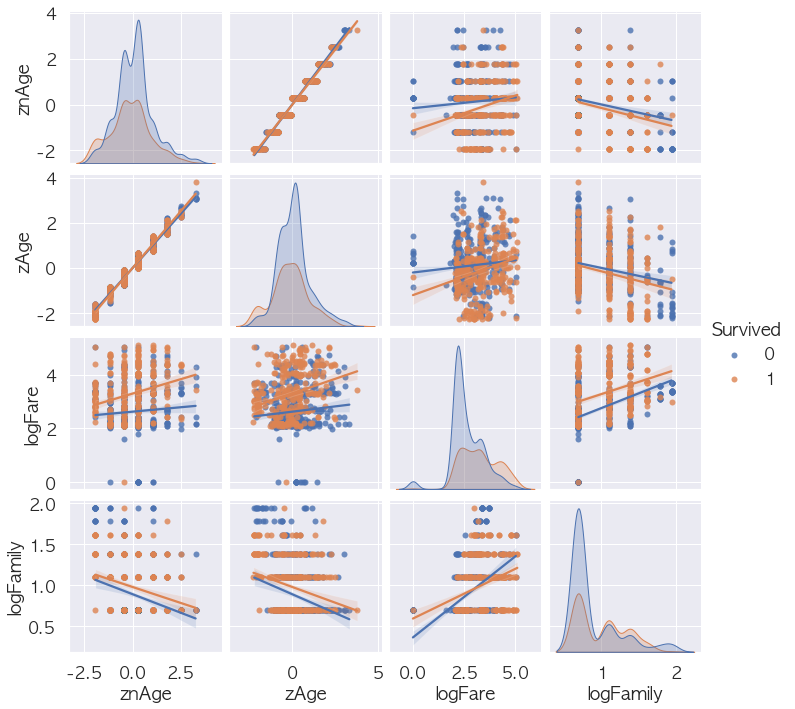

In [124]:
g1 = sns.pairplot(data=df_train_fnl[['Survived','znAge','zAge','logFare','logFamily']], 
             kind = 'reg',
             hue = 'Survived')
plt.show()

### Feature Selection

* Feature Selection은 기존 Feature 에서 목표한 모델링에 유용한 Feature 들을 선택하는 과정이다.
* 전처리 및 Encoding 된 Feature들을 대상으로 Feature Selection 절차를 수행한다. 

---

* Feature Selection 방법 [[Ref1]](https://wooono.tistory.com/249)[[Ref2]](https://subinium.github.io/feature-selection/)

    <br>
    
    * Filter Method : Feature 간 관계, Feature와 Target 간 관계를 통계적 기법을 확인하여 중요한 Feature 들만 선정
        - Correlation Coefficient, Regression, Chi square, ANOVA, Variance Threshold 등..
        
        <br>
        
    * Wrapper Method : Modeling을 활용하여 Feature 들의 Subset을 점진적으로 Test, 최종적으로 유용한 Feature 들만 선정
        - Forward Selection(전진 선택): 변수가 없는 상태로 시작하며, 반복할 때마다 가장 중요한 변수를 추가하여 더 이상 성능의 향상이 없을 때까지 변수를 추가한다.
        - Backward Elimination(후방 제거): 모든 변수를 가지고 시작하며, 가장 덜 중요한 변수를 하나씩 제거하면서 모델의 성능을 향상시킨다. 더 이상 성능의 향상이 없을 때까지 반복한다.
        - Stepwise Selection(단계별 선택): Foward Selection 과 Backward Elimination 을 결합하여 사용하는 방식으로, 모든 변수를 가지고 시작하여 가장 도움이 되지 않는 변수를 삭제하거나, 모델에서 빠져있는 변수 중에서 가장 중요한 변수를 추가하는 방법이다. 이와 같이 변수를 추가 또는 삭제를 반복한다.
        - Recursive Feature Elimination, Exhausive Feature Selection, etc,
        - SelectFromModel: 모델에서 추출, e.g, RandomForest와 같은 Decision Tree 기반 알고리즘 사용
        
        <br>
        
    * Embedded Method : Filtering과 Wrapper의 장점을 결합, 전체 Feature로 Model Fitting 시작, Training 과정에서 유용한 Feature들을 선택 (즉, 모델의 내장 metric을 사용)
        - Ridge: L1-norm으로 제약을 주는 방법
        - Lasso: L2-norm으로 제약을 주는 방법
        - Elastic Net: Ridge와 Lasso를 결합, 반반무많이
        
<br>

---

<br>

* Feature Selection 주의 사항

    1. Feature Selection 절차는 절차가 수행된 데이터에 대한 model의 과적합을 불러올 수 있다. 따라서 전체 데이터가 아닌 model을 개발하는 데 사용되는 데이터(Train Set)에서 이루어져야 한다. Train Set과 Test Set을 분리한 후, Train Set에서 Feature Selection을 수행한다.
    2. 교차 검증을 통한 Validation이 있을 경우, 모든 Train Set에서 Feature Selection을 진행하면 validation 결과가 편향될 수 있다. 이 경우, 각 교차 검증 Subset 에서 선택하는 것이 나을 수 있다. 


* 현재 Train Set을 tmp_train, tmp_test set으로 구분하여 각 Feature Selection 방법의 유효성을 함께 확인한다. 

In [125]:
from sklearn.model_selection import train_test_split
tmp_data = deepcopy(df_train_fnl)
tmp_data.drop(columns=['Survived'], inplace=True)
tmp_target  = deepcopy(df_train['Survived'])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(tmp_data, tmp_target, 
                                                                              test_size=0.2, shuffle=True, 
                                                                              stratify=tmp_target, random_state=34)

#### Filter Method

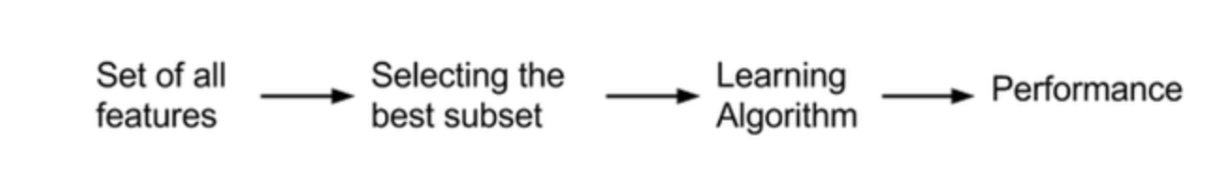

* Filter Method : 통계적 임계치, Feature 간의 관련성, Feature와 Target 간의 관련성을 확인하여 Feature를 선택하는 방법

    <br>

    * Variance Threshold : 
        *  Ordinal, interval, ratio Feature - Ordinal, interval, ratio Target, Feature의 분산이 높을수록 변화값이 많으므로, 더 유용한 정보를 가진다고 가정. 각 Feature에서 Variance가 일정 Threshold를 넘지 않는 Feature를 제거한다. 즉, 모든 Case, Sample에서 동일한 값을 가지는 특성은 제거된다. Feature 간의 관계나 Feature와 Target 간의 관계를 고려하지 않는다.
        * sklearn.feature_selection.VarianceThreshold [ref](https://datascienceschool.net/03%20machine%20learning/14.03%20%ED%8A%B9%EC%A7%95%20%EC%84%A0%ED%83%9D.html)
        
        <br>
        
    * Correlation Coefficient : 
        * Ordinal, interval, ratio Feature - Ordinal, interval, ratio Target, 유용한 Feature는 Target과 상관 관계가 높고 Feature 간에는 상관 관계가 낮다고 가정. Feature 간 상관 계수와 Feature - Target의 상관 계수를 계산한 후, Threshold를 적용한다. Feature 간 상관 계수가 높으면서 Feature - Target 간 상관계수가 낮으면 Feature 간 서로 예측이 되고, Target 과는 서로 예측이 되지 않으므로 정보가가 낮다고 판단할 수 있다.
        * Correlation & Heatmap [ref](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)
        * sklearn.feature_selection.r_regression [ref](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.r_regression.html)
        
        <br>
        
    * Information gain / Mutual Information [[ref1]](https://eehoeskrap.tistory.com/13)[[ref2]](https://code13.tistory.com/253) : 
        *  Nominal, Ordinal Feature - Nominal, Ordinal Target, 각 Feature와 Target 간의 종속성을 측정하는 방법의 하나. 각 Feature들을 선택, 그 Feature로 분류하였을 때의 결과의 Entropy의 감소를 계산하여 정보의 이득(Gain) 정도를 측정한다. IG의 값이 높을수록 그 Feature의 변별력이 높다는 것으로 볼 수 있다. 여기서 Entropy는 주어진 데이터의 혼잡도, 주어진 데이터가 서로 다를수록 Entropy가 높고, 서로 같을수록 Entropy가 낮다. 
        * sklearn.feature_selection.mutual_info_classif [ref](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif)
        
        <br>
        
    * Chi square Test & Fisher Score : 
        * Nominal, Ordinal Feature - Nominal, Ordinal Target, 범주형 Feature와 범주형 Target에 사용. Feature와 Target 간의 Chi^2을 계산하고, p-value가 낮고 Fisher score가 가장 높은 특성들을 선택한다. 통계의 카이제곱 검정과 동일하게 관찰된 빈도와 기대 빈도가 통계적으로 다른지 판단하는 것으로 주로 독립성 검정의 방법(두 변수간 연관성이 있는지 없는지 여부를 검정)을 활용한다. Feature는 범주형 특성을 가져야하고, 독립적이어야 하며, Feature 내 value는 5개 이상의 빈도를 가져야한다고 한다.
        * sklearn.feature_selection.chi2 [ref](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)

        <br>

    * Regression :
        * interval, ratio Feature - interval, ratio Target, 연속형 Feature와 연속형 Target에 사용. 각 Feature와 Target 간의 Univariate Regression Analysis를 수행하고 전체 회귀식에 대한 F 유의성 검정으로 F-statistic와 p-value를 산출한다. 여기서 유의한 결과는 intercept만 있는 regression model에 비해 해당 feature가 포함된 regression model이 데이터를 더 잘 설명한다는 것을 의미한다. Threshold로 설정한 p-value를 만족하는 Feature를 선택한다.
        * sklearn.feature_selection.f_regression [ref](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)
        
        <br>
        
    * f-ANOVA [[ref]](https://angeloyeo.github.io/2020/02/29/ANOVA.html) : 
        * Nominal, Ordinal Feature -  interval, ratio Target, 범주형 Feature와 연속형 Target에 사용. 각 Feature와 Target 간의 Univariate ANOVA를 수행하고 F-statistic과 p-value를 산출한다. Feature의 각 수준에 따라 연속형 Target 값이 유의하게 차이가 있는지를 확인하기 위해 Feature의 수준 간 분산 차이/수준 내 분산 차이로 F statistic를 추출하고, F 검정으로 p-value를 계산한다. 여기서 유의한 결과는 수준 간 분산 차이가 수준 내 분산 차이보다 크다는 것으로, 각 수준에 따른 target의 차이가 random error보다 더 큰 차이라는 것을 나타낸다. Threshold로 설정한 p-value를 만족하는 Feature를 선택한다. 
        * sklearn.feature_selection.f_classif [ref](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif)

<br>

* 주의사항
    * Filter Method는 각 Feature와 Target의 자료 유형(Categorical - Nominal, Ordinal; Continuous - Interval, Ratio)에 따라 적절한 방법이 달라진다. 자료 유형에 따라 적절한 방법을 선택할 필요가 있다.
    * Filter Method를 통해 Target과 관련성이 큰 Feature를 선택한다고 해도 그것이 Model의 Prediction에 꼭 도움이 되지는 않는다. 적절한 방법을 선택하기 위해서는 Grid Search와 같이 실험적인 확인이 필요하다.

<br>

* Reference

    * https://www.kaggle.com/prashant111/comprehensive-guide-on-feature-selection/notebook        
    * https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/        

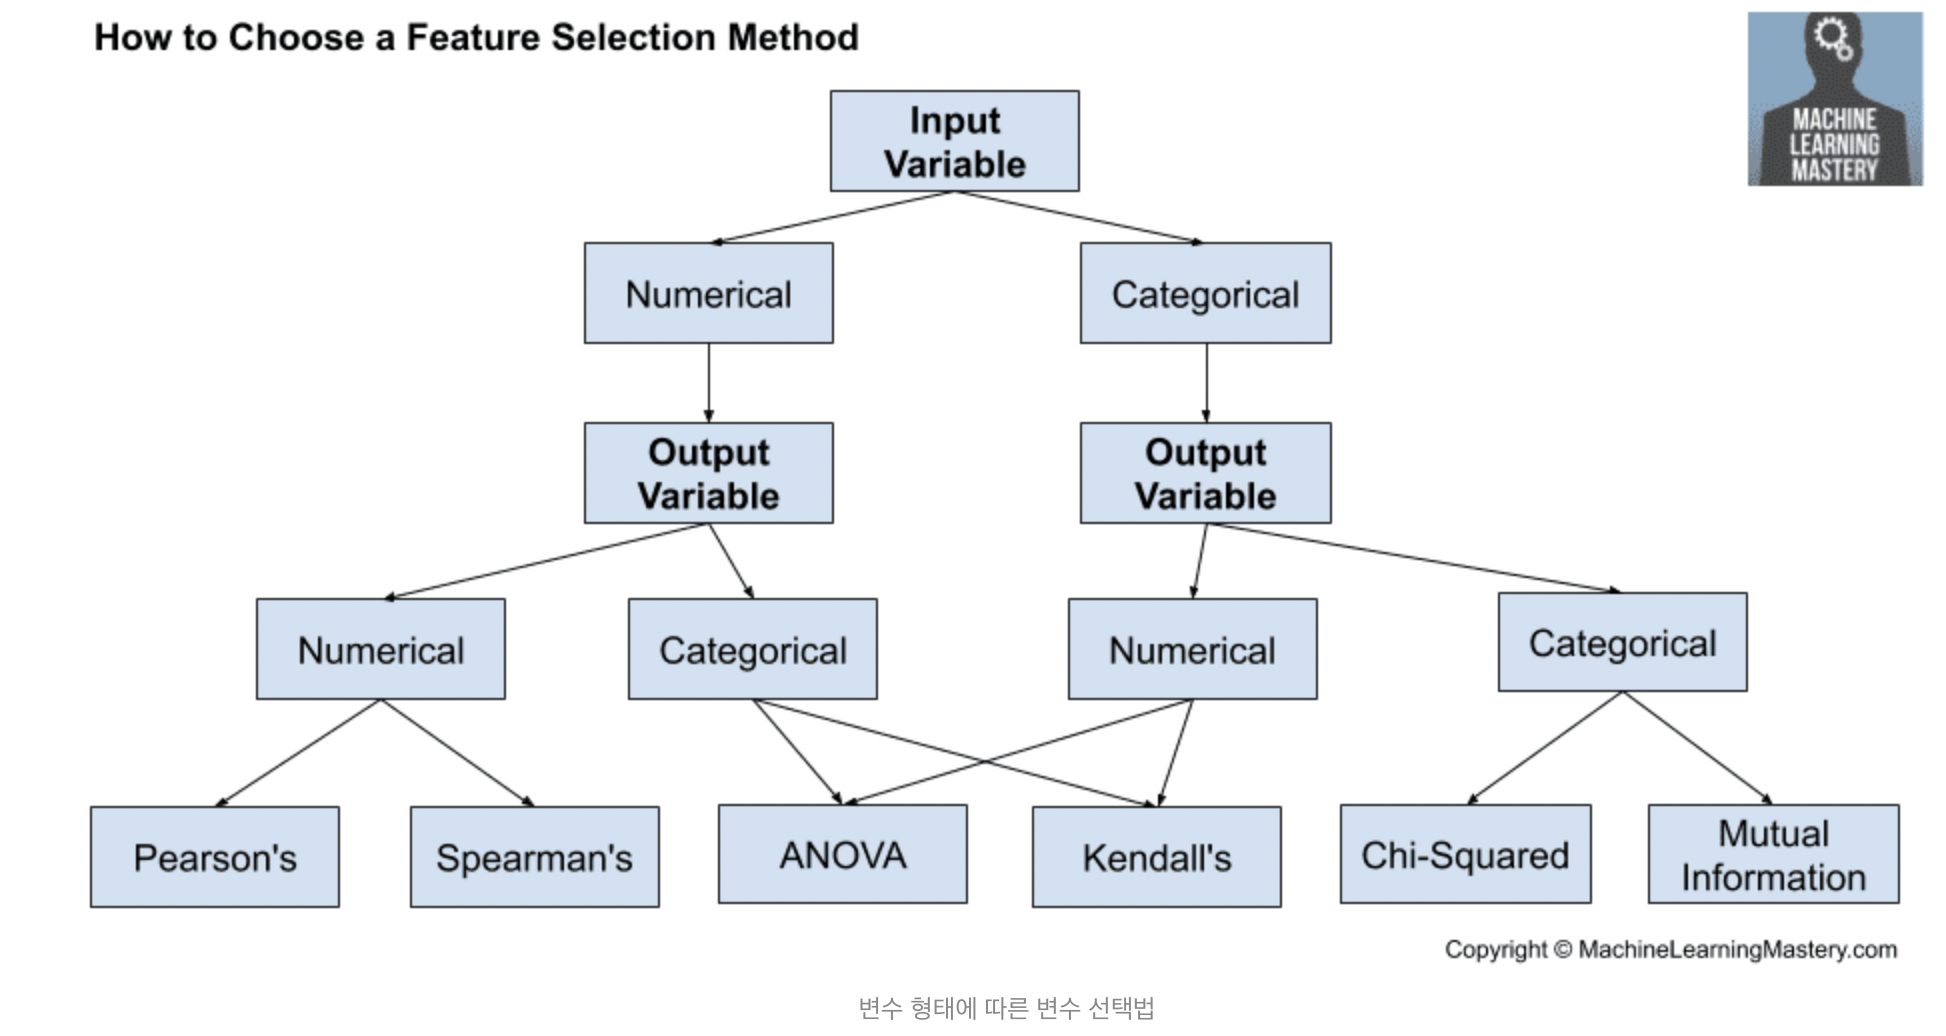

##### Feature Selection을 안 한 경우

In [126]:
X_train_filter=X_train.copy()
y_train_filter=y_train.copy()
X_test_filter=X_test.copy()
y_test_filter=y_test.copy()

In [127]:
from sklearn.linear_model import LogisticRegression

model_filter=LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, 
              intercept_scaling=1, class_weight=None, random_state=0, 
              solver='lbfgs', max_iter=100, multi_class='auto')
model_filter.fit(X_train_filter,y_train_filter)


y_pred_filter=model_filter.predict(X_test_filter)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metric_filter=confusion_matrix(y_test_filter,y_pred_filter)

accuracy_filter_basic=(metric_filter[0][0]+metric_filter[1][1])/sum(sum(metric_filter))*100
print('Accuracy using filter : ',accuracy_score(y_test_filter, y_pred_filter)*100,
      '\n',
      'AUC using filter : ',roc_auc_score(y_test_filter, y_pred_filter)*100)


Accuracy using filter :  85.29411764705883 
 AUC using filter :  84.87179487179488


In [128]:
fs_df = pd.DataFrame(['None', 'None', 
                      accuracy_score(y_test_filter, y_pred_filter)*100,
                      roc_auc_score(y_test_filter, y_pred_filter)*100]).T
fs_df.columns = ['Method', 'Type', 'Acc', 'AUC']

##### VarianceThreshold

* Ordinal, interval, ratio Feature 를 대상으로 수행하는 방법.
* 각 Feature에서 값의 Variance를 계산하고, Threshold 0.1을 넘지 않는 Feature를 제거한다.
* 살아남은 Feature에 Logistic Regression Model을 적용하여 간단히 정확도를 확인해본다.

In [129]:
X_train_filter=X_train.copy()
y_train_filter=y_train.copy()
X_test_filter=X_test.copy()
y_test_filter=y_test.copy()

from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(threshold=0.10)
selector.fit(X_train_filter)
selector.transform(X_train)
X_train_filter.columns[selector.get_support()]


Index(['znAge', 'zAge', 'logFare', 'logFamily', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'nSex_1', 'nSex_2', 'nCabin_1', 'nCabin_2', 'nEmb_1',
       'nEmb_3', 'nInit_1', 'nInit_2', 'nInit_3'],
      dtype='object')

In [130]:
Results = pd.DataFrame({"Name":X_train_filter.columns,
              "Variance":selector.variances_,
              "Threshold":selector.threshold,
              "Results":selector.get_support()})
Results

Name  Variance  Threshold  Results
0       znAge  1.016635        0.1     True
1        zAge  1.021272        0.1     True
2     logFare  0.824510        0.1     True
3   logFamily  0.113795        0.1     True
4    Pclass_1  0.182215        0.1     True
5    Pclass_2  0.170169        0.1     True
6    Pclass_3  0.248160        0.1     True
7      nSex_1  0.222058        0.1     True
8      nSex_2  0.222058        0.1     True
9    nCabin_1  0.173477        0.1     True
10   nCabin_2  0.173477        0.1     True
11     nEmb_1  0.156234        0.1     True
12     nEmb_2  0.080880        0.1    False
13     nEmb_3  0.202713        0.1     True
14    nInit_0  0.035615        0.1    False
15    nInit_1  0.157137        0.1     True
16    nInit_2  0.235286        0.1     True
17    nInit_3  0.117573        0.1     True
18    nInit_4  0.010248        0.1    False

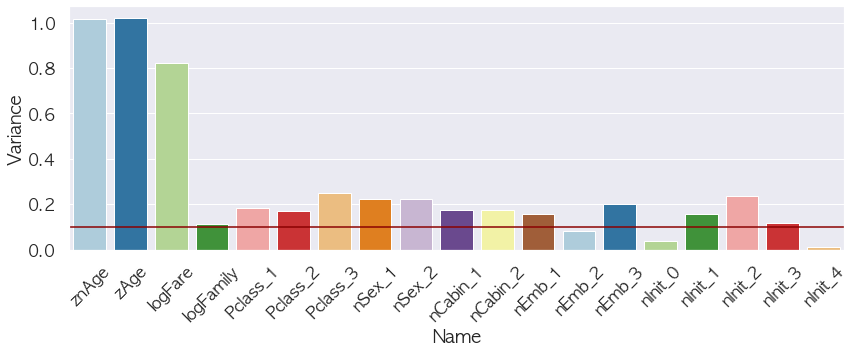

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
g1 = sns.barplot(data=Results, x='Name', y='Variance', ax=ax, palette="Paired")
g1.set_xticklabels(g1.get_xticklabels(),rotation = 45)
g1.axhline(selector.threshold, color="darkred")
plt.tight_layout()
plt.show()

In [132]:
X_train_filter = np.array(X_train_filter)[:,np.array(selector.get_support())]
y_train_filter = np.array(y_train_filter)
X_test_filter = np.array(X_test_filter)[:,np.array(selector.get_support())]
y_test_filter = np.array(y_test_filter)

In [133]:
from sklearn.linear_model import LogisticRegression

model_filter=LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, 
              intercept_scaling=1, class_weight=None, random_state=0, 
              solver='lbfgs', max_iter=100, multi_class='auto')
model_filter.fit(X_train_filter,y_train_filter)


y_pred_filter=model_filter.predict(X_test_filter)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metric_filter=confusion_matrix(y_test_filter,y_pred_filter)

accuracy_filter_basic=(metric_filter[0][0]+metric_filter[1][1])/sum(sum(metric_filter))*100
print('Accuracy using filter : ',accuracy_score(y_test_filter, y_pred_filter)*100,
      '\n',
      'AUC using filter : ',roc_auc_score(y_test_filter, y_pred_filter)*100)



Accuracy using filter :  84.11764705882354 
 AUC using filter :  83.91941391941393


In [134]:
fs_tmp = {'Method' : 'Filter', 
          'Type' : 'VarianceThreshold', 
          'Acc' : accuracy_score(y_test_filter, y_pred_filter)*100,
          'AUC' : roc_auc_score(y_test_filter, y_pred_filter)*100}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Correlation

* Ordinal, interval, ratio Feature와 Ordinal, interval, ratio Target을 대상으로 수행하는 방법. 타이타닉 문제에는 적절하지 않으나 연습삼아 해본다.
* 먼저 각 Feature와 Target 간의 Pearson or Spearman Correlation을 계산한다. 이후 Threshold 절대값 0.2를 넘는 Feature를 선택한다.
* 선택된 Feature들에서 서로 간의 Pearson or Spearman Correlation을 계산한다. 서로 간의 Correlation이 Threshold 절대값 0.8을 넘는 경우, Feature의 특성을 검토한 후 제거 여부를 결정한다. 
* 살아남은 Feature에 Logistic Regression Model을 적용하여 간단히 정확도를 확인해본다.

In [135]:
X_train_filter=X_train.copy()
y_train_filter=y_train.copy()
X_test_filter=X_test.copy()
y_test_filter=y_test.copy()

In [136]:
# Correlation - Feature & Target
cor = pd.concat([X_train_filter, y_train_filter],axis = 1).corr(method="spearman")
threshold = 0.2
Results = pd.DataFrame({"Name" : X_train_filter.columns,
             "r" : cor['Survived'][:-1],
             "abs-r" : abs(cor['Survived'][:-1]),
             "threshold" : threshold,
             "results" : abs(cor['Survived'][:-1]) > threshold})
Results

Name         r     abs-r  threshold  results
znAge          znAge -0.130148  0.130148        0.2    False
zAge            zAge -0.109579  0.109579        0.2    False
logFare      logFare  0.320405  0.320405        0.2     True
logFamily  logFamily  0.208841  0.208841        0.2     True
Pclass_1    Pclass_1  0.241879  0.241879        0.2     True
Pclass_2    Pclass_2  0.086149  0.086149        0.2    False
Pclass_3    Pclass_3 -0.278603  0.278603        0.2     True
nSex_1        nSex_1 -0.541083  0.541083        0.2     True
nSex_2        nSex_2  0.541083  0.541083        0.2     True
nCabin_1    nCabin_1  0.278686  0.278686        0.2     True
nCabin_2    nCabin_2 -0.278686  0.278686        0.2     True
nEmb_1        nEmb_1  0.152497  0.152497        0.2    False
nEmb_2        nEmb_2  0.010826  0.010826        0.2    False
nEmb_3        nEmb_3 -0.140716  0.140716        0.2    False
nInit_0      nInit_0  0.103541  0.103541        0.2    False
nInit_1      nInit_1  0.325668  0.325668        0.2     True
nInit_2      nInit_2 -0.551516  0.551516        0.2     True
nInit_3      nInit_3  0.361636  0.361636        0.2     True
nInit_4      nInit_4 -0.050557  0.050557        0.2    False

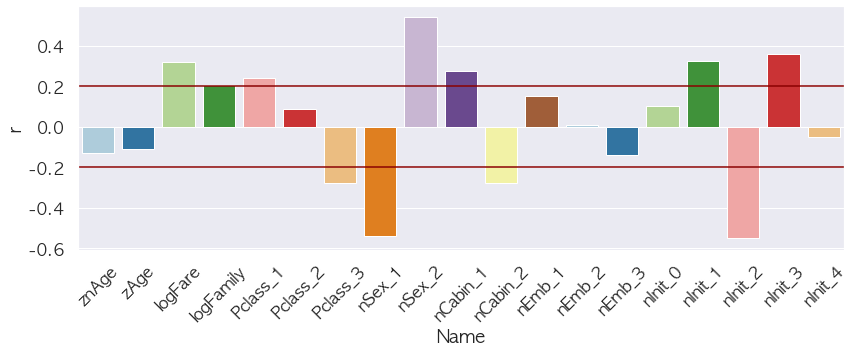

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
g1 = sns.barplot(data=Results, x='Name', y='r', ax=ax, palette="Paired")
g1.set_xticklabels(g1.get_xticklabels(),rotation = 45)
g1.axhline(threshold, color="darkred")
g1.axhline(-threshold, color="darkred")
plt.tight_layout()
plt.show()

In [138]:
X_train_filter.loc[:,Results.results.values].corr(method="spearman")

logFare  logFamily  Pclass_1  Pclass_3    nSex_1    nSex_2  \
logFare    1.000000   0.514447  0.640877 -0.640276 -0.246670  0.246670   
logFamily  0.514447   1.000000  0.065813 -0.130291 -0.311617  0.311617   
Pclass_1   0.640877   0.065813  1.000000 -0.611829 -0.066774  0.066774   
Pclass_3  -0.640276  -0.130291 -0.611829  1.000000  0.120692 -0.120692   
nSex_1    -0.246670  -0.311617 -0.066774  0.120692  1.000000 -1.000000   
nSex_2     0.246670   0.311617  0.066774 -0.120692 -1.000000  1.000000   
nCabin_1   0.542175   0.134752  0.788879 -0.506045 -0.118641  0.118641   
nCabin_2  -0.542175  -0.134752 -0.788879  0.506045  0.118641 -0.118641   
nInit_1    0.060961   0.071048 -0.014277  0.017509 -0.697404  0.697404   
nInit_2   -0.289266  -0.425830 -0.040372  0.116208  0.898235 -0.898235   
nInit_3    0.266178   0.349333  0.100588 -0.181406 -0.561933  0.561933   

           nCabin_1  nCabin_2   nInit_1   nInit_2   nInit_3  
logFare    0.542175 -0.542175  0.060961 -0.289266  0.266178  
logFamily  0.134752 -0.134752  0.071048 -0.425830  0.349333  
Pclass_1   0.788879 -0.788879 -0.014277 -0.040372  0.100588  
Pclass_3  -0.506045  0.506045  0.017509  0.116208 -0.181406  
nSex_1    -0.118641  0.118641 -0.697404  0.898235 -0.561933  
nSex_2     0.118641 -0.118641  0.697404 -0.898235  0.561933  
nCabin_1   1.000000 -1.000000  0.013572 -0.101166  0.139313  
nCabin_2  -1.000000  1.000000 -0.013572  0.101166 -0.139313  
nInit_1    0.013572 -0.013572  1.000000 -0.630946 -0.195513  
nInit_2   -0.101166  0.101166 -0.630946  1.000000 -0.508384  
nInit_3    0.139313 -0.139313 -0.195513 -0.508384  1.000000

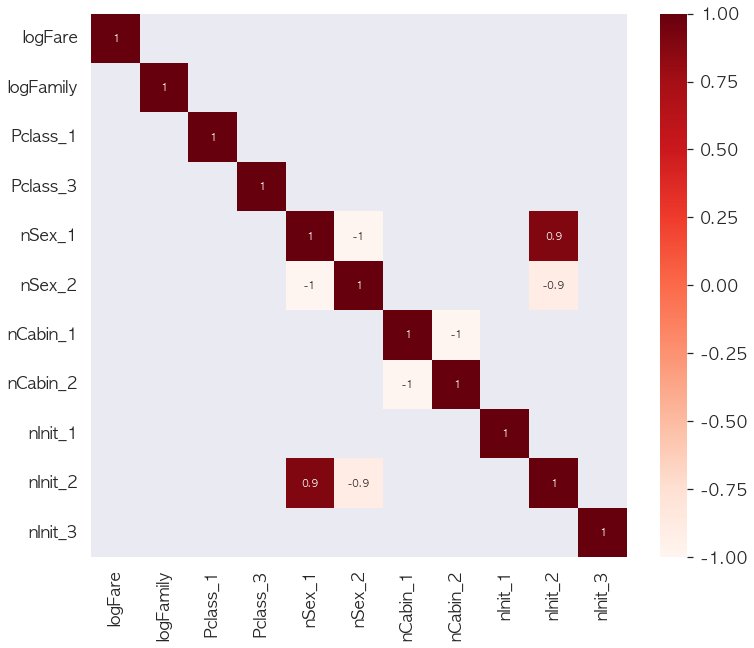

In [139]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train_filter.loc[:,Results.results.values].corr(method="spearman")
sns.heatmap(cor[abs(cor)>0.8], annot=True, cmap=plt.cm.Reds)
plt.show()

In [140]:
X_train_filter = X_train_filter.loc[:,Results.results.values]
X_test_filter = X_test_filter.loc[:,Results.results.values]
X_train_filter.drop(columns="nInit_2",inplace=True)
X_test_filter.drop(columns="nInit_2",inplace=True)

In [141]:
X_train_filter = np.array(X_train_filter)
X_test_filter = np.array(X_test_filter)
y_train_filter = np.array(y_train_filter)
y_test_filter = np.array(y_test_filter)

In [142]:
from sklearn.linear_model import LogisticRegression

model_filter=LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, 
              intercept_scaling=1, class_weight=None, random_state=0, 
              solver='lbfgs', max_iter=100, multi_class='auto')
model_filter.fit(X_train_filter,y_train_filter)


y_pred_filter=model_filter.predict(X_test_filter)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metric_filter=confusion_matrix(y_test_filter,y_pred_filter)

accuracy_filter_basic=(metric_filter[0][0]+metric_filter[1][1])/sum(sum(metric_filter))*100
print('Accuracy using filter : ',accuracy_score(y_test_filter, y_pred_filter)*100,
      '\n',
      'AUC using filter : ',roc_auc_score(y_test_filter, y_pred_filter)*100)

Accuracy using filter :  81.17647058823529 
 AUC using filter :  79.78021978021978


In [143]:
fs_tmp = {'Method' : 'Filter', 
          'Type' : 'Correlation', 
          'Acc' : accuracy_score(y_test_filter, y_pred_filter)*100,
          'AUC' : roc_auc_score(y_test_filter, y_pred_filter)*100}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Information Gain

* Nominal, Ordinal Feature - Nominal, Ordinal Target에 사용
* 각 Feature들을 선택, 그 Feature로 분류하였을 때의 결과의 Entropy의 감소를 계산하여 정보의 이득(Gain) 정도를 측정한다. IG의 값이 높을수록 그 Feature의 변별력이 높다는 것으로 볼 수 있다. 여기서 Entropy는 주어진 데이터의 혼잡도, 주어진 데이터가 서로 다를수록 Entropy가 높고, 서로 같을수록 Entropy가 낮다.
* IV 값의 기준
    * 0~0.02 무의미
    * 0.02~0.1 낮은 예측
    * 0.1~0.3 중간 예측
    * 0.3~0.5 강한 예측
    * 0.5~1 너무 강한 예측(의심되는 수치)
    * 대략 0.6까지는 용인하는 듯 하다.

In [144]:
X_train_filter=X_train.copy()
y_train_filter=y_train.copy()
X_test_filter=X_test.copy()
y_test_filter=y_test.copy()

In [145]:
from sklearn.feature_selection import mutual_info_classif # mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
selector=SelectKBest(mutual_info_classif, k='all')
#selector=SelectPercentile(mutual_info_classif, percentile=50)
selector.fit(X_train_filter,y_train_filter)
Threshold = 0.02

In [146]:
is_support = selector.scores_ > Threshold
Results = pd.DataFrame({"Name":X_train_filter.columns,
              "Mi":selector.scores_,
              "Threshold": Threshold,
              "Results":is_support})
Results

Name        Mi  Threshold  Results
0       znAge  0.000000       0.02    False
1        zAge  0.049736       0.02     True
2     logFare  0.124341       0.02     True
3   logFamily  0.034739       0.02     True
4    Pclass_1  0.014468       0.02    False
5    Pclass_2  0.028662       0.02     True
6    Pclass_3  0.002392       0.02    False
7      nSex_1  0.143534       0.02     True
8      nSex_2  0.139554       0.02     True
9    nCabin_1  0.050255       0.02     True
10   nCabin_2  0.029402       0.02     True
11     nEmb_1  0.007248       0.02    False
12     nEmb_2  0.000000       0.02    False
13     nEmb_3  0.001860       0.02    False
14    nInit_0  0.000000       0.02    False
15    nInit_1  0.089137       0.02     True
16    nInit_2  0.170857       0.02     True
17    nInit_3  0.026478       0.02     True
18    nInit_4  0.000000       0.02    False

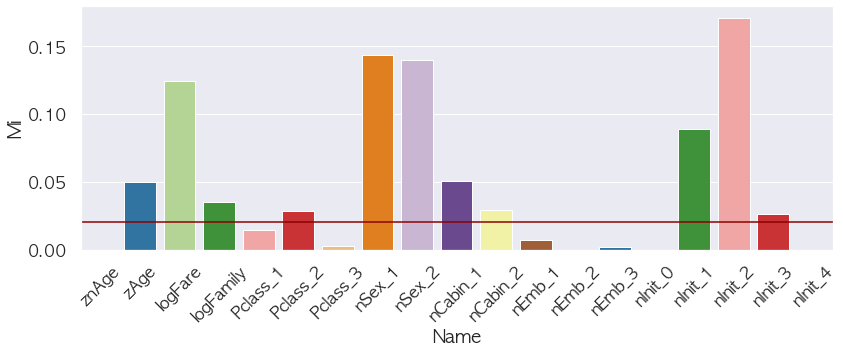

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
g1 = sns.barplot(data=Results, x='Name', y='Mi', ax=ax, palette="Paired")
g1.set_xticklabels(g1.get_xticklabels(),rotation = 45)
g1.axhline(Threshold, color="darkred")
plt.tight_layout()
plt.show()

In [148]:
X_train_filter=np.array(X_train_filter[X_train_filter.columns[is_support].values])
X_test_filter=np.array(X_test_filter[X_test_filter.columns[is_support].values])
y_train_filter = np.array(y_train_filter)
y_test_filter = np.array(y_test_filter)

In [149]:
from sklearn.linear_model import LogisticRegression

model_filter=LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, 
              intercept_scaling=1, class_weight=None, random_state=0, 
              solver='lbfgs', max_iter=100, multi_class='auto')
model_filter.fit(X_train_filter,y_train_filter)


y_pred_filter=model_filter.predict(X_test_filter)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metric_filter=confusion_matrix(y_test_filter,y_pred_filter)

accuracy_filter_basic=(metric_filter[0][0]+metric_filter[1][1])/sum(sum(metric_filter))*100
print('Accuracy using filter : ',accuracy_score(y_test_filter, y_pred_filter)*100,
      '\n',
      'AUC using filter : ',roc_auc_score(y_test_filter, y_pred_filter)*100)

Accuracy using filter :  83.52941176470588 
 AUC using filter :  83.15018315018314


In [150]:
fs_tmp = {'Method' : 'Filter', 
          'Type' : 'InformationGain', 
          'Acc' : accuracy_score(y_test_filter, y_pred_filter)*100,
          'AUC' : roc_auc_score(y_test_filter, y_pred_filter)*100}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Chi^2

* Nominal, Ordinal Feature - Nominal, Ordinal Target, 범주형 Feature와 범주형 Target에 사용. 따라서 연속형 변수로 변환된 값들은 넣지 않는다.
* Feature와 Target 간의 Chi^2을 계산하고, p-value가 낮고 Fisher score가 가장 높은 특성들을 선택한다. 
* 통계의 카이제곱 검정과 동일하게 관찰된 빈도와 기대 빈도가 통계적으로 다른지 판단하는 것으로 주로 독립성 검정의 방법(두 변수간 연관성이 있는지 없는지 여부를 검정)을 활용한다. 
* Feature는 범주형 특성을 가져야하고, 독립적이어야 하며, Feature 내 value는 5개 이상의 빈도를 가져야한다고 한다.

In [151]:
X_train_filter=X_train.copy()
y_train_filter=y_train.copy()
X_test_filter=X_test.copy()
y_test_filter=y_test.copy()
X_train_filter.drop(columns=['znAge', 'zAge', 'logFare', 'logFamily'], inplace=True)
X_test_filter.drop(columns=['znAge', 'zAge', 'logFare', 'logFamily'], inplace=True)

In [152]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
#selector=SelectPercentile(chi2, perceptile=50)
selector=SelectKBest(chi2, k='all')
selector.fit(X_train_filter,y_train_filter)
threshold = 0.05

In [153]:
is_support = selector.pvalues_ < threshold
Results = pd.DataFrame({"Name":X_train_filter.columns,
              "chi^2":selector.scores_,
              "p-value":selector.pvalues_,
              "Threshold": 0.05,
              "Results": is_support})
Results

Name       chi^2       p-value  Threshold  Results
0   Pclass_1   30.071858  4.163293e-08       0.05     True
1   Pclass_2    3.926007  4.754470e-02       0.05     True
2   Pclass_3   23.984446  9.711713e-07       0.05     True
3     nSex_1   65.873509  4.808108e-16       0.05     True
4     nSex_2  132.039790  1.466501e-30       0.05     True
5   nCabin_1   40.774522  1.708461e-10       0.05     True
6   nCabin_2   11.727529  6.158230e-04       0.05     True
7     nEmb_1   12.674152  3.707454e-04       0.05     True
8     nEmb_2    0.072198  7.881630e-01       0.05    False
9     nEmb_3    3.781980  5.180732e-02       0.05    False
10   nInit_0    6.979169  8.246387e-03       0.05     True
11   nInit_1   57.696377  3.058657e-14       0.05     True
12   nInit_2   77.867383  1.101961e-18       0.05     True
13   nInit_3   76.375928  2.344923e-18       0.05     True
14   nInit_4    1.709964  1.909900e-01       0.05    False

In [154]:
X_train_filter=np.array(X_train_filter[X_train_filter.columns[is_support].values])
X_test_filter=np.array(X_test_filter[X_test_filter.columns[is_support].values])
y_train_filter = np.array(y_train_filter)
y_test_filter = np.array(y_test_filter)

In [155]:
from sklearn.linear_model import LogisticRegression

model_filter=LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, 
              intercept_scaling=1, class_weight=None, random_state=0, 
              solver='lbfgs', max_iter=100, multi_class='auto')
model_filter.fit(X_train_filter,y_train_filter)


y_pred_filter=model_filter.predict(X_test_filter)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metric_filter=confusion_matrix(y_test_filter,y_pred_filter)

accuracy_filter_basic=(metric_filter[0][0]+metric_filter[1][1])/sum(sum(metric_filter))*100
print('Accuracy using filter : ',accuracy_score(y_test_filter, y_pred_filter)*100,
      '\n',
      'AUC using filter : ',roc_auc_score(y_test_filter, y_pred_filter)*100)



Accuracy using filter :  84.11764705882354 
 AUC using filter :  83.91941391941393


In [156]:
fs_tmp = {'Method' : 'Filter', 
          'Type' : 'Chi2', 
          'Acc' : accuracy_score(y_test_filter, y_pred_filter)*100,
          'AUC' : roc_auc_score(y_test_filter, y_pred_filter)*100}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Regression & ANOVA

* Regression은 interval, ratio Feature - interval, ratio Target, 연속형 Feature와 연속형 Target에 사용. 
* Regression 사용시 각 Feature와 Target 간의 Univariate Regression Analysis를 수행하고 전체 회귀식에 대한 F 유의성 검정으로 F-statistic와 p-value를 산출한다. 여기서 유의한 결과는 intercept만 있는 regression model에 비해 해당 feature가 포함된 regression model이 데이터를 더 잘 설명한다는 것을 의미한다. Threshold로 설정한 p-value를 만족하는 Feature를 선택한다.

<br>

* ANOVA는 Nominal, Ordinal Feature - interval, ratio Target, 또는 interval, ratio Feature - Nominal, Ordinal Target에 사용 (방향의 문제)
* ANOVA 사용시 각 Feature와 Target 간의 Univariate ANOVA를 수행하고 F-statistic과 p-value를 산출한다. Feature의 각 수준에 따라 연속형 Target 값이 유의하게 차이가 있는지를 확인하기 위해 Feature의 수준 간 분산 차이/수준 내 분산 차이로 F statistic를 추출하고, F 검정으로 p-value를 계산한다. 여기서 유의한 결과는 수준 간 분산 차이가 수준 내 분산 차이보다 크다는 것으로, 각 수준에 따른 target의 차이가 random error보다 더 큰 차이라는 것을 나타낸다. Threshold로 설정한 p-value를 만족하는 Feature를 선택한다. 

<br>

* 범주형 Target에 대한 예측이므로 f-ANOVA를 사용한다. 

In [157]:
X_train_filter=X_train.copy()
y_train_filter=y_train.copy()
X_test_filter=X_test.copy()
y_test_filter=y_test.copy()

In [158]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
#selector=SelectPercentile(chi2, perceptile=50)
selector=SelectKBest(f_classif, k='all')
selector.fit(X_train_filter,y_train_filter)
threshold = 0.05

In [159]:
is_support = selector.pvalues_ < threshold
Results = pd.DataFrame({"Name":X_train_filter.columns,
              "F":selector.scores_,
              "p-value":selector.pvalues_,
              "Threshold": 0.05,
              "Results": is_support})
Results

Name           F       p-value  Threshold  Results
0       znAge   12.683457  3.948750e-04       0.05     True
1        zAge   11.177284  8.738591e-04       0.05     True
2     logFare   85.405940  3.130849e-19       0.05     True
3   logFamily   17.237269  3.722378e-05       0.05     True
4    Pclass_1   41.883145  1.864869e-10       0.05     True
5    Pclass_2    5.039535  2.509864e-02       0.05     True
6    Pclass_3   56.718014  1.621196e-13       0.05     True
7      nSex_1  279.015425  1.133327e-52       0.05     True
8      nSex_2  279.015425  1.133327e-52       0.05     True
9    nCabin_1   56.754609  1.593607e-13       0.05     True
10   nCabin_2   56.754609  1.593607e-13       0.05     True
11     nEmb_1   16.047273  6.865791e-05       0.05     True
12     nEmb_2    0.079005  7.787365e-01       0.05    False
13     nEmb_3   13.615434  2.424397e-04       0.05     True
14    nInit_0    7.304050  7.053185e-03       0.05     True
15    nInit_1   79.965183  3.634276e-18       0.05     True
16    nInit_2  294.626652  4.657010e-55       0.05     True
17    nInit_3  101.408461  2.579894e-22       0.05     True
18    nInit_4    1.727159  1.892212e-01       0.05    False

In [160]:
X_train_filter=np.array(X_train_filter[X_train_filter.columns[is_support].values])
X_test_filter=np.array(X_test_filter[X_test_filter.columns[is_support].values])
y_train_filter = np.array(y_train_filter)
y_test_filter = np.array(y_test_filter)

In [161]:
from sklearn.linear_model import LogisticRegression

model_filter=LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, 
              intercept_scaling=1, class_weight=None, random_state=0, 
              solver='lbfgs', max_iter=100, multi_class='auto')
model_filter.fit(X_train_filter,y_train_filter)


y_pred_filter=model_filter.predict(X_test_filter)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metric_filter=confusion_matrix(y_test_filter,y_pred_filter)

accuracy_filter_basic=(metric_filter[0][0]+metric_filter[1][1])/sum(sum(metric_filter))*100
print('Accuracy using filter : ',accuracy_score(y_test_filter, y_pred_filter)*100,
      '\n',
      'AUC using filter : ',roc_auc_score(y_test_filter, y_pred_filter)*100)

Accuracy using filter :  85.29411764705883 
 AUC using filter :  84.87179487179488


In [162]:
fs_tmp = {'Method' : 'Filter', 
          'Type' : 'ANOVA', 
          'Acc' : accuracy_score(y_test_filter, y_pred_filter)*100,
          'AUC' : roc_auc_score(y_test_filter, y_pred_filter)*100}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

#### Wrapper Method

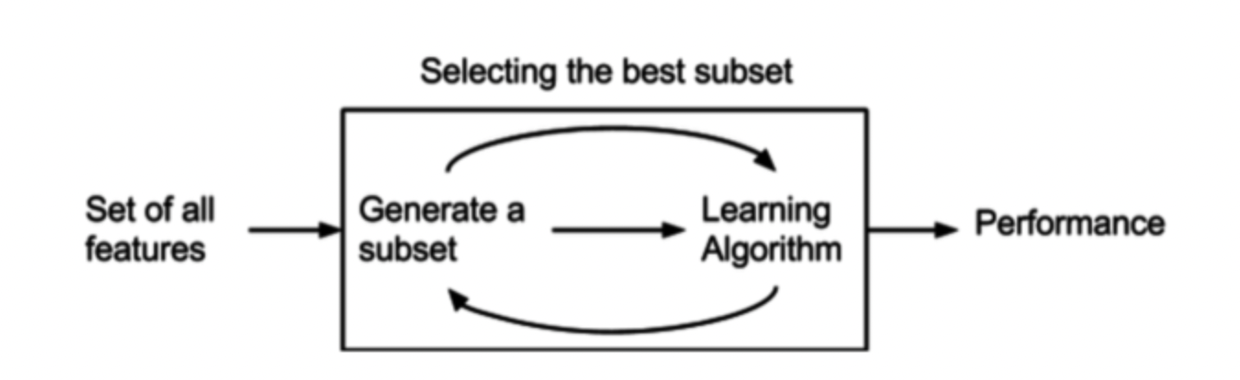

* Modeling을 활용하여 Feature 들의 Subset을 점진적으로 Test, 최종적으로 유용한 Feature 들만 선정

    * Forward Selection(전진 선택): 변수가 없는 상태로 시작하며, 반복할 때마다 가장 중요한 변수를 추가하여 더 이상 성능의 향상이 없을 때까지 변수를 추가한다.

    * Backward Elimination(후방 제거): 모든 변수를 가지고 시작하며, 가장 덜 중요한 변수를 하나씩 제거하면서 모델의 성능을 향상시킨다. 더 이상 성능의 향상이 없을 때까지 반복한다.

    * Stepwise Selection(단계별 선택): Foward Selection 과 Backward Elimination 을 결합하여 사용하는 방식으로, 모든 변수를 가지고 시작하여 가장 도움이 되지 않는 변수를 삭제하거나, 모델에서 빠져있는 변수 중에서 가장 중요한 변수를 추가하는 방법이다. 이와 같이 변수를 추가 또는 삭제를 반복한다.



##### Forward Feature Selection

* Scoring 모델(e.g., Regression 등)을 하나 선정한 후, Feature 들을 하나씩 추가하면서 결과를 확인한다. 더 이상 성능의 향상이 없을 때까지 Feature를 추가한다.

In [163]:
#Forward feature selection
X_train_wrapper=X_train.copy()
y_train_wrapper=y_train.copy()
X_test_wrapper=X_test.copy()
y_test_wrapper=y_test.copy()


In [164]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
selector = SFS(LogisticRegression(), n_features_to_select=0.8, direction='forward', 
              scoring='roc_auc',cv=3)
selector.fit(X_train_wrapper, y_train_wrapper)


SequentialFeatureSelector(cv=3, estimator=LogisticRegression(),
                          n_features_to_select=0.8, scoring='roc_auc')

In [165]:
is_support = selector.support_
Results = pd.DataFrame({"Name":X_train_wrapper.columns,
              "Results": is_support})
Results

Name  Results
0       znAge     True
1        zAge     True
2     logFare     True
3   logFamily     True
4    Pclass_1     True
5    Pclass_2     True
6    Pclass_3     True
7      nSex_1     True
8      nSex_2     True
9    nCabin_1     True
10   nCabin_2     True
11     nEmb_1    False
12     nEmb_2    False
13     nEmb_3    False
14    nInit_0     True
15    nInit_1     True
16    nInit_2     True
17    nInit_3    False
18    nInit_4     True

In [166]:
X_train_wrapper=np.array(X_train_wrapper[X_train_wrapper.columns[is_support].values])
X_test_wrapper=np.array(X_test_wrapper[X_test_wrapper.columns[is_support].values])
y_train_wrapper = np.array(y_train_wrapper)
y_test_wrapper = np.array(y_test_wrapper)

In [167]:
from sklearn.linear_model import LogisticRegression

model_wrapper=LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, 
              intercept_scaling=1, class_weight=None, random_state=0, 
              solver='lbfgs', max_iter=100, multi_class='auto')
model_wrapper.fit(X_train_wrapper,y_train_wrapper)


y_pred_wrapper=model_wrapper.predict(X_test_wrapper)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metric_wrapper=confusion_matrix(y_test_wrapper,y_pred_wrapper)

accuracy_wrapper_basic=(metric_wrapper[0][0]+metric_wrapper[1][1])/sum(sum(metric_wrapper))*100
print('Accuracy using filter : ',accuracy_score(y_test_wrapper, y_pred_wrapper)*100,
      '\n',
      'AUC using filter : ',roc_auc_score(y_test_wrapper, y_pred_wrapper)*100)

Accuracy using filter :  85.88235294117646 
 AUC using filter :  85.93406593406594


In [168]:
fs_tmp = {'Method' : 'Wrapper', 
          'Type' : 'Forward', 
          'Acc' : accuracy_score(y_test_wrapper, y_pred_wrapper)*100,
          'AUC' : roc_auc_score(y_test_wrapper, y_pred_wrapper)*100}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Backward Feature Selection

* Scoring 모델(e.g., Regression 등)을 하나 선정한 후, Feature 들을 하나씩 추가하면서 결과를 확인한다. 더 이상 성능의 향상이 없을 때까지 Feature를 추가한다.

In [169]:
X_train_wrapper=X_train.copy()
y_train_wrapper=y_train.copy()
X_test_wrapper=X_test.copy()
y_test_wrapper=y_test.copy()


In [170]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
selector = SFS(LogisticRegression(), n_features_to_select=0.8, direction='backward', 
              scoring='roc_auc',cv=3)
selector.fit(X_train_wrapper, y_train_wrapper)


SequentialFeatureSelector(cv=3, direction='backward',
                          estimator=LogisticRegression(),
                          n_features_to_select=0.8, scoring='roc_auc')

In [171]:
is_support = selector.support_
Results = pd.DataFrame({"Name":X_train_wrapper.columns,
              "Results": is_support})
Results

Name  Results
0       znAge    False
1        zAge     True
2     logFare     True
3   logFamily     True
4    Pclass_1     True
5    Pclass_2     True
6    Pclass_3     True
7      nSex_1     True
8      nSex_2     True
9    nCabin_1     True
10   nCabin_2     True
11     nEmb_1     True
12     nEmb_2    False
13     nEmb_3    False
14    nInit_0     True
15    nInit_1     True
16    nInit_2     True
17    nInit_3    False
18    nInit_4     True

In [172]:
X_train_wrapper=np.array(X_train_wrapper[X_train_wrapper.columns[is_support].values])
X_test_wrapper=np.array(X_test_wrapper[X_test_wrapper.columns[is_support].values])
y_train_wrapper = np.array(y_train_wrapper)
y_test_wrapper = np.array(y_test_wrapper)

In [173]:
from sklearn.linear_model import LogisticRegression

model_wrapper=LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, 
              intercept_scaling=1, class_weight=None, random_state=0, 
              solver='lbfgs', max_iter=100, multi_class='auto')
model_wrapper.fit(X_train_wrapper,y_train_wrapper)


y_pred_wrapper=model_wrapper.predict(X_test_wrapper)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metric_wrapper=confusion_matrix(y_test_wrapper,y_pred_wrapper)

accuracy_wrapper_basic=(metric_wrapper[0][0]+metric_wrapper[1][1])/sum(sum(metric_wrapper))*100
print('Accuracy using filter : ',accuracy_score(y_test_wrapper, y_pred_wrapper)*100,
      '\n',
      'AUC using filter : ',roc_auc_score(y_test_wrapper, y_pred_wrapper)*100)

Accuracy using filter :  85.29411764705883 
 AUC using filter :  84.87179487179488


In [174]:
fs_tmp = {'Method' : 'Wrapper', 
          'Type' : 'Backward', 
          'Acc' : accuracy_score(y_test_wrapper, y_pred_wrapper)*100,
          'AUC' : roc_auc_score(y_test_wrapper, y_pred_wrapper)*100}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Exhaustive feature selection

* 전체 Feature들의 가능한 모든 조합 중 최선의 Feature Subset을 찾는 방식이다. 
* Scoring 모델(e.g., Regression 등)을 하나 선정한 후, 가능한 Feature 조합마다 결과를 확인하여 가장 좋은 결과를 산출하는 Feature Subset을 골라낸다. 
* 시간이 많이 소요된다.

In [175]:
# #Exhaustive feature selection
# X_train_wrapper=X_train.copy()
# y_train_wrapper=y_train.copy()
# X_test_wrapper=X_test.copy()
# y_test_wrapper=y_test.copy()


In [176]:
# from sklearn.linear_model import LogisticRegression
# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
# selector=EFS(LogisticRegression(), min_features=6, max_features=17, scoring='roc_auc',
#          print_progress=True, cv=2)
# selector.fit(np.array(X_train_wrapper),y_train_wrapper)

In [177]:
# best_idx = list(selector.best_idx_)
# is_support = pd.DataFrame([False for i in range(len(X_train.columns))])
# for i in best_idx:
#     is_support.loc[i,:] = True

# Results = pd.concat([pd.DataFrame(X_train.columns), is_support], axis = 1)
# Results.columns=['Name','results']
# Results

In [178]:
# X_train_wrapper=np.array(X_train_wrapper[X_train_wrapper.columns[list(selector.best_idx_)].values])
# X_test_wrapper=np.array(X_test_wrapper[X_test_wrapper.columns[list(selector.best_idx_)].values])
# y_train_wrapper = np.array(y_train_wrapper)
# y_test_wrapper = np.array(y_test_wrapper)

In [179]:
from sklearn.linear_model import LogisticRegression

# model_wrapper=LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, 
#               intercept_scaling=1, class_weight=None, random_state=0, 
#               solver='lbfgs', max_iter=100, multi_class='auto')
# model_wrapper.fit(X_train_wrapper,y_train_wrapper)


# y_pred_wrapper=model_wrapper.predict(X_test_wrapper)

# from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

# metric_wrapper=confusion_matrix(y_test_wrapper,y_pred_wrapper)

# accuracy_wrapper_basic=(metric_wrapper[0][0]+metric_wrapper[1][1])/sum(sum(metric_wrapper))*100
# print('Accuracy using filter : ',accuracy_score(y_test_wrapper, y_pred_wrapper)*100,
#       '\n',
#       'AUC using filter : ',roc_auc_score(y_test_wrapper, y_pred_wrapper)*100)

In [180]:
# fs_tmp = {'Method' : 'Wrapper', 
#           'Type' : 'Exhaustive', 
#           'Acc' : accuracy_score(y_test_wrapper, y_pred_wrapper)*100,
#           'AUC' : roc_auc_score(y_test_wrapper, y_pred_wrapper)*100}
# fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Recursive Feature Elimination

* Backward Feature Selection 방식 중 하나로, 모든 Feature를 우선 다 포함시킨 후 반복해서 학습을 진행하면서 중요도가 낮은 Feature를 하나씩 제거한다.
* 전체 Feature Set을 대상으로 training 한 후, 각 feature의 importance를 확인한다. 여기서 가장 importance가 낮은 feature를 제거한다. 이어서 feature 하나가 제거된 subset을 대상으로 위의 절차를 반복한다. 선택하려는 feature의 수에 도달할 때 까지 절차가 반복된다.

In [181]:
X_train_wrapper=X_train.copy()
y_train_wrapper=y_train.copy()
X_test_wrapper=X_test.copy()
y_test_wrapper=y_test.copy()

In [182]:
from sklearn.feature_selection import RFE
selector = RFE(LogisticRegression(), n_features_to_select=0.9, step=1)
selector.fit(X_train_wrapper, y_train_wrapper)

RFE(estimator=LogisticRegression(), n_features_to_select=0.9)

In [183]:
is_support = selector.get_support()
Results = pd.DataFrame({"Name":X_train.columns,
              "Results": is_support})
Results

Name  Results
0       znAge    False
1        zAge     True
2     logFare     True
3   logFamily     True
4    Pclass_1     True
5    Pclass_2     True
6    Pclass_3     True
7      nSex_1     True
8      nSex_2     True
9    nCabin_1     True
10   nCabin_2     True
11     nEmb_1     True
12     nEmb_2    False
13     nEmb_3     True
14    nInit_0     True
15    nInit_1     True
16    nInit_2     True
17    nInit_3     True
18    nInit_4     True

In [184]:
X_train_wrapper=np.array(X_train_wrapper[X_train_wrapper.columns[is_support].values])
X_test_wrapper=np.array(X_test_wrapper[X_test_wrapper.columns[is_support].values])
y_train_wrapper = np.array(y_train_wrapper)
y_test_wrapper = np.array(y_test_wrapper)

In [185]:
from sklearn.linear_model import LogisticRegression

model_wrapper=LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, 
              intercept_scaling=1, class_weight=None, random_state=0, 
              solver='lbfgs', max_iter=100, multi_class='auto')
model_wrapper.fit(X_train_wrapper,y_train_wrapper)


y_pred_wrapper=model_wrapper.predict(X_test_wrapper)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metric_wrapper=confusion_matrix(y_test_wrapper,y_pred_wrapper)

accuracy_wrapper_basic=(metric_wrapper[0][0]+metric_wrapper[1][1])/sum(sum(metric_wrapper))*100
print('Accuracy using filter : ',accuracy_score(y_test_wrapper, y_pred_wrapper)*100,
      '\n',
      'AUC using filter : ',roc_auc_score(y_test_wrapper, y_pred_wrapper)*100)

Accuracy using filter :  85.29411764705883 
 AUC using filter :  84.87179487179488


In [186]:
fs_tmp = {'Method' : 'Wrapper', 
          'Type' : 'RFE', 
          'Acc' : accuracy_score(y_test_wrapper, y_pred_wrapper)*100,
          'AUC' : roc_auc_score(y_test_wrapper, y_pred_wrapper)*100}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Model-based Feature Selection - RandomForest

In [187]:
X_train_wrapper=X_train.copy()
y_train_wrapper=y_train.copy()
X_test_wrapper=X_test.copy()
y_test_wrapper=y_test.copy()

In [188]:
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(n_estimators=100, random_state=0)
selector = SelectFromModel(estimator, threshold='median')
selector.fit(X_train_wrapper, y_train_wrapper)

SelectFromModel(estimator=RandomForestClassifier(random_state=0),
                threshold='median')

In [189]:
is_support = selector.get_support()
Results = pd.DataFrame({"Name":X_train.columns,
                        "Feature Importance":selector.estimator_.feature_importances_,
                        "Threshold" : selector.threshold_,
                        "Results": is_support})
Results

Name  Feature Importance  Threshold  Results
0       znAge            0.061581   0.023682     True
1        zAge            0.174693   0.023682     True
2     logFare            0.231882   0.023682     True
3   logFamily            0.070306   0.023682     True
4    Pclass_1            0.014620   0.023682    False
5    Pclass_2            0.019460   0.023682    False
6    Pclass_3            0.032260   0.023682     True
7      nSex_1            0.093764   0.023682     True
8      nSex_2            0.072796   0.023682     True
9    nCabin_1            0.015376   0.023682    False
10   nCabin_2            0.023682   0.023682     True
11     nEmb_1            0.012016   0.023682    False
12     nEmb_2            0.009463   0.023682    False
13     nEmb_3            0.017142   0.023682    False
14    nInit_0            0.009097   0.023682    False
15    nInit_1            0.024143   0.023682     True
16    nInit_2            0.090627   0.023682     True
17    nInit_3            0.022793   0.023682    False
18    nInit_4            0.004299   0.023682    False

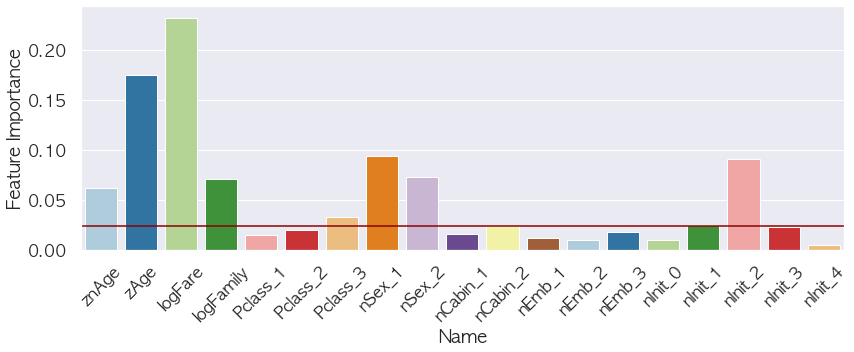

In [190]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
g1 = sns.barplot(data=Results, x='Name', y='Feature Importance', ax=ax, palette="Paired")
g1.set_xticklabels(g1.get_xticklabels(),rotation = 45)
g1.axhline(selector.threshold_, color="darkred")
plt.tight_layout()
plt.show()

In [191]:
X_train_wrapper=np.array(X_train_wrapper[X_train_wrapper.columns[is_support].values])
X_test_wrapper=np.array(X_test_wrapper[X_test_wrapper.columns[is_support].values])
y_train_wrapper = np.array(y_train_wrapper)
y_test_wrapper = np.array(y_test_wrapper)

In [192]:
from sklearn.linear_model import LogisticRegression

model_wrapper=LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, 
              intercept_scaling=1, class_weight=None, random_state=0, 
              solver='lbfgs', max_iter=100, multi_class='auto')
model_wrapper.fit(X_train_wrapper,y_train_wrapper)


y_pred_wrapper=model_wrapper.predict(X_test_wrapper)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metric_wrapper=confusion_matrix(y_test_wrapper,y_pred_wrapper)

accuracy_wrapper_basic=(metric_wrapper[0][0]+metric_wrapper[1][1])/sum(sum(metric_wrapper))*100
print('Accuracy using filter : ',accuracy_score(y_test_wrapper, y_pred_wrapper)*100,
      '\n',
      'AUC using filter : ',roc_auc_score(y_test_wrapper, y_pred_wrapper)*100)

Accuracy using filter :  84.70588235294117 
 AUC using filter :  84.68864468864469


In [193]:
fs_tmp = {'Method' : 'Wrapper', 
          'Type' : 'MB_RandomForest', 
          'Acc' : accuracy_score(y_test_wrapper, y_pred_wrapper)*100,
          'AUC' : roc_auc_score(y_test_wrapper, y_pred_wrapper)*100}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Model-based Feature Selection - CART

In [194]:
X_train_wrapper=X_train.copy()
y_train_wrapper=y_train.copy()
X_test_wrapper=X_test.copy()
y_test_wrapper=y_test.copy()

In [195]:
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
estimator = DecisionTreeClassifier(criterion = 'gini', random_state=0)
selector = SelectFromModel(estimator, threshold='median')
selector.fit(X_train_wrapper, y_train_wrapper)

SelectFromModel(estimator=DecisionTreeClassifier(random_state=0),
                threshold='median')

In [196]:
is_support = selector.get_support()
Results = pd.DataFrame({"Name":X_train.columns,
                        "Feature Importance":selector.estimator_.feature_importances_,
                        "Threshold" : selector.threshold_,
                        "Results": is_support})
Results

Name  Feature Importance  Threshold  Results
0       znAge            0.037463    0.01696     True
1        zAge            0.151242    0.01696     True
2     logFare            0.242218    0.01696     True
3   logFamily            0.096886    0.01696     True
4    Pclass_1            0.004858    0.01696    False
5    Pclass_2            0.019778    0.01696     True
6    Pclass_3            0.031028    0.01696     True
7      nSex_1            0.000000    0.01696    False
8      nSex_2            0.005102    0.01696    False
9    nCabin_1            0.016960    0.01696     True
10   nCabin_2            0.004614    0.01696    False
11     nEmb_1            0.006870    0.01696    False
12     nEmb_2            0.017040    0.01696     True
13     nEmb_3            0.007562    0.01696    False
14    nInit_0            0.000000    0.01696    False
15    nInit_1            0.011072    0.01696    False
16    nInit_2            0.314768    0.01696     True
17    nInit_3            0.004858    0.01696    False
18    nInit_4            0.027682    0.01696     True

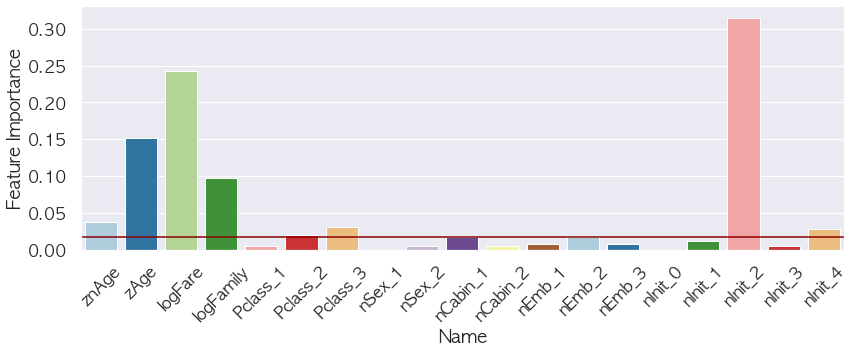

In [197]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
g1 = sns.barplot(data=Results, x='Name', y='Feature Importance', ax=ax, palette="Paired")
g1.set_xticklabels(g1.get_xticklabels(),rotation = 45)
g1.axhline(selector.threshold_, color="darkred")
plt.tight_layout()
plt.show()

In [198]:
X_train_wrapper=np.array(X_train_wrapper[X_train_wrapper.columns[is_support].values])
X_test_wrapper=np.array(X_test_wrapper[X_test_wrapper.columns[is_support].values])
y_train_wrapper = np.array(y_train_wrapper)
y_test_wrapper = np.array(y_test_wrapper)

In [199]:
from sklearn.linear_model import LogisticRegression

model_wrapper=LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, 
              intercept_scaling=1, class_weight=None, random_state=0, 
              solver='lbfgs', max_iter=100, multi_class='auto')
model_wrapper.fit(X_train_wrapper,y_train_wrapper)


y_pred_wrapper=model_wrapper.predict(X_test_wrapper)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metric_wrapper=confusion_matrix(y_test_wrapper,y_pred_wrapper)

accuracy_wrapper_basic=(metric_wrapper[0][0]+metric_wrapper[1][1])/sum(sum(metric_wrapper))*100
print('Accuracy using filter : ',accuracy_score(y_test_wrapper, y_pred_wrapper)*100,
      '\n',
      'AUC using filter : ',roc_auc_score(y_test_wrapper, y_pred_wrapper)*100)

Accuracy using filter :  83.52941176470588 
 AUC using filter :  83.15018315018314


In [200]:
fs_tmp = {'Method' : 'Wrapper', 
          'Type' : 'MB_CART', 
          'Acc' : accuracy_score(y_test_wrapper, y_pred_wrapper)*100,
          'AUC' : roc_auc_score(y_test_wrapper, y_pred_wrapper)*100}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Model-based Feature Selection - LogisticRegression

In [201]:
X_train_wrapper=X_train.copy()
y_train_wrapper=y_train.copy()
X_test_wrapper=X_test.copy()
y_test_wrapper=y_test.copy()

In [202]:
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression(random_state=0)
selector = SelectFromModel(estimator, threshold='mean')
selector.fit(X_train_wrapper, y_train_wrapper)

SelectFromModel(estimator=LogisticRegression(random_state=0), threshold='mean')

In [203]:
is_support = selector.get_support()
Results = pd.DataFrame({"Name":X_train.columns,
                        "Coefficient": selector.estimator_.coef_[0],
                        "Threshold" : selector.threshold_,
                        "Results": is_support})
Results

Name  Coefficient  Threshold  Results
0       znAge    -0.080867   0.575315    False
1        zAge    -0.439094   0.575315    False
2     logFare     0.444060   0.575315    False
3   logFamily    -1.649099   0.575315     True
4    Pclass_1     0.389098   0.575315    False
5    Pclass_2     0.231282   0.575315    False
6    Pclass_3    -0.618788   0.575315     True
7      nSex_1    -0.817842   0.575315     True
8      nSex_2     0.819434   0.575315     True
9    nCabin_1     0.407402   0.575315    False
10   nCabin_2    -0.405810   0.575315    False
11     nEmb_1     0.181608   0.575315    False
12     nEmb_2     0.114970   0.575315    False
13     nEmb_3    -0.294986   0.575315    False
14    nInit_0     1.162607   0.575315     True
15    nInit_1    -0.328134   0.575315    False
16    nInit_2    -1.113857   0.575315     True
17    nInit_3     0.856512   0.575315     True
18    nInit_4    -0.575535   0.575315     True

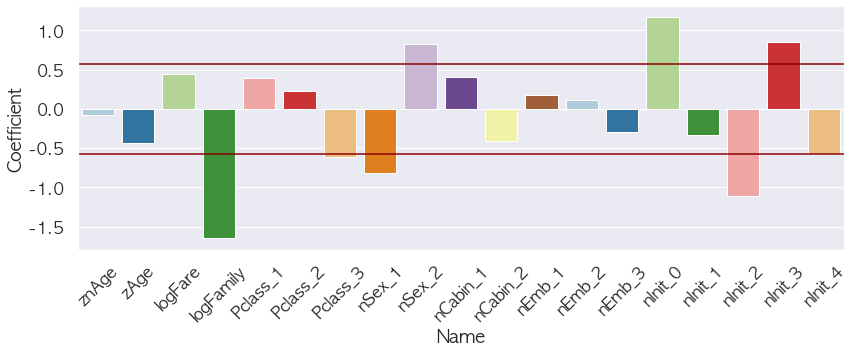

In [204]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
g1 = sns.barplot(data=Results, x='Name', y='Coefficient', ax=ax, palette="Paired")
g1.set_xticklabels(g1.get_xticklabels(),rotation = 45)
g1.axhline(selector.threshold_, color="darkred")
g1.axhline(-selector.threshold_, color="darkred")
plt.tight_layout()
plt.show()

In [205]:
X_train_wrapper=np.array(X_train_wrapper[X_train_wrapper.columns[is_support].values])
X_test_wrapper=np.array(X_test_wrapper[X_test_wrapper.columns[is_support].values])
y_train_wrapper = np.array(y_train_wrapper)
y_test_wrapper = np.array(y_test_wrapper)

In [206]:
from sklearn.linear_model import LogisticRegression

model_wrapper=LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, 
              intercept_scaling=1, class_weight=None, random_state=0, 
              solver='lbfgs', max_iter=100, multi_class='auto')
model_wrapper.fit(X_train_wrapper,y_train_wrapper)


y_pred_wrapper=model_wrapper.predict(X_test_wrapper)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metric_wrapper=confusion_matrix(y_test_wrapper,y_pred_wrapper)

accuracy_wrapper_basic=(metric_wrapper[0][0]+metric_wrapper[1][1])/sum(sum(metric_wrapper))*100
print('Accuracy using filter : ',accuracy_score(y_test_wrapper, y_pred_wrapper)*100,
      '\n',
      'AUC using filter : ',roc_auc_score(y_test_wrapper, y_pred_wrapper)*100)

Accuracy using filter :  84.70588235294117 
 AUC using filter :  84.39560439560441


In [207]:
fs_tmp = {'Method' : 'Wrapper', 
          'Type' : 'MB_LogReg', 
          'Acc' : accuracy_score(y_test_wrapper, y_pred_wrapper)*100,
          'AUC' : roc_auc_score(y_test_wrapper, y_pred_wrapper)*100}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

#### Embedded Method

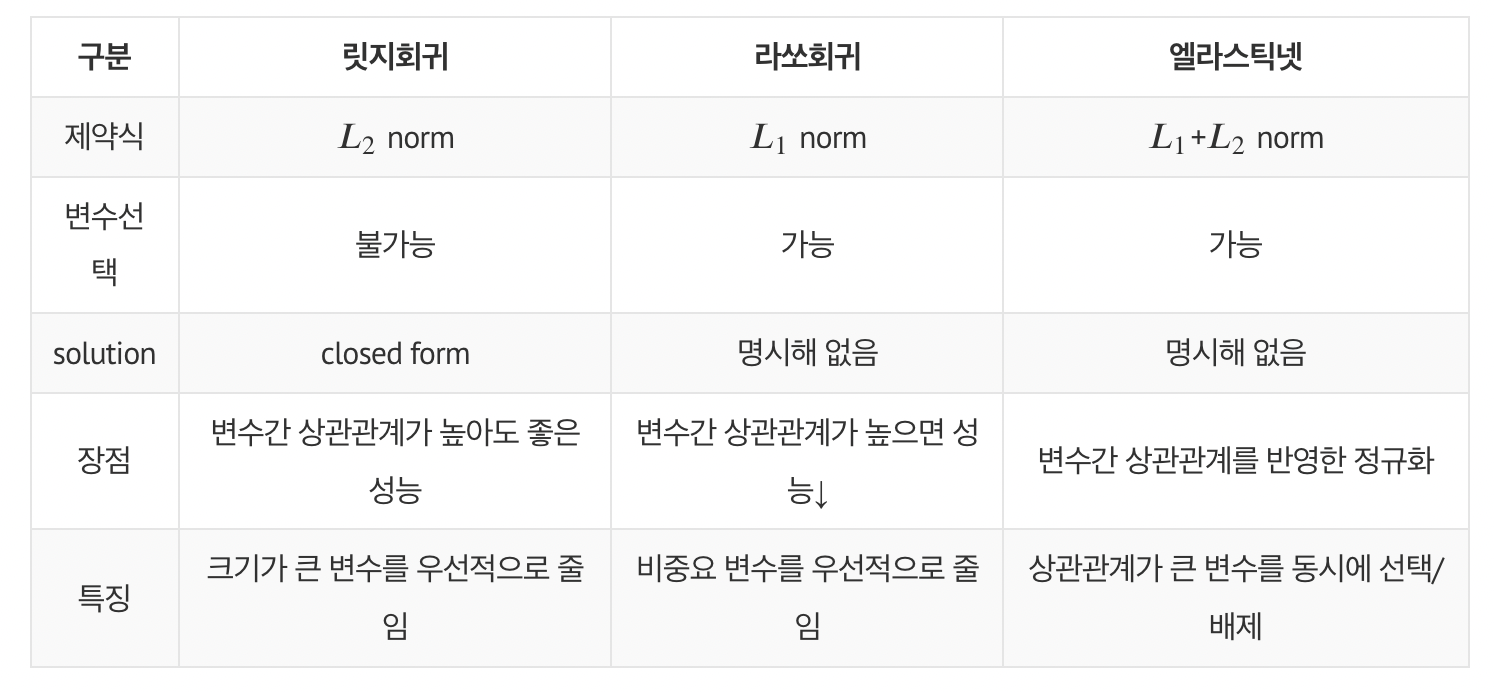

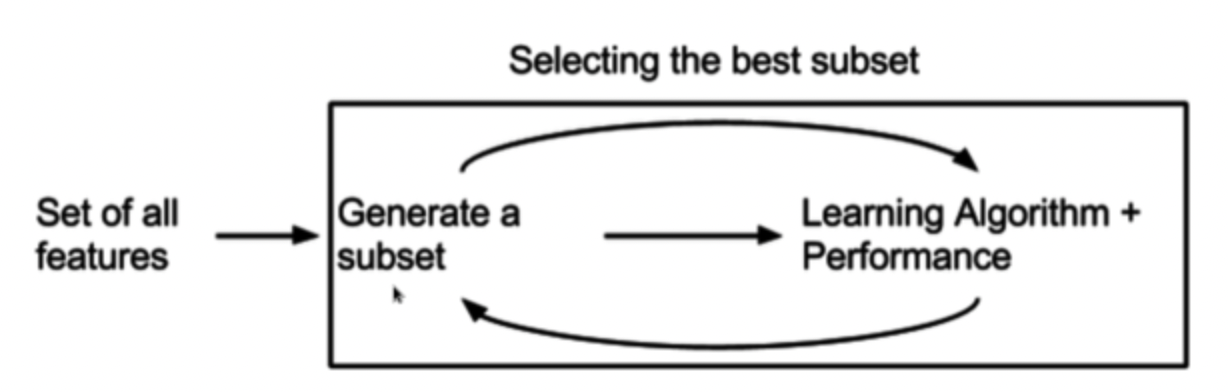

* Embedded Method : Filtering과 Wrapper의 장점을 결합, 전체 Feature로 Model Fitting 시작, Training 과정에서 유용한 Feature들을 선택 (즉, 모델의 내장 metric을 사용)

    * Ridge: L2-norm으로 제약을 주는 방법
    * Lasso: L1-norm으로 제약을 주는 방법
    * Elastic Net: Ridge와 Lasso를 결합, 반반무많이
    
* https://huidea.tistory.com/154    
* https://otugi.tistory.com/121
* https://ratsgo.github.io/machine%20learning/2017/05/22/RLR/

##### Ridge Regression & Classification (L2 Regularization)

* Ridge: L2-norm으로 제약을 주는 방법

In [208]:
X_train_embedded=X_train.copy()
y_train_embedded=y_train.copy()
X_test_embedded=X_test.copy()
y_test_embedded=y_test.copy()

In [209]:
from sklearn.linear_model import RidgeClassifier
model_embedded = RidgeClassifier(alpha=1, fit_intercept=True, tol=0.001, max_iter=None, random_state=0)
model_embedded.fit(X_train_embedded, y_train_embedded)

RidgeClassifier(alpha=1, random_state=0)

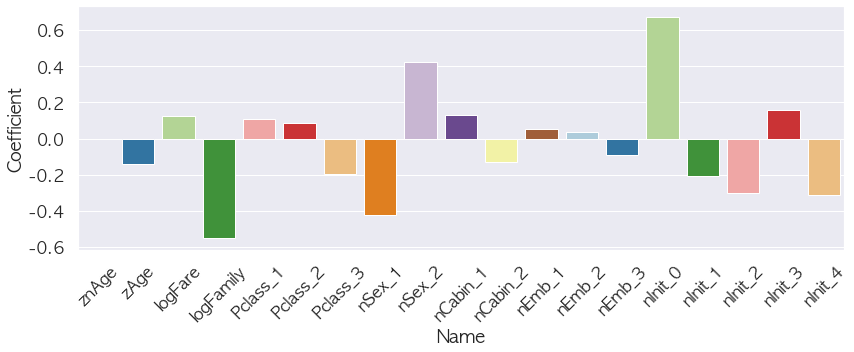

In [210]:
Results = pd.DataFrame({"Name":X_train.columns,
                        "Coefficient":model_embedded.coef_[0]})
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
g1 = sns.barplot(data=Results, x='Name', y='Coefficient', ax=ax, palette="Paired")
g1.set_xticklabels(g1.get_xticklabels(),rotation = 45)
plt.tight_layout()
plt.show()

In [211]:
y_pred_embedded=model_embedded.predict(X_test_embedded)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metric_embedded=confusion_matrix(y_test_embedded,y_pred_embedded)

accuracy_wrapper_basic=(metric_embedded[0][0]+metric_embedded[1][1])/sum(sum(metric_embedded))*100
print('Accuracy using filter : ',accuracy_score(y_test_embedded, y_pred_embedded)*100,
      '\n',
      'AUC using filter : ',roc_auc_score(y_test_embedded, y_pred_embedded)*100)

Accuracy using filter :  85.88235294117646 
 AUC using filter :  85.64102564102565


In [212]:
fs_tmp = {'Method' : 'Embedded', 
          'Type' : 'Ridge_L2', 
          'Acc' : accuracy_score(y_test_embedded, y_pred_embedded)*100,
          'AUC' : roc_auc_score(y_test_embedded, y_pred_embedded)*100}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Logistic Regression & Classification (L2 Regularization)

* Logistic Regression에서 penalty='l1' 로 설정

In [213]:
X_train_embedded=X_train.copy()
y_train_embedded=y_train.copy()
X_test_embedded=X_test.copy()
y_test_embedded=y_test.copy()

In [214]:
from sklearn.linear_model import LogisticRegression
model_embedded = LogisticRegression(penalty='l2', tol=0.0001, C=1.0, fit_intercept=True, 
              intercept_scaling=1, class_weight=None, random_state=0, max_iter=100, multi_class='auto')
model_embedded.fit(X_train_embedded, y_train_embedded)

LogisticRegression(random_state=0)

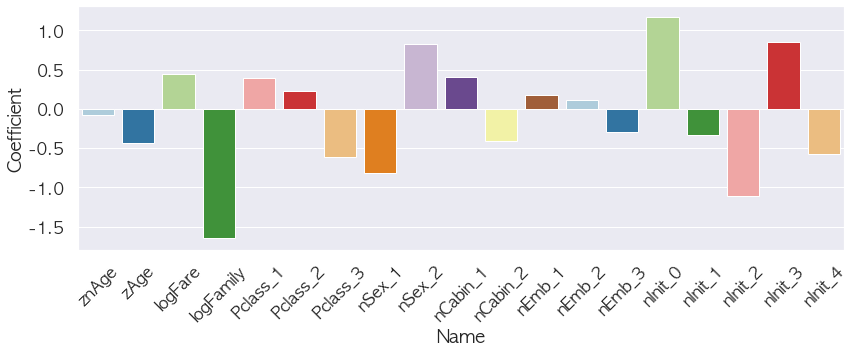

In [215]:
Results = pd.DataFrame({"Name":X_train.columns,
                        "Coefficient":model_embedded.coef_[0]})
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
g1 = sns.barplot(data=Results, x='Name', y='Coefficient', ax=ax, palette="Paired")
g1.set_xticklabels(g1.get_xticklabels(),rotation = 45)
plt.tight_layout()
plt.show()

In [216]:
y_pred_embedded=model_embedded.predict(X_test_embedded)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metric_embedded=confusion_matrix(y_test_embedded,y_pred_embedded)

accuracy_wrapper_basic=(metric_embedded[0][0]+metric_embedded[1][1])/sum(sum(metric_embedded))*100
print('Accuracy using filter : ',accuracy_score(y_test_embedded, y_pred_embedded)*100,
      '\n',
      'AUC using filter : ',roc_auc_score(y_test_embedded, y_pred_embedded)*100)

Accuracy using filter :  85.29411764705883 
 AUC using filter :  84.87179487179488


In [217]:
fs_tmp = {'Method' : 'Embedded', 
          'Type' : 'LogReg_L2', 
          'Acc' : accuracy_score(y_test_embedded, y_pred_embedded)*100,
          'AUC' : roc_auc_score(y_test_embedded, y_pred_embedded)*100}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### Lasso Regression & Classification

* Regression 문제에서는 sklearn.linear_model.Lasso을 사용한다. [[ref]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso)
* Classification Model을 위해서는 L1 regularization Logistic Regression (penalty='l1')을 사용한다.

In [218]:
X_train_embedded=X_train.copy()
y_train_embedded=y_train.copy()
X_test_embedded=X_test.copy()
y_test_embedded=y_test.copy()

In [219]:
from sklearn.linear_model import LogisticRegression
model_embedded = LogisticRegression(penalty='l1', tol=0.0001, C=1.0, fit_intercept=True, solver='saga',
              intercept_scaling=1, class_weight=None, random_state=0, max_iter=100, multi_class='auto')
model_embedded.fit(X_train_embedded, y_train_embedded)

LogisticRegression(penalty='l1', random_state=0, solver='saga')

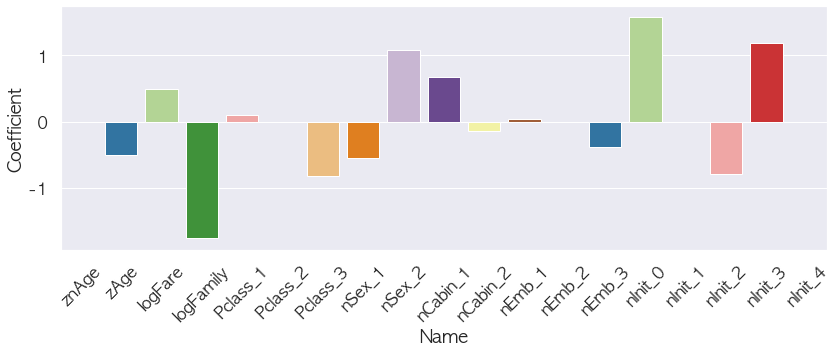

In [220]:
Results = pd.DataFrame({"Name":X_train.columns,
                        "Coefficient":model_embedded.coef_[0]})
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
g1 = sns.barplot(data=Results, x='Name', y='Coefficient', ax=ax, palette="Paired")
g1.set_xticklabels(g1.get_xticklabels(),rotation = 45)
plt.tight_layout()
plt.show()

In [221]:
y_pred_embedded=model_embedded.predict(X_test_embedded)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metric_embedded=confusion_matrix(y_test_embedded,y_pred_embedded)

accuracy_wrapper_basic=(metric_embedded[0][0]+metric_embedded[1][1])/sum(sum(metric_embedded))*100
print('Accuracy using filter : ',accuracy_score(y_test_embedded, y_pred_embedded)*100,
      '\n',
      'AUC using filter : ',roc_auc_score(y_test_embedded, y_pred_embedded)*100)

Accuracy using filter :  85.29411764705883 
 AUC using filter :  84.87179487179488


In [222]:
fs_tmp = {'Method' : 'Embedded', 
          'Type' : 'LogReg_L1', 
          'Acc' : accuracy_score(y_test_embedded, y_pred_embedded)*100,
          'AUC' : roc_auc_score(y_test_embedded, y_pred_embedded)*100}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

##### ElasticNet

* L1 Regularization 과 L2 Regularization을 비율로 나누어 둘다 적용한다. 
* Classification 문제에서는 Logistic Regression을 사용하며 penalty='elasticnet', L1_ratio를 설정한다.

In [223]:
X_train_embedded=X_train.copy()
y_train_embedded=y_train.copy()
X_test_embedded=X_test.copy()
y_test_embedded=y_test.copy()

In [224]:
from sklearn.linear_model import LogisticRegression
model_embedded = LogisticRegression(penalty='elasticnet', tol=0.0001, C=1.0, fit_intercept=True, solver='saga',
              intercept_scaling=1, class_weight=None, random_state=0, max_iter=100, multi_class='auto', l1_ratio = 0.5)
model_embedded.fit(X_train_embedded, y_train_embedded)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', random_state=0,
                   solver='saga')

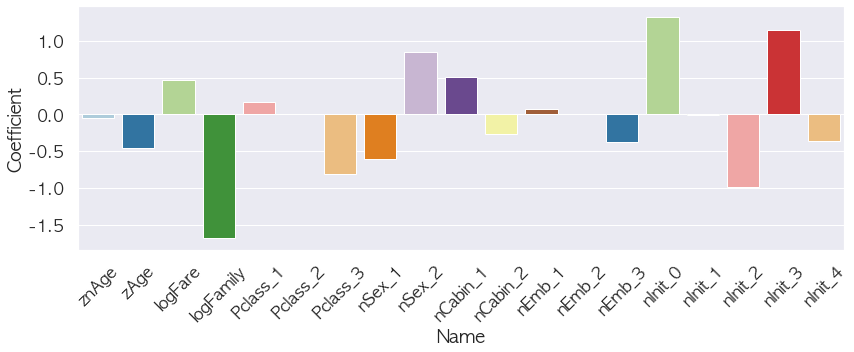

In [225]:
Results = pd.DataFrame({"Name":X_train.columns,
                        "Coefficient":model_embedded.coef_[0]})
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
g1 = sns.barplot(data=Results, x='Name', y='Coefficient', ax=ax, palette="Paired")
g1.set_xticklabels(g1.get_xticklabels(),rotation = 45)
plt.tight_layout()
plt.show()

In [226]:
y_pred_embedded=model_embedded.predict(X_test_embedded)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

metric_embedded=confusion_matrix(y_test_embedded,y_pred_embedded)

accuracy_wrapper_basic=(metric_embedded[0][0]+metric_embedded[1][1])/sum(sum(metric_embedded))*100
print('Accuracy using filter : ',accuracy_score(y_test_embedded, y_pred_embedded)*100,
      '\n',
      'AUC using filter : ',roc_auc_score(y_test_embedded, y_pred_embedded)*100)

Accuracy using filter :  85.29411764705883 
 AUC using filter :  84.87179487179488


In [227]:
fs_tmp = {'Method' : 'Embedded', 
          'Type' : 'LogReg_Elastic', 
          'Acc' : accuracy_score(y_test_embedded, y_pred_embedded)*100,
          'AUC' : roc_auc_score(y_test_embedded, y_pred_embedded)*100}
fs_df = fs_df.append(fs_tmp, ignore_index=True)

#### Feature Selection Results

In [228]:
fs_df

Method               Type        Acc        AUC
0       None               None  85.294118  84.871795
1     Filter  VarianceThreshold  84.117647  83.919414
2     Filter        Correlation  81.176471   79.78022
3     Filter    InformationGain  83.529412  83.150183
4     Filter               Chi2  84.117647  83.919414
5     Filter              ANOVA  85.294118  84.871795
6    Wrapper            Forward  85.882353  85.934066
7    Wrapper           Backward  85.294118  84.871795
8    Wrapper                RFE  85.294118  84.871795
9    Wrapper    MB_RandomForest  84.705882  84.688645
10   Wrapper            MB_CART  83.529412  83.150183
11   Wrapper          MB_LogReg  84.705882  84.395604
12  Embedded           Ridge_L2  85.882353  85.641026
13  Embedded          LogReg_L2  85.294118  84.871795
14  Embedded          LogReg_L1  85.294118  84.871795
15  Embedded     LogReg_Elastic  85.294118  84.871795

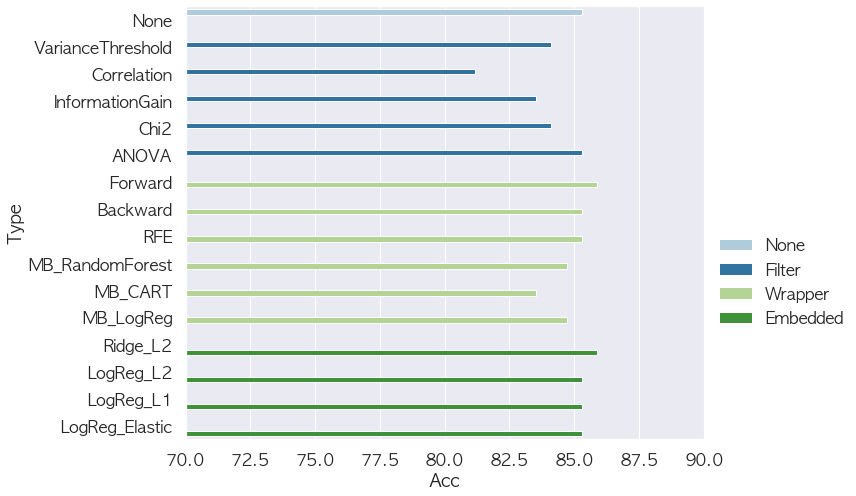

In [229]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
#g1 = sns.barplot(data=fs_df, x='Type', y='Acc', hue='Method', ax=ax, palette="Paired")
g1 = sns.barplot(data=fs_df, x='Acc', y='Type', hue='Method', ax=ax, palette="Paired")
#g1.set_yticklabels(g1.get_xticklabels(),rotation = 90)
g1.legend(bbox_to_anchor=(1.0, 0.5))
g1.set(xlim=(70, 90))
plt.tight_layout()
plt.show()

* Wrapper 기법 중 가장 우수한 성능을 보인 기법을 선택하여 feature를 선택한다.

In [230]:
X_train_raw = deepcopy(df_train_fnl)
X_train_raw.drop(columns='Survived', inplace = True)
y_train_raw = deepcopy(df_train_fnl.Survived)
X_test_raw = deepcopy(df_test_fnl)
y_test_raw = deepcopy(df_label_raw.Survived)

print(X_train_raw.shape, y_train_raw.shape, X_test_raw.shape, y_test_raw.shape)

(846, 19) (846,) (418, 19) (418,)


In [231]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
selector = SFS(LogisticRegression(), n_features_to_select=0.8, direction='forward', 
              scoring='roc_auc', cv=3)
selector.fit(X_train_raw, y_train_raw)


SequentialFeatureSelector(cv=3, estimator=LogisticRegression(),
                          n_features_to_select=0.8, scoring='roc_auc')

In [232]:
is_support = selector.support_
Results = pd.DataFrame({"Name":X_train_raw.columns,
              "Results": is_support})
Results

Name  Results
0       znAge    False
1        zAge     True
2     logFare     True
3   logFamily     True
4    Pclass_1     True
5    Pclass_2     True
6    Pclass_3     True
7      nSex_1     True
8      nSex_2     True
9    nCabin_1     True
10   nCabin_2     True
11     nEmb_1    False
12     nEmb_2    False
13     nEmb_3     True
14    nInit_0     True
15    nInit_1    False
16    nInit_2     True
17    nInit_3     True
18    nInit_4     True

In [233]:
X_train=np.array(X_train_raw[X_train_raw.columns[is_support].values])
X_test=np.array(X_test_raw[X_test_raw.columns[is_support].values])
y_train = np.array(y_train_raw)
y_test = np.array(y_test_raw)

In [270]:
# X_train = np.array(X_train_raw)
# X_test = np.array(X_test_raw)
# y_train = np.array(y_train_raw)
# y_test = np.array(y_test_raw)

## Modeling

* 상기 Feature Selection 방법 중 적절한 방법을 선택하여 데이터를 준비하고, ML 모델 개발을 시작한다.

---

* **ML 구분**

    <br>

    * **Supervised Learning** : 사람에 의해 정답이 부여된 데이터를 활용해 학습시키는 방법. 입력 값(X)이 주어지면 입력값에 대한 Label 또는 Target(Y)을 주어 학습시킨다.
    
        * **Regression (회귀)**
            * 주어진 데이터로 연속된 값(데이터와 Target 간의 관계)을 예측하는 알고리즘을 학습시킨다. e.g., 주택 가격, 시험 점수 예측 [[ref]](https://www.analyticsvidhya.com/blog/2021/05/5-regression-algorithms-you-should-know-introductory-guide/)
            * 성능 평가 지표: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R^2, ... [[ref]](https://iphoong.tistory.com/9?category=1009852)            
            * Linear & Polynomial & Ridge & Lasso & Elasticnet Regression, Support Vector Regression, Decision Tree Regression, RandomForest Regression, ...
            
            <br>
            
        * **Classification (분류)**
            * 주어진 데이터를 정해진 범주(Label, Target)에 따라 분류하는 알고리즘을 학습시킨다. 이진 분류와 다중 분류 등이 있다. e.g., 생존 여부, 스팸 메일 여부 분류
            * 성능 평가 지표: Accuracy, Precision & Recall, F1 Score, ROC curve, AUC, ... [[ref]](https://iphoong.tistory.com/7?category=1009852)
            * Logistic Regression (L1 penalty, L2 penalty, Elasticnet), Ridge Classifier, Support Vector Machine, Decision Tree Classifier, RandomForest Classifier, K-nearest Neighbor, Naive Bayes, ... 
            
            <br>
            
        * Deep Learning Model(Dense, CNN, RNN 등)은 활성함수의 형태에 따라 Regression, Classification이 둘다 가능하다.
        
        <br>

    * **Unsupervised Learning** : 정답이 없는 데이터를 비슷한 특징끼리 군집화하여 패턴이나 형태를 찾고 예측하는 방법. [[ref]](http://blog.skby.net/%EB%B9%84%EC%A7%80%EB%8F%84-%ED%95%99%EC%8A%B5-unsupervised-learning/)
        * **Clustering (군집화)**
        * **Dimensionality Reduction (차원 축소)**

        <br>
    
    * **Reinforcement Learning** : 정답이 없는 데이터를 대상으로 현재의 상태(State)에서 어떤 행동(Action)을 취하는 것이 최적인지를 학습하는 기법. 행동을 취할 때마다 외부 환경에서 보상(Reward)이 주어지는데, 이 보상을 최대화 하는 방향으로 학습이 진행된다. 
    
        <br>
        
---
        
* 타이타닉 데이터셋은 생존 여부를 구분하기 위한 Supervised, Classification 문제이므로, Classification Model을 선정해야한다.
* Logistic Regression, Support Vector Machine, 등 몇 가지 모델을 선정하여 데이터를 Training & Validation해보고 가장 우수한 모델을 찾는다. 모델을 찾으면 Hyper Parameter Tunning을 수행한다.
* Model 개발시 Train Set에 대한 과적합을 막기 위해서 Validation을 수행해야 한다. Validation Set은 Train Set에서 일정한 방법을 사용하여 분할한다. 일정 비율로 자를 수 있지만, Cross-Validation을 하는 것이 가장 적절하다. Cross-validation 기법으로 K-fold, Leave-one-out 등의 방법이 있다. 여기서는 Stratified K Fold 기법을 사용한다.
* Model Selection, Train & Validation, HyperParameter Tunning이 모두 완료되면, 최종 모델로 Test Set을 분류한다. 

### Load Library

In [271]:
## Performance Metric
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

## Data Preprocessing
from sklearn import preprocessing

## Model Selection Method
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, LeaveOneOut
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, permutation_test_score, validation_curve

## Model

# Ensemble and Tree
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier

# Linear Model (logReg, Ridge, etc..)
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier

# SVC
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble
from sklearn.svm import SVC

# K - Neighbors
# https://scikit-learn.org/stable/modules/classes.html?highlight=naive#module-sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# NaiveBayes
# https://scikit-learn.org/stable/modules/classes.html?highlight=naive#module-sklearn.naive_bayes
from sklearn.naive_bayes import GaussianNB

### Model Selection

In [272]:
RFC = RandomForestClassifier()
GBC = GradientBoostingClassifier()
ETC = ExtraTreeClassifier()
LogReg_l2 = LogisticRegression(penalty='l2')
LogReg_l1 = LogisticRegression(penalty='l1', solver='saga')
LogReg_EL = LogisticRegression(penalty='elasticnet', l1_ratio = 0.5, solver='saga',)
SGDC = SGDClassifier()
Ridge = RidgeClassifier()
rbfSVC = SVC(kernel='rbf')
linearSVC = SVC(kernel='linear')
KNC = KNeighborsClassifier()
NB = GaussianNB()

Model_list = [RFC, GBC, ETC, LogReg_l2, LogReg_l1, LogReg_EL, SGDC, Ridge, rbfSVC, linearSVC, KNC, NB]

In [273]:
def simple_fit_and_evaluate(model, X_train, y_train):
    
    cv = StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)
    
    cv_results = cross_validate(model, X_train, y_train, cv=cv) 
    cv_acc = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv=cv)
    cv_auc = cross_val_score(model, X_train, y_train, scoring = 'roc_auc', cv=cv)
    y_pred = cross_val_predict(model, X_train, y_train, cv=cv)
    
    train_acc = accuracy_score(y_train, y_pred)
    train_auc = roc_auc_score(y_train, y_pred)
    
    return cv_results, cv_acc, cv_auc, train_acc, train_auc

In [274]:
ms_df = pd.DataFrame(columns=[
                     'Model', 'train_Acc', 'train_Auc', 
    'acc_mean', 'acc_std', 'auc_mean', 'auc_std'])

i = 0
for model in Model_list:
    i += 1

    this_cv_results, cv_acc, cv_auc, train_acc, train_auc  = simple_fit_and_evaluate(model, 
                                                                                     X_train, 
                                                                                     y_train)

    ms_tmp = {'Model': str(model),
              'train_Acc': train_acc*100,
              'train_Auc': train_auc*100,
              'acc_mean': np.mean(cv_acc),
              'acc_std': np.std(cv_acc),
              'auc_mean': np.mean(cv_auc),
              'auc_std': np.std(cv_auc)}
    ms_df = ms_df.append(ms_tmp, ignore_index=True)
    

In [275]:
ms_df

Model  train_Acc  train_Auc  \
0                            RandomForestClassifier()  81.323877  80.007450   
1                        GradientBoostingClassifier()  82.860520  80.959983   
2                               ExtraTreeClassifier()  77.541371  76.239889   
3                                LogisticRegression()  82.860520  81.369732   
4     LogisticRegression(penalty='l1', solver='saga')  83.096927  81.561303   
5   LogisticRegression(l1_ratio=0.5, penalty='elas...  82.978723  81.465517   
6                                     SGDClassifier()  76.122931  75.909962   
7                                   RidgeClassifier()  82.151300  80.677948   
8                                               SVC()  82.151300  80.268199   
9                                SVC(kernel='linear')  80.260047  79.028310   
10                             KNeighborsClassifier()  81.205674  79.092167   
11                                       GaussianNB()  76.950355  78.277991   

    acc_mean   acc_std  auc_mean   auc_std  
0   0.819118  0.029613  0.866144  0.026076  
1   0.828515  0.032680  0.876999  0.023687  
2   0.765994  0.036306  0.766762  0.059152  
3   0.828627  0.028344  0.869596  0.027685  
4   0.830980  0.026817  0.870421  0.027744  
5   0.829804  0.027358  0.870543  0.027940  
6   0.782493  0.044638  0.840125  0.043932  
7   0.821541  0.036933  0.866297  0.030544  
8   0.821541  0.035028  0.858952  0.030013  
9   0.802647  0.035120  0.846242  0.042216  
10  0.812017  0.027401  0.857595  0.020020  
11  0.769678  0.048800  0.848966  0.042135

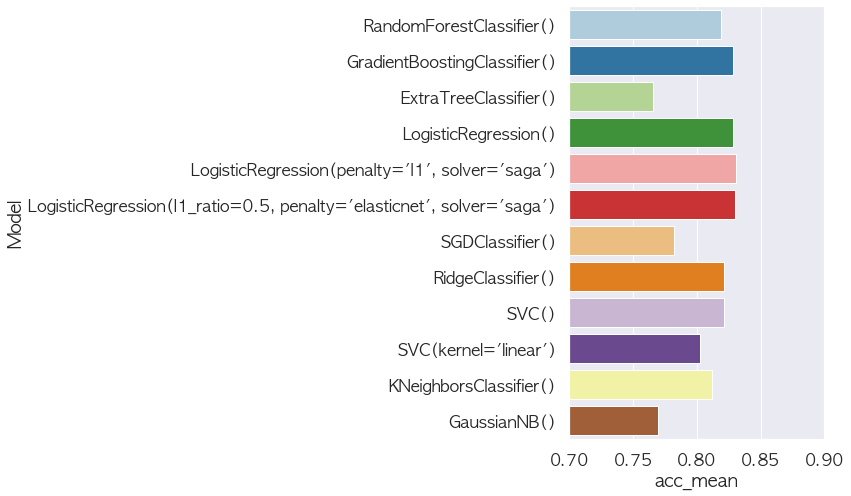

In [276]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
g1 = sns.barplot(data=ms_df, x='acc_mean', y='Model', ci='acc_std',
                 ax=ax, palette="Paired")
#g1.set_yticklabels(g1.get_xticklabels(),rotation = 90)
g1.set(xlim=(0.70, 0.90))
plt.tight_layout()
plt.show()

In [277]:
ms_df.sort_values('acc_mean', ascending=False).head(3)

Model  train_Acc  train_Auc  \
4    LogisticRegression(penalty='l1', solver='saga')  83.096927  81.561303   
5  LogisticRegression(l1_ratio=0.5, penalty='elas...  82.978723  81.465517   
3                               LogisticRegression()  82.860520  81.369732   

   acc_mean   acc_std  auc_mean   auc_std  
4  0.830980  0.026817  0.870421  0.027744  
5  0.829804  0.027358  0.870543  0.027940  
3  0.828627  0.028344  0.869596  0.027685

* L2 penalty Logistic Regression Model이 가장 우수하였다.

### Model Development

#### Hyper Parameter Tunning

* 선정한 Logistic Regression Model의 Hyper parameter는 Penalty 종류(l2, l1, elasticnet)와 C (Inverse of regularization strength, 값이 작을수록 Regularization 강도가 강하다) 이다.
* Penalty 는 Model Selection 단계에서 L2 penalty 가 가장 우수하였으므로 L2로 선정한다.
* C 는 grid search를 통해 가장 우수한 값을 선정한다.

In [241]:
# Hyper Parameter 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l2']}

# grid search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=10,
                           return_train_score=True)        

# finding best parameter
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']},
             return_train_score=True)

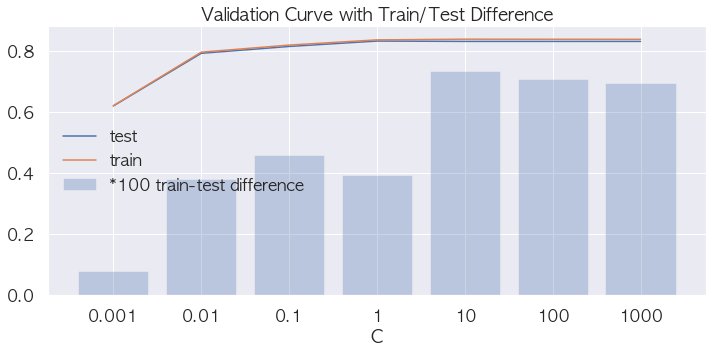

In [242]:
test_scores = grid_search.cv_results_['mean_test_score']
train_scores = grid_search.cv_results_['mean_train_score'] 

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.bar(height=abs(train_scores-test_scores)*100, x=[0,1,2,3,4,5,6], 
        label='*100 train-test difference', alpha=0.3)
plt.xticks([0,1,2,3,4,5,6], labels=['0.001', '0.01', '0.1', '1', '10', '100', '1000'])
plt.xlabel('C')
plt.title('Validation Curve with Train/Test Difference')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [243]:
print('Best Parameter :' , grid_search.best_params_)
print('Best Score :' , grid_search.best_score_)

Best Parameter : {'C': 1, 'penalty': 'l2'}
Best Score : 0.8321568627450981


In [244]:
bestParam = list(grid_search.best_params_.items())
bestParam = pd.DataFrame(bestParam)
bestParam

0   1
0        C   1
1  penalty  l2

* 정확도가 가장 높으면서 Train/Test 차이가 적은 C = 1이 best parameter이다

#### Model Training & Validation

##### Model Configuration

In [245]:
Classif = LogisticRegression(penalty=bestParam[1][1], tol=0.0001, C=bestParam[1][0], fit_intercept=True, 
                  intercept_scaling=1, class_weight=None, random_state=0, 
                   max_iter=100, multi_class='auto')

##### Check Learning Curve

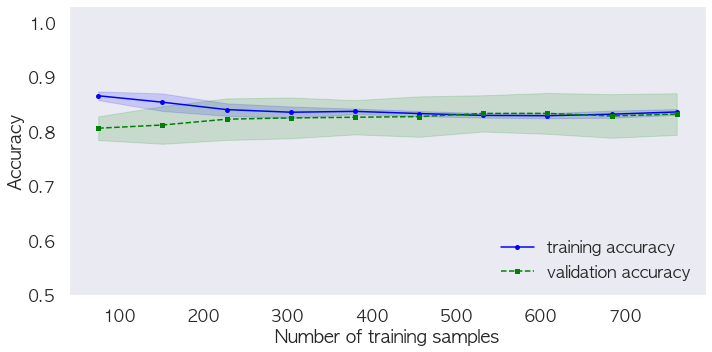

In [246]:
train_sizes, train_scores, test_scores = learning_curve(estimator = Classif,
                                                        X = X_train,
                                                        y = y_train,
                                                        # linspace로 일정간격 훈련세트의 비율선택
                                                        train_sizes = np.linspace(
                                                        0.1, 1.0, 10),
                                                        cv = 10,
                                                        n_jobs = 1)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(train_sizes, train_mean,
         color = 'blue', marker = 'o',
         markersize = 5, label = 'training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha = 0.15, color = 'blue')

plt.plot(train_sizes, test_mean,
         color = 'green', linestyle = '--',
         marker = 's', markersize = 5,
         label = 'validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha = 0.15, color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.5, 1.03])
plt.tight_layout()
plt.show()

##### Model Training & Validation

###### Cross-Validation

In [247]:
Classif = LogisticRegression(penalty=bestParam[1][1], tol=0.0001, C=bestParam[1][0], fit_intercept=True, 
                  intercept_scaling=1, class_weight=None, random_state=0, 
                   max_iter=100, multi_class='auto')

In [248]:
cv = StratifiedKFold(n_splits=10, random_state=5, shuffle=True) 

cv_results = cross_validate(Classif, X_train, y_train, cv=cv) 
cv_acc = cross_val_score(Classif, X_train, y_train, scoring = 'accuracy', cv=cv)
cv_auc = cross_val_score(Classif, X_train, y_train, scoring = 'roc_auc', cv=cv)

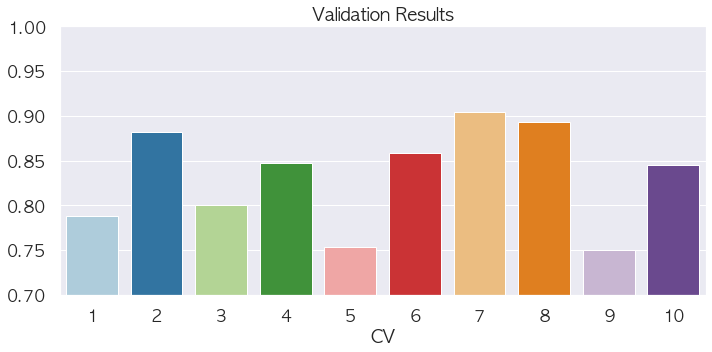

In [249]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
g1 = sns.barplot(x=list(range(1,11)), y=cv_results['test_score'], ax = ax, palette="Paired")
g1.set_xlabel('CV')
g1.set_title('Validation Results')
g1.set(ylim=(0.70, 1.00))
plt.tight_layout()
plt.show()


###### Permutation Test

In [250]:
score_act, perm_scores_act, pvalue_act = permutation_test_score(
    Classif, X_train, y_train, scoring="accuracy", cv=cv, n_permutations=100)

###### Results

In [251]:
Classif = LogisticRegression(penalty=bestParam[1][1], tol=0.0001, C=bestParam[1][0], fit_intercept=True, 
                  intercept_scaling=1, class_weight=None, random_state=0, 
                   max_iter=100, multi_class='auto')

In [252]:
Classif.fit(X_train, y_train)
y_pred = cross_val_predict(Classif, X_train, y_train, cv=cv)
train_acc = accuracy_score(y_train, y_pred)
train_auc = roc_auc_score(y_train, y_pred)

In [253]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       522
           1       0.80      0.75      0.77       324

    accuracy                           0.83       846
   macro avg       0.82      0.82      0.82       846
weighted avg       0.83      0.83      0.83       846



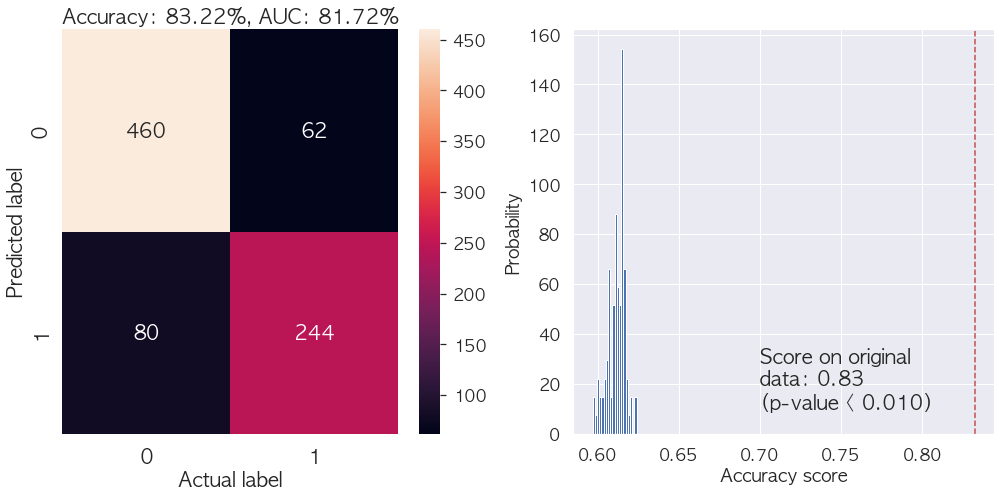

In [254]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 7))
sns.heatmap(confusion_matrix(y_train, y_pred),
      annot=True,  annot_kws={"size": 20}, fmt='2.0f', cbar = True, ax = axes[0])
axes[0].set_title('Accuracy: %.2f%%, AUC: %.2f%%' % (train_acc*100, train_auc*100), fontsize=20) 
axes[0].set_ylabel('Predicted label', fontsize=20);
axes[0].set_xlabel('Actual label', fontsize=20);
axes[0].tick_params(labelsize=20) 
# axes[0].set_xticklabels(['0','part 2'])
# axes[0].set_yticklabels(['p1','p1'])

axes[1].hist(perm_scores_act, bins=20, density=True)
axes[1].axvline(score_act, ls="--", color="r")
score_label = f"Score on original\ndata: {score_act:.2f}\n(p-value < {pvalue_act:.3f})"
axes[1].text(0.7, 10, score_label, fontsize=20)
axes[1].set_xlabel("Accuracy score")
_ = axes[1].set_ylabel("Probability")
plt.tight_layout()

### Model Test

In [265]:
y_predicted = Classif.predict(X_test)

testing_acc = accuracy_score(y_test, y_predicted)*100.0
testing_auc = roc_auc_score(y_test, y_predicted)*100.0

In [266]:
score_act, perm_scores_act, pvalue_act = permutation_test_score(
    Classif, X_test, y_test, scoring="accuracy", cv=cv, n_permutations=100)

In [267]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       260
           1       0.69      0.72      0.70       158

    accuracy                           0.77       418
   macro avg       0.76      0.76      0.76       418
weighted avg       0.77      0.77      0.77       418



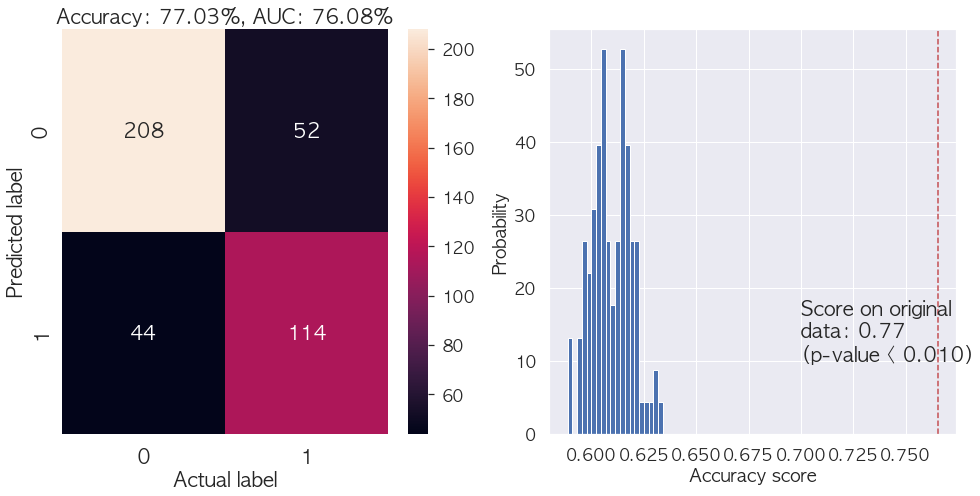

In [268]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 7))
sns.heatmap(confusion_matrix(y_test, y_predicted),
      annot=True,  annot_kws={"size": 20}, fmt='2.0f', cbar = True, ax = axes[0])
axes[0].set_title('Accuracy: %.2f%%, AUC: %.2f%%' % (testing_acc, testing_auc), fontsize=20) 
axes[0].set_ylabel('Predicted label', fontsize=20);
axes[0].set_xlabel('Actual label', fontsize=20);
axes[0].tick_params(labelsize=20) 
# axes[0].set_xticklabels(['0','part 2'])
# axes[0].set_yticklabels(['p1','p1'])

axes[1].hist(perm_scores_act, bins=20, density=True)
axes[1].axvline(score_act, ls="--", color="r")
score_label = f"Score on original\ndata: {score_act:.2f}\n(p-value < {pvalue_act:.3f})"
axes[1].text(0.7, 10, score_label, fontsize=20)
axes[1].set_xlabel("Accuracy score")
_ = axes[1].set_ylabel("Probability")
plt.tight_layout()

### Model Test & Selection

In [278]:
RFC = RandomForestClassifier()
GBC = GradientBoostingClassifier()
ETC = ExtraTreeClassifier()
LogReg_l2 = LogisticRegression(penalty='l2')
LogReg_l1 = LogisticRegression(penalty='l1', solver='saga')
LogReg_EL = LogisticRegression(penalty='elasticnet', l1_ratio = 0.5, solver='saga',)
SGDC = SGDClassifier()
Ridge = RidgeClassifier()
rbfSVC = SVC(kernel='rbf')
linearSVC = SVC(kernel='linear')
KNC = KNeighborsClassifier()
NB = GaussianNB()

Model_list = [RFC, GBC, ETC, LogReg_l2, LogReg_l1, LogReg_EL, SGDC, Ridge, rbfSVC, linearSVC, KNC, NB]

In [279]:
def simple_fit_and_testing(model, X_train, y_train):
    
    cv = StratifiedKFold(n_splits = 10, random_state = 0, shuffle=True)
    
    model.fit(X_train, y_train)
    y_pred = cross_val_predict(model, X_train, y_train, cv=cv)
    train_acc = accuracy_score(y_train, y_pred)
    train_auc = roc_auc_score(y_train, y_pred)
    
    y_predicted = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_predicted)
    test_auc = roc_auc_score(y_test, y_predicted)

    return train_acc, train_auc, test_acc, test_auc

In [280]:
results_df = pd.DataFrame(columns=[
                     'Model', 'train_Acc', 'train_Auc', 'test_Acc', 'test_Auc'])

i = 0
for model in Model_list:
    i += 1

    train_acc, train_auc, test_acc, test_auc  = simple_fit_and_testing(model, 
                                                                                     X_train, 
                                                                                     y_train)

    results_tmp = {'Model': str(model),
              'train_Acc': train_acc*100,
              'train_Auc': train_auc*100,
              'test_Acc': test_acc*100,
              'test_Auc': test_auc*100}
    results_df = results_df.append(results_tmp, ignore_index=True)
    

In [281]:
results_df

Model  train_Acc  train_Auc  \
0                            RandomForestClassifier()  81.323877  79.714772   
1                        GradientBoostingClassifier()  82.860520  80.959983   
2                               ExtraTreeClassifier()  78.368794  77.085994   
3                                LogisticRegression()  82.860520  81.369732   
4     LogisticRegression(penalty='l1', solver='saga')  83.096927  81.561303   
5   LogisticRegression(l1_ratio=0.5, penalty='elas...  82.978723  81.465517   
6                                     SGDClassifier()  78.368794  77.554278   
7                                   RidgeClassifier()  82.151300  80.677948   
8                                               SVC()  82.151300  80.268199   
9                                SVC(kernel='linear')  80.260047  79.028310   
10                             KNeighborsClassifier()  81.205674  79.092167   
11                                       GaussianNB()  76.950355  78.277991   

     test_Acc   test_Auc  
0   72.966507  71.565239  
1   75.598086  73.432327  
2   70.813397  69.834469  
3   77.511962  76.708861  
4   76.555024  75.567186  
5   77.272727  76.392405  
6   39.952153  51.482473  
7   77.272727  76.392405  
8   78.947368  77.614411  
9   75.358852  74.729796  
10  74.880383  73.476144  
11  70.813397  72.193281

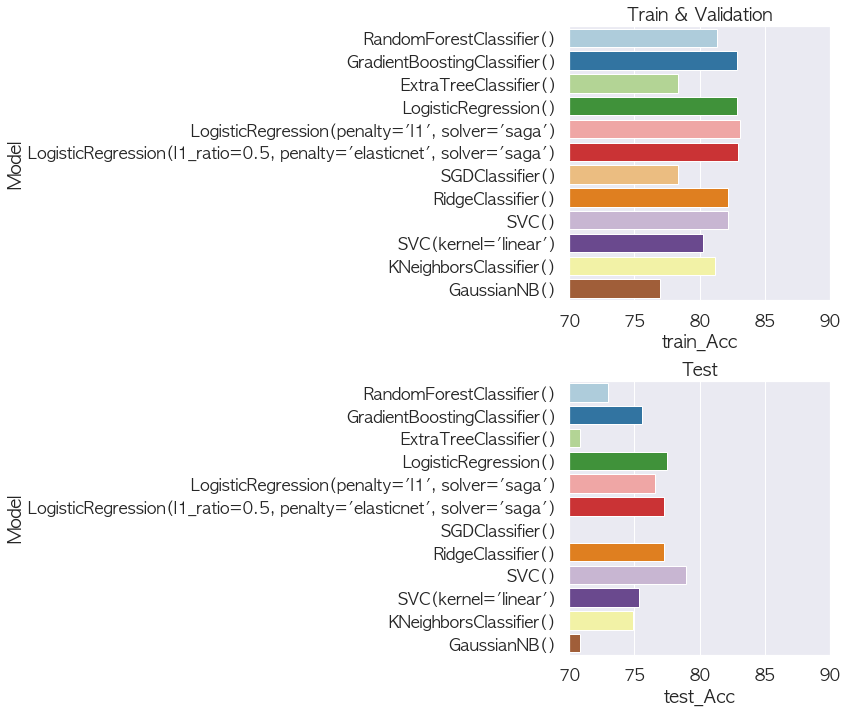

In [282]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
g1 = sns.barplot(data=results_df, x='train_Acc', y='Model',
                 ax=ax[0], palette="Paired")
#g1.set_yticklabels(g1.get_xticklabels(),rotation = 90)
g1.set(xlim=(70, 90))
g1.set_title('Train & Validation')

g2 = sns.barplot(data=results_df, x='test_Acc', y='Model',
                 ax=ax[1], palette="Paired")
g2.set_title('Test')
g2.set(xlim=(70, 90))
plt.tight_layout()
plt.show()



In [283]:
results_df.sort_values('train_Acc', ascending=False).head(3)

Model  train_Acc  train_Auc  \
4    LogisticRegression(penalty='l1', solver='saga')  83.096927  81.561303   
5  LogisticRegression(l1_ratio=0.5, penalty='elas...  82.978723  81.465517   
1                       GradientBoostingClassifier()  82.860520  80.959983   

    test_Acc   test_Auc  
4  76.555024  75.567186  
5  77.272727  76.392405  
1  75.598086  73.432327

In [284]:
results_df.sort_values('test_Acc', ascending=False).head(3)

Model  train_Acc  train_Auc  \
8                                              SVC()  82.151300  80.268199   
3                               LogisticRegression()  82.860520  81.369732   
5  LogisticRegression(l1_ratio=0.5, penalty='elas...  82.978723  81.465517   

    test_Acc   test_Auc  
8  78.947368  77.614411  
3  77.511962  76.708861  
5  77.272727  76.392405